In [310]:
import pandas as pd
import numpy as np

In [311]:
import plotly.express as px
import plotly.graph_objects as go


In [312]:
from plotly.subplots import make_subplots

In [313]:
# Time Series libraries:
from matplotlib import pyplot as plt # required for decomposition
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns
import numpy as np
import pymannkendall as mk
from statsmodels.stats.diagnostic import het_white
# SSL to overcome problem with ssl whn applying pd.read_csv()
import matplotlib.pyplot as plt
from datetime import timedelta
import datetime
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams


rcParams['figure.figsize'] = 15, 12

plt.style.use('seaborn-v0_8')
import matplotlib.dates as mdates
# Stationarity Function and Methods
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib
from matplotlib import rcParams

# Evaluation and Error functions
# Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error , mean_absolute_percentage_error
from math import sqrt
#figures
rcParams['figure.figsize'] = 15, 8
plt.style.use('seaborn-v0_8')
#warnings
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)

# Date function and holidays
from datetime import date
import holidays
#skimpy fro descriptive analysis and using transformars
import skimpy as sk
import seaborn as sns

In [314]:
from sklearn.preprocessing import LabelEncoder

In [315]:
# Import Data
commercial_act = pd.read_csv('commercial_activity_df.csv', index_col=0)
products= pd.read_csv('products_df.csv', index_col=0)
sociodemographic = pd.read_csv('sociodemographic_df.csv', index_col=0)

In [316]:
# Import Data Dictionary
data_dictionary=pd.read_csv('Data_Dictionary.csv', index_col=0)

In [317]:
# Description with full-width column
pd.set_option('display.max_colwidth', None)
display(data_dictionary['Description'])

Name
active_customer            Client activity indicator in our application\r
entry_channel                              Customer acquisition channel\r
entry_date            Date on which first easyMoney contract was signed\r
segment                                         Customer business segment
age                                                          Customer age
country_id                             Country of residence of the client
deceased                                              Deceased index. N/S
gender                                                             Gender
region_code                     Customer's province of residence (for ES)
salary                                             Household gross income
credit_card                                                  Credit cards
debit_card                                                   Debit card\r
em_account_p                                           easyMoney+ account
em_account_pp                    

In [318]:
display(data_dictionary)

,Table,Description
Name,,
active_customer,commercial_activity,Client activity indicator in our application\r
entry_channel,commercial_activity,Customer acquisition channel\r
entry_date,commercial_activity,Date on which first easyMoney contract was signed\r
segment,commercial_activity,Customer business segment
age,sociodemographic,Customer age
country_id,sociodemographic,Country of residence of the client
deceased,sociodemographic,Deceased index. N/S
gender,sociodemographic,Gender
region_code,sociodemographic,Customer's province of residence (for ES)


The product keys are cid (customer identifier and pk_partition which is data ingestion date). We can merge all the three tables in one. But before merging, it is worthwhile to go through each table to check for any data quality issues like missing values, duplicates.

In [319]:
commercial_act.head(50)

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES
1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
3,1050613,2018-01-28,2015-08-10,KHD,0.0,03 - UNIVERSITARIO
4,1050614,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO
5,1050615,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
6,1050616,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
7,1050617,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO
8,1050619,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
9,1050620,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO


In [320]:
commercial_act.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   pk_cid           int64  
 1   pk_partition     object 
 2   entry_date       object 
 3   entry_channel    object 
 4   active_customer  float64
 5   segment          object 
dtypes: float64(1), int64(1), object(4)
memory usage: 318.5+ MB


partition and entry date should transform to datetime type. Active customer should be boolean.

In [321]:
# Count the number of unique customer IDs
num_unique_customer_ids = commercial_act['pk_cid'].nunique()
num_unique_customer_ids

456373

we have id for all customers, 5962924 but we have duplicated entries. Let's look at the duplicates on customer id

In [322]:

duplicates = commercial_act[commercial_act.duplicated(subset=['pk_cid', 'pk_partition'], keep=False)]

display(duplicates)

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment


No duplicates on pk_cid and pk_partition

In [323]:
commercial_act['pk_partition'].unique()

array(['2018-01-28', '2018-02-28', '2018-03-28', '2018-04-28',
       '2018-05-28', '2018-06-28', '2018-07-28', '2018-08-28',
       '2018-09-28', '2018-10-28', '2018-11-28', '2018-12-28',
       '2019-01-28', '2019-02-28', '2019-03-28', '2019-04-28',
       '2019-05-28'], dtype=object)

The partitions are on monthly basis from 28th of january of 2018 to 28th of may 2019

In [324]:
commercial_act['entry_channel'].unique()

array(['KHL', 'KHE', 'KHD', 'KFA', 'KFC', 'KAT', 'KAZ', 'RED', 'KHC',
       'KHK', 'KGN', 'KHM', 'KHO', 'KDH', 'KEH', 'KAD', 'KBG', nan, 'KGC',
       'KHF', 'KFK', 'KHN', 'KAB', 'KAG', 'KAA', 'KGX', 'KAR', 'KAK',
       'KBZ', '007', 'KBO', 'KCB', '013', 'KAY', 'KBE', 'KAS', 'KCL',
       '004', 'KAF', 'KCC', 'KEY', 'KDT', 'KAQ', 'KAH', 'KAM', 'KAJ',
       'KFD', 'KCH', 'KFS', 'KAW', 'KAE', 'KBH', 'KDR', 'KHQ', 'KBW',
       'KBY', 'KCI', 'KEJ', 'KFF', 'KBU', 'KAI', 'KCK', 'KDA', 'KES',
       'KHP', 'KFL', 'KDS', 'KFP', 'KHS'], dtype=object)

In [325]:
commercial_act_entry_channels= pd.DataFrame(commercial_act['entry_channel'].unique())
commercial_act_entry_channels.count()

0    68
dtype: int64

In [326]:
commercial_act['segment'].unique()

array(['02 - PARTICULARES', '03 - UNIVERSITARIO', '01 - TOP', nan],
      dtype=object)

we have nan in segment.

In [327]:
# Check for NaN values in the entire DataFrame
nan_values = commercial_act.isna().sum()

# Print the columns with NaN values and their respective counts
print(nan_values[nan_values > 0])

entry_channel    133033
segment          133944
dtype: int64


we have 133944 nan values in segment and entry_channel 133033 entry values in cahnnels column

In [328]:
products.head(50)

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
4,1050614,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
5,1050615,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
6,1050616,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
7,1050617,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
8,1050619,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
9,1050620,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1


In [329]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   short_term_deposit  int64  
 3   loans               int64  
 4   mortgage            int64  
 5   funds               int64  
 6   securities          int64  
 7   long_term_deposit   int64  
 8   em_account_pp       int64  
 9   credit_card         int64  
 10  payroll             float64
 11  pension_plan        float64
 12  payroll_account     int64  
 13  emc_account         int64  
 14  debit_card          int64  
 15  em_account_p        int64  
 16  em_acount           int64  
dtypes: float64(2), int64(14), object(1)
memory usage: 818.9+ MB


In [330]:
products.describe()

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
count,5.962924e+06,5.962924e+06,5.962924e+06,5.962924e+06,5.962924e+06,5.962924e+06,5.962924e+06,5962924.0,5.962924e+06,5.962863e+06,5.962863e+06,5.962924e+06,5.962924e+06,5.962924e+06,5.962924e+06,5.962924e+06
mean,1.234930e+06,2.581619e-03,7.848498e-05,5.433576e-05,3.370662e-03,3.711770e-03,1.688098e-02,0.0,1.188444e-02,3.451144e-02,3.652641e-02,5.524471e-02,5.483233e-02,9.441140e-02,5.701901e-06,7.348076e-01
std,1.623020e+05,5.074401e-02,8.858828e-03,7.371080e-03,5.795948e-02,6.081113e-02,1.288255e-01,0.0,1.083660e-01,1.825388e-01,1.875960e-01,2.284573e-01,2.276527e-01,2.924002e-01,2.387859e-03,4.414356e-01
min,1.589100e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.112532e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.231097e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.352339e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.553689e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


all of the data except id should be in boolean

em_account_pp which is easy money ++account has 0 for all entries so we should get rid of this column as it has no data in it.However, the whole thing that the product has no subscribers should be useful. So for now let's keep it.

In [331]:
products['em_account_pp'].sum()

0

In [332]:
# products.drop(columns=['em_account_pp'], inplace=True)

In [333]:
products.columns

Index(['pk_cid', 'pk_partition', 'short_term_deposit', 'loans', 'mortgage',
       'funds', 'securities', 'long_term_deposit', 'em_account_pp',
       'credit_card', 'payroll', 'pension_plan', 'payroll_account',
       'emc_account', 'debit_card', 'em_account_p', 'em_acount'],
      dtype='object')

In [334]:
# Sort the DataFrame by 'pk_cid' for easier comparison
duplicates = products[products.duplicated(subset=['pk_cid', 'pk_partition'], keep=False)]

display(duplicates)

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount


No duplicates on pk_cid and pk_partition

In [335]:
products[products['payroll'] >0 ]

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
72,1050659,2018-01-28,0,0,0,0,0,0,0,1,1.0,1.0,1,1,1,0,0
121,1050565,2018-01-28,0,0,0,0,0,0,0,0,1.0,1.0,1,0,1,0,0
141,1050537,2018-01-28,0,0,0,0,0,0,0,0,1.0,1.0,1,0,0,0,0
187,1050869,2018-01-28,0,0,0,0,0,0,0,0,1.0,1.0,1,1,1,0,0
223,1050920,2018-01-28,0,0,0,0,0,0,0,0,1.0,1.0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647071,1167089,2019-05-28,0,0,0,0,0,0,0,0,1.0,1.0,1,0,1,0,0
13647072,1167088,2019-05-28,0,0,0,0,0,0,0,1,1.0,1.0,1,0,1,0,0
13647104,1166671,2019-05-28,0,0,0,0,0,0,0,0,1.0,1.0,1,0,1,0,0
13647138,1166666,2019-05-28,0,0,0,0,0,0,0,0,1.0,1.0,1,0,1,0,0


In [336]:
# Check for NaN values in the entire DataFrame
nan_values = products.isna().sum()

# Print the columns with NaN values and their respective counts
print(nan_values[nan_values > 0])

payroll         61
pension_plan    61
dtype: int64


we have 61 nan values for pension_plan and payroll

In [337]:
product_nan_rows = products[products['payroll'].isna() &products['pension_plan'].isna() ]
display(product_nan_rows)
product_nan_rows.info()
product_nan_rows.describe()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
20792,1023793,2018-01-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
46071,1097831,2018-01-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
51949,1132935,2018-01-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
56489,1118340,2018-01-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
176458,1266281,2018-01-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2780473,1164621,2018-05-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
2799237,1263889,2018-05-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
2800342,1261206,2018-05-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0
2805213,1251445,2018-05-28,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 20792 to 2820081
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pk_cid              61 non-null     int64  
 1   pk_partition        61 non-null     object 
 2   short_term_deposit  61 non-null     int64  
 3   loans               61 non-null     int64  
 4   mortgage            61 non-null     int64  
 5   funds               61 non-null     int64  
 6   securities          61 non-null     int64  
 7   long_term_deposit   61 non-null     int64  
 8   em_account_pp       61 non-null     int64  
 9   credit_card         61 non-null     int64  
 10  payroll             0 non-null      float64
 11  pension_plan        0 non-null      float64
 12  payroll_account     61 non-null     int64  
 13  emc_account         61 non-null     int64  
 14  debit_card          61 non-null     int64  
 15  em_account_p        61 non-null     int64  
 16  em_aco

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
count,6.100000e+01,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,0.0,0.0,61.0,61.0,61.000000,61.0,61.000000
mean,1.243327e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.032787,0.0,0.016393
std,9.898035e+04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.179556,0.0,0.128037
min,1.023793e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.000000,0.0,0.000000
25%,1.177738e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.000000,0.0,0.000000
50%,1.251339e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.000000,0.0,0.000000
75%,1.337294e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.000000,0.0,0.000000
max,1.395511e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.000000,0.0,1.000000


We can see that all the users who has nan for payroll has also nan for pension

In [338]:
products['pk_partition'].unique()

array(['2018-01-28', '2018-02-28', '2018-03-28', '2018-04-28',
       '2018-05-28', '2018-06-28', '2018-07-28', '2018-08-28',
       '2018-09-28', '2018-10-28', '2018-11-28', '2018-12-28',
       '2019-01-28', '2019-02-28', '2019-03-28', '2019-04-28',
       '2019-05-28'], dtype=object)

In [339]:
sociodemographic.head(50)

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01-28,ES,29.0,H,35,N,87218.10
1,1050611,2018-01-28,ES,13.0,V,23,N,35548.74
2,1050612,2018-01-28,ES,13.0,V,23,N,122179.11
3,1050613,2018-01-28,ES,50.0,H,22,N,119775.54
4,1050614,2018-01-28,ES,50.0,V,23,N,NaN
5,1050615,2018-01-28,ES,45.0,H,23,N,22220.04
6,1050616,2018-01-28,ES,24.0,H,23,N,295590.36
7,1050617,2018-01-28,ES,50.0,H,23,N,113316.66
8,1050619,2018-01-28,ES,20.0,H,24,N,NaN
9,1050620,2018-01-28,ES,10.0,H,23,N,113194.98


Salary has nan values

In [340]:
# Check for NaN values in the entire DataFrame
nan_values = sociodemographic.isna().sum()

# Print the columns with NaN values and their respective counts
print(nan_values[nan_values > 0])

region_code       2264
gender              25
salary         1512103
dtype: int64


Gender, salary and region code have nan values

In [341]:
# Sort the DataFrame by 'pk_cid' for easier comparison
duplicates = sociodemographic[sociodemographic.duplicated(subset=['pk_cid', 'pk_partition'], keep=False)]

display(duplicates)

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary


No duplicates on pk_cid and pk_partition

In [342]:
# Sort the DataFrame by 'pk_cid' for easier comparison
duplicates = sociodemographic[sociodemographic.duplicated(subset=['pk_cid', 'pk_partition'], keep=False)]

display(duplicates)

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary


In [343]:
nan_rows = sociodemographic[sociodemographic['salary'].isna() ]
display(nan_rows)

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
4,1050614,2018-01-28,ES,50.0,V,23,N,NaN
8,1050619,2018-01-28,ES,20.0,H,24,N,NaN
11,1050622,2018-01-28,ES,17.0,H,23,N,NaN
14,1050625,2018-01-28,ES,49.0,V,23,N,NaN
15,1050626,2018-01-28,ES,8.0,V,23,N,NaN
...,...,...,...,...,...,...,...,...
13647291,1166778,2019-05-28,ES,50.0,V,23,N,NaN
13647293,1166776,2019-05-28,ES,50.0,H,23,N,NaN
13647298,1166771,2019-05-28,ES,50.0,H,23,N,NaN
13647306,1166763,2019-05-28,ES,50.0,H,47,N,NaN


In [344]:
nan_rows = sociodemographic[sociodemographic['gender'].isna() ].sort_values(by='pk_cid')
display(nan_rows)

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
7578659,216507,2018-11-28,ES,28.0,NaN,72,N,104296.62
12090284,216507,2019-04-28,ES,28.0,NaN,73,N,104296.62
11147897,216507,2019-03-28,ES,28.0,NaN,73,N,104296.62
10500564,216507,2019-02-28,ES,28.0,NaN,72,N,104296.62
5417751,216507,2018-08-28,ES,28.0,NaN,72,N,104296.62
5797798,216507,2018-09-28,ES,28.0,NaN,72,N,104296.62
6949550,216507,2018-10-28,ES,28.0,NaN,72,N,104296.62
9164692,216507,2019-01-28,ES,28.0,NaN,73,N,104296.62
13000310,216507,2019-05-28,ES,28.0,NaN,73,N,104296.62
8525675,216507,2018-12-28,ES,28.0,NaN,72,N,104296.62


In [345]:
nan_rows = sociodemographic[sociodemographic['region_code'].isna() ]
display(nan_rows)

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
2031,1050073,2018-01-28,CA,NaN,V,53,N,NaN
4139,1052929,2018-01-28,CH,NaN,V,34,N,NaN
4342,1054714,2018-01-28,CL,NaN,V,40,N,NaN
5907,1044441,2018-01-28,IE,NaN,V,28,N,NaN
15222,1058997,2018-01-28,AT,NaN,V,43,N,NaN
...,...,...,...,...,...,...,...,...
13642621,1173247,2019-05-28,DJ,NaN,V,40,N,NaN
13643189,1171742,2019-05-28,CH,NaN,V,33,N,NaN
13645938,1167439,2019-05-28,GB,NaN,H,38,N,NaN
13646171,1168237,2019-05-28,DE,NaN,V,50,N,NaN


In [346]:
nan_rows = sociodemographic[sociodemographic['region_code'].isna() & sociodemographic['salary'].isna() ]
display(nan_rows)

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
2031,1050073,2018-01-28,CA,NaN,V,53,N,NaN
4139,1052929,2018-01-28,CH,NaN,V,34,N,NaN
4342,1054714,2018-01-28,CL,NaN,V,40,N,NaN
5907,1044441,2018-01-28,IE,NaN,V,28,N,NaN
15222,1058997,2018-01-28,AT,NaN,V,43,N,NaN
...,...,...,...,...,...,...,...,...
13642621,1173247,2019-05-28,DJ,NaN,V,40,N,NaN
13643189,1171742,2019-05-28,CH,NaN,V,33,N,NaN
13645938,1167439,2019-05-28,GB,NaN,H,38,N,NaN
13646171,1168237,2019-05-28,DE,NaN,V,50,N,NaN


In [347]:
sociodemographic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   pk_cid        int64  
 1   pk_partition  object 
 2   country_id    object 
 3   region_code   float64
 4   gender        object 
 5   age           int64  
 6   deceased      object 
 7   salary        float64
dtypes: float64(2), int64(2), object(4)
memory usage: 409.4+ MB


In [348]:
sociodemographic

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01-28,ES,29.0,H,35,N,87218.10
1,1050611,2018-01-28,ES,13.0,V,23,N,35548.74
2,1050612,2018-01-28,ES,13.0,V,23,N,122179.11
3,1050613,2018-01-28,ES,50.0,H,22,N,119775.54
4,1050614,2018-01-28,ES,50.0,V,23,N,NaN
...,...,...,...,...,...,...,...,...
13647304,1166765,2019-05-28,ES,50.0,V,22,N,43912.17
13647305,1166764,2019-05-28,ES,26.0,V,23,N,23334.99
13647306,1166763,2019-05-28,ES,50.0,H,47,N,NaN
13647307,1166789,2019-05-28,ES,50.0,H,22,N,199592.82


In [349]:
sociodemographic.describe()

,pk_cid,region_code,age,salary
count,5.962924e+06,5.960660e+06,5.962924e+06,4.450821e+06
mean,1.234930e+06,2.581440e+01,2.976042e+01,1.158167e+05
std,1.623020e+05,1.359566e+01,1.198038e+01,1.995519e+05
min,1.589100e+04,1.000000e+00,2.000000e+00,1.202730e+03
25%,1.112532e+06,1.300000e+01,2.200000e+01,6.150063e+04
50%,1.231097e+06,2.800000e+01,2.500000e+01,8.865465e+04
75%,1.352339e+06,3.600000e+01,3.400000e+01,1.316699e+05
max,1.553689e+06,5.200000e+01,1.050000e+02,2.889440e+07


In [350]:
sociodemographic['country_id'].unique()

array(['ES', 'CA', 'CH', 'CL', 'IE', 'AT', 'FR', 'GB', 'DE', 'DO', 'BE',
       'AR', 'VE', 'US', 'MX', 'PL', 'MA', 'GT', 'GA', 'CO', 'BR', 'RU',
       'IT', 'NO', 'SN', 'MR', 'ET', 'CN', 'CM', 'SA', 'CI', 'QA', 'LU',
       'SE', 'DJ', 'PT', 'JM', 'RO', 'HU', 'DZ', 'PE'], dtype=object)

In [351]:
sociodemographic['pk_partition'].unique()

array(['2018-01-28', '2018-02-28', '2018-03-28', '2018-04-28',
       '2018-05-28', '2018-06-28', '2018-07-28', '2018-08-28',
       '2018-09-28', '2018-10-28', '2018-11-28', '2018-12-28',
       '2019-01-28', '2019-02-28', '2019-03-28', '2019-04-28',
       '2019-05-28'], dtype=object)

In [352]:
sociodemographic['deceased'].unique()

array(['N', 'S'], dtype=object)

In [353]:
sociodemographic[sociodemographic['deceased'] == 'S']

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
4787,1054415,2018-01-28,ES,46.0,V,60,S,96549.36
4838,1054155,2018-01-28,ES,41.0,H,48,S,282744.18
19070,1061593,2018-01-28,ES,9.0,H,58,S,78401.31
22454,1028045,2018-01-28,ES,8.0,V,25,S,164161.65
23523,1026360,2018-01-28,ES,46.0,V,98,S,64335.21
...,...,...,...,...,...,...,...,...
13616613,1128010,2019-05-28,ES,28.0,V,81,S,79498.98
13617028,1131765,2019-05-28,ES,28.0,V,23,S,NaN
13620130,1181419,2019-05-28,ES,28.0,V,88,S,NaN
13622014,1175266,2019-05-28,ES,8.0,H,46,S,100476.03


This is really sad, but if somebody is not alive we should [print("They lived a full life"): This is suggested by my bot in python,it seems more pationate than us(deceased)] get rid of the rows as they don't count as our customers anymore, however the behavioural pattern regardign the segmentation and analysis is useful. let's merge three tables on pk_cid

**Summary**
so for now we have:

Commercial_activity: 
- pkid should be string as it doesnt have meaning as int
- partition should be in datetime format
- we have 133944 nan values in segment and entry_channel 133033 entry values in cahnnels column
- Missing values:entry_channel    133033, segment          133944
- entry_date should be datetime format instead of object
- active_customer should be boolean instead of float64

products:
- cid should be in string
- partition should be in datetime format
-  em_account_pp  is 0. We can get rid of it later. As the CEO wants to see the status quo on current product 0 subscribers on that product is also an information.
- all other columsn should be in boolean format
- missing values: payroll 61, pension_plan 61 and all are the same rows

Socioedemographics:
- nan values: region_code 2264, gender  25, salary  1512103
- we have 1075 of the subscribers not alive.



Data Analysis to do list:

Main parts for analysis:

1. Univariate Analysis of Data

2. Multivariate Analysis of Data

3.  Data cleaning

4. Data transformation

5. Feature Engineering

6. Data Selection/dimensionality

Let's start the first section:

**1.Univariate analysis of data** 
- Dataset size (in-memory size, number of registers and attributes, etc.)
- Direct visualization of the data (head)
- Type of variables available (numeric, categorical)
- Descriptive statistics (mean values, dispersion, percentiles, etc.)
- Number of null values 
- Distribution / range of target values (only in supervised classification)
- Identification of outliers
- Identification of errors in the data
- Correlation between variables and target 
- Visualization of distributions:
    - Numeric: histograms, box-plots, violin-plots,, etc.
    - Categorical: bar-charts, pie chats, bar-plots, etc.

In [354]:
# Merge products with commercial_activity on 'pk_cid' and 'pk_partition' columns
merged_product_commercial = pd.merge(products, commercial_act, on=['pk_cid', 'pk_partition'], how='inner')

# Merge the result with df3 on 'pk_cid' and 'pk_partition' columns
merged_all_three = pd.merge(merged_product_commercial, sociodemographic, on=['pk_cid', 'pk_partition'], how='inner')

In [355]:
merged_all_three=pd.DataFrame(merged_all_three)
# Sort the DataFrame by 'pk_cid' for easier comparison
duplicates = merged_all_three[merged_all_three.duplicated(subset=['pk_cid', 'pk_partition'], keep=False)]
duplicates

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary


In [356]:


# Sort the DataFrame by 'pk_cid'
merged_all_three_sorted = merged_all_three.sort_values(by=['pk_partition','pk_cid'])

# Display the sorted DataFrame
display(merged_all_three_sorted)

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
237929,17457,2018-01-28,0,0,0,0,0,1,0,0,...,2017-09-16,KAT,1.0,02 - PARTICULARES,ES,28.0,H,53,N,102405.75
237930,17799,2018-01-28,0,0,0,0,0,0,0,0,...,2018-01-04,KAT,1.0,02 - PARTICULARES,ES,28.0,H,46,N,84511.86
237928,17970,2018-01-28,0,0,0,0,0,0,0,0,...,2015-04-16,KAT,1.0,02 - PARTICULARES,ES,28.0,V,75,N,NaN
237926,18704,2018-01-28,0,0,0,0,0,0,0,0,...,2017-01-20,KAT,1.0,02 - PARTICULARES,ES,41.0,H,55,N,75187.44
237921,18956,2018-01-28,0,0,0,0,0,0,0,0,...,2015-06-18,KAT,1.0,02 - PARTICULARES,ES,28.0,H,73,N,246340.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5679916,1553685,2019-05-28,0,0,0,0,0,0,0,0,...,2019-05-31,NaN,0.0,NaN,ES,13.0,V,52,N,NaN
5679915,1553686,2019-05-28,0,0,0,0,0,0,0,0,...,2019-05-31,NaN,0.0,NaN,ES,41.0,H,30,N,NaN
5679914,1553687,2019-05-28,0,0,0,0,0,0,0,0,...,2019-05-31,NaN,0.0,NaN,ES,28.0,V,21,N,NaN
5679913,1553688,2019-05-28,0,0,0,0,0,0,0,0,...,2019-05-31,NaN,0.0,NaN,ES,39.0,H,43,N,NaN


In [357]:
merged_all_three.columns

Index(['pk_cid', 'pk_partition', 'short_term_deposit', 'loans', 'mortgage',
       'funds', 'securities', 'long_term_deposit', 'em_account_pp',
       'credit_card', 'payroll', 'pension_plan', 'payroll_account',
       'emc_account', 'debit_card', 'em_account_p', 'em_acount', 'entry_date',
       'entry_channel', 'active_customer', 'segment', 'country_id',
       'region_code', 'gender', 'age', 'deceased', 'salary'],
      dtype='object')

In [358]:
merged_all_three

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01-28,0,0,0,0,0,0,0,0,...,2018-01-12,KHL,1.0,02 - PARTICULARES,ES,29.0,H,35,N,87218.10
1,1050611,2018-01-28,0,0,0,0,0,0,0,0,...,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,ES,13.0,V,23,N,35548.74
2,1050612,2018-01-28,0,0,0,0,0,0,0,0,...,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,ES,13.0,V,23,N,122179.11
3,1050613,2018-01-28,1,0,0,0,0,0,0,0,...,2015-08-10,KHD,0.0,03 - UNIVERSITARIO,ES,50.0,H,22,N,119775.54
4,1050614,2018-01-28,0,0,0,0,0,0,0,0,...,2015-08-10,KHE,1.0,03 - UNIVERSITARIO,ES,50.0,V,23,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962919,1166765,2019-05-28,0,0,0,0,0,0,0,0,...,2016-08-14,KHE,0.0,03 - UNIVERSITARIO,ES,50.0,V,22,N,43912.17
5962920,1166764,2019-05-28,0,0,0,0,0,0,0,0,...,2016-08-14,KHE,0.0,03 - UNIVERSITARIO,ES,26.0,V,23,N,23334.99
5962921,1166763,2019-05-28,0,0,0,0,0,0,0,0,...,2016-08-14,KHE,1.0,02 - PARTICULARES,ES,50.0,H,47,N,NaN
5962922,1166789,2019-05-28,0,0,0,0,0,0,0,0,...,2016-08-14,KHE,0.0,03 - UNIVERSITARIO,ES,50.0,H,22,N,199592.82


### Univariate Analysis

In [359]:
# pk_cid
count_id = pd.DataFrame(merged_all_three['pk_cid'].unique())
count_id.count()

0    456373
dtype: int64

We have so many duplicates on pk_cid. Out of 5,962,923 we have only 456373 unique pk_cids. By a glance it seems that they are updated again on each batch update. We are going to:
1. look at the duplicates to ensure that we don't miss anything
2. Then keep the most recent value based on pk_ date and drop the obsolete ones

In [360]:
# 1. Duplicates
# Find duplicate rows based on 'pk_cid'
duplicate_rows = merged_all_three[merged_all_three.duplicated(subset=['pk_cid'], keep=False)]

# Sort the DataFrame by 'pk_cid' for easier comparison
duplicate_rows_sorted = duplicate_rows.sort_values(by=['pk_cid'])

# Display the duplicate rows
display("Duplicate Rows based on 'pk_cid':")
display(duplicate_rows_sorted)

"Duplicate Rows based on 'pk_cid':"

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
2168122,15891,2018-08-28,0,0,0,0,0,0,0,0,...,2018-07-28,KAT,0.0,02 - PARTICULARES,ES,28.0,H,59,N,NaN
1479563,15891,2018-07-28,0,0,0,0,0,0,0,0,...,2018-07-28,KAT,1.0,NaN,ES,28.0,H,59,N,NaN
4876040,16063,2019-03-28,0,0,0,0,0,0,0,0,...,2018-11-19,KAT,0.0,02 - PARTICULARES,ES,28.0,H,62,N,NaN
4480637,16063,2019-02-28,0,0,0,0,0,0,0,0,...,2018-11-19,KAT,1.0,02 - PARTICULARES,ES,28.0,H,62,N,NaN
4028169,16063,2019-01-28,0,0,0,0,0,0,0,0,...,2018-11-19,KAT,1.0,02 - PARTICULARES,ES,28.0,H,62,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5682990,1548204,2019-05-28,0,0,0,0,0,0,0,0,...,2019-04-29,KHN,0.0,02 - PARTICULARES,ES,8.0,V,54,N,NaN
5100677,1548206,2019-04-28,0,0,0,0,0,0,0,0,...,2019-04-29,NaN,0.0,NaN,ES,28.0,H,40,N,NaN
5682989,1548206,2019-05-28,0,0,0,0,0,0,0,0,...,2019-04-29,KHM,0.0,02 - PARTICULARES,ES,28.0,H,40,N,NaN
5100678,1548207,2019-04-28,0,0,0,0,0,0,0,0,...,2019-04-29,NaN,0.0,NaN,ES,8.0,V,32,N,NaN


I see that duplicated ids on different dates are useful for behavioural analysis. It is useful when we want to track the pattern through out time. However on analysis we should take into account this.

These are the things that is coming to my mind:
this is a timeseries problem. First I need to transform the dates into date time. After all univariate analysis done and missing values handled, I need to have another table that aggregate all the products and data by date and put date as index. Now that I am converting the dates I want to convert the entry date into datetime as well

In [361]:
# Convert 'pk_partition' to datetime and normalize to set time component to midnight
merged_all_three['pk_partition'] = pd.to_datetime(merged_all_three['pk_partition']).dt.normalize()

In [362]:
merged_all_three.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 27 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              int64         
 1   pk_partition        datetime64[ns]
 2   short_term_deposit  int64         
 3   loans               int64         
 4   mortgage            int64         
 5   funds               int64         
 6   securities          int64         
 7   long_term_deposit   int64         
 8   em_account_pp       int64         
 9   credit_card         int64         
 10  payroll             float64       
 11  pension_plan        float64       
 12  payroll_account     int64         
 13  emc_account         int64         
 14  debit_card          int64         
 15  em_account_p        int64         
 16  em_acount           int64         
 17  entry_date          object        
 18  entry_channel       object        
 19  active_customer     float64       
 20  se

In [363]:
# I want to make it our index
# Set 'pk_partition' column as index
merged_all_three.set_index('pk_partition', inplace=True)

In [364]:
merged_all_three

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-01-28,1375586,0,0,0,0,0,0,0,0,0.0,...,2018-01-12,KHL,1.0,02 - PARTICULARES,ES,29.0,H,35,N,87218.10
2018-01-28,1050611,0,0,0,0,0,0,0,0,0.0,...,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,ES,13.0,V,23,N,35548.74
2018-01-28,1050612,0,0,0,0,0,0,0,0,0.0,...,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,ES,13.0,V,23,N,122179.11
2018-01-28,1050613,1,0,0,0,0,0,0,0,0.0,...,2015-08-10,KHD,0.0,03 - UNIVERSITARIO,ES,50.0,H,22,N,119775.54
2018-01-28,1050614,0,0,0,0,0,0,0,0,0.0,...,2015-08-10,KHE,1.0,03 - UNIVERSITARIO,ES,50.0,V,23,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-28,1166765,0,0,0,0,0,0,0,0,0.0,...,2016-08-14,KHE,0.0,03 - UNIVERSITARIO,ES,50.0,V,22,N,43912.17
2019-05-28,1166764,0,0,0,0,0,0,0,0,0.0,...,2016-08-14,KHE,0.0,03 - UNIVERSITARIO,ES,26.0,V,23,N,23334.99
2019-05-28,1166763,0,0,0,0,0,0,0,0,0.0,...,2016-08-14,KHE,1.0,02 - PARTICULARES,ES,50.0,H,47,N,NaN


In [365]:
# Check the data type of the 'entry_date' column
entry_date_dtype = merged_all_three['entry_date'].dtypes

# Print the data type
print("Data type of 'entry_date' column:", entry_date_dtype)

Data type of 'entry_date' column: object


In [366]:
# Extract unique values from the 'entry_date' column
unique_entry_dates = merged_all_three['entry_date'].unique()

# Print the unique values
print("Unique values in 'entry_date' column:")
print(unique_entry_dates.tolist())

Unique values in 'entry_date' column:
['2018-01-12', '2015-08-10', '2015-08-16', '2015-08-14', '2015-08-15', '2015-08-20', '2015-10-10', '2015-08-17', '2017-07-09', '2017-10-28', '2015-12-28', '2015-08-13', '2015-08-31', '2015-08-09', '2015-09-05', '2017-09-28', '2015-09-20', '2015-09-04', '2015-09-24', '2015-09-06', '2015-09-03', '2015-09-12', '2015-09-17', '2016-01-21', '2015-09-07', '2015-09-27', '2017-09-19', '2017-08-28', '2016-03-20', '2015-10-09', '2015-09-11', '2015-09-10', '2016-07-26', '2016-07-11', '2016-04-03', '2015-08-30', '2017-12-18', '2016-02-21', '2015-08-22', '2015-08-21', '2015-08-29', '2015-10-03', '2015-08-23', '2017-01-28', '2015-08-27', '2016-12-21', '2015-08-24', '2015-12-20', '2015-08-28', '2015-11-15', '2015-10-11', '2017-08-04', '2016-05-08', '2015-08-26', '2017-03-05', '2015-08-06', '2015-08-07', '2017-12-10', '2016-11-20', '2016-04-12', '2015-08-03', '2016-10-22', '2015-08-08', '2015-11-10', '2015-09-25', '2015-09-21', '2016-10-24', '2017-01-22', '2015-10-

The conversion to datetime gives me error so there would be some wrong dates in that column let's see what they are.

In [367]:
# Attempt to convert 'entry_date' column to datetime format without time
try:
    merged_all_three['entry_date'] = pd.to_datetime(merged_all_three['entry_date'], format='%Y-%m-%d', errors='raise')
except ValueError as e:
    print("Error:", e)
    # Handle the error, such as printing the problematic values
    problematic_values = merged_all_three.loc[pd.to_datetime(merged_all_three['entry_date'], errors='coerce').isnull(), 'entry_date']
    print("Problematic values:")
    print(problematic_values)
    print(problematic_values.unique())

Error: day is out of range for month, at position 688. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.
Problematic values:
pk_partition
2018-01-28    2015-02-29
2018-01-28    2015-02-29
2018-01-28    2015-02-29
2018-01-28    2015-02-29
2018-01-28    2015-02-29
                 ...    
2019-05-28    2015-02-29
2019-05-28    2015-02-29
2019-05-28    2015-02-29
2019-05-28    2015-02-29
2019-05-28    2015-02-29
Name: entry_date, Length: 6413, dtype: object
['2015-02-29' '2019-02-29']


It seems we have an error in the entry date. we can handle them in two ways: substitute with missing values  or NAT (not a time) or convert them to the next valid date. Let's see how many entries we have for 1st of march 2015:

In [368]:
specific_dates = ['2015-02-29','2019-02-29']  # List of strings to filter by
problematic_rows = merged_all_three[merged_all_three['entry_date'].isin(specific_dates)]
problematic_rows

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-01-28,1006949,0,0,0,0,0,0,0,0,0.0,...,2015-02-29,KHC,1.0,02 - PARTICULARES,ES,20.0,V,42,N,NaN
2018-01-28,1006947,0,0,0,0,0,0,0,0,0.0,...,2015-02-29,KAT,0.0,02 - PARTICULARES,ES,35.0,V,37,N,43159.02
2018-01-28,1006946,0,0,0,0,0,0,0,0,0.0,...,2015-02-29,KAT,0.0,02 - PARTICULARES,ES,28.0,H,42,N,129177.69
2018-01-28,1006939,0,0,0,0,0,0,0,0,0.0,...,2015-02-29,KHD,0.0,03 - UNIVERSITARIO,ES,41.0,H,25,N,24461.46
2018-01-28,1006898,0,0,0,0,0,0,0,0,0.0,...,2015-02-29,KFC,1.0,02 - PARTICULARES,ES,48.0,V,46,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-28,1006927,0,0,0,0,0,0,0,0,0.0,...,2015-02-29,KFC,0.0,02 - PARTICULARES,ES,7.0,V,40,N,235890.30
2019-05-28,1006925,0,0,0,0,0,0,0,1,1.0,...,2015-02-29,KFC,1.0,02 - PARTICULARES,ES,8.0,V,40,N,104269.17
2019-05-28,1006924,0,0,0,0,0,0,0,0,0.0,...,2015-02-29,KFC,1.0,02 - PARTICULARES,ES,40.0,V,34,N,46412.94


In [369]:
merged_all_three['entry_date'] = merged_all_three['entry_date'].replace({'2019-02-29': '2019-03-01', '2015-02-29': '2015-03-01'})

In [370]:
problematic_rows['country_id'].unique()

array(['ES'], dtype=object)

In [371]:
# See problematic entries
problematic_rows = merged_all_three[merged_all_three['entry_date']== '2019-02-29']
problematic_rows

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
pk_partition,,,,,,,,,,,,,,,,,,,,,


In [372]:
merged_all_three[merged_all_three['pk_cid'] == 1006949]

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-01-28,1006949,0,0,0,0,0,0,0,0,0.0,...,2015-03-01,KHC,1.0,02 - PARTICULARES,ES,20.0,V,42,N,NaN
2018-02-28,1006949,0,0,0,0,0,0,0,0,1.0,...,2015-03-01,KHC,1.0,02 - PARTICULARES,ES,20.0,V,42,N,NaN
2018-03-28,1006949,0,0,0,0,0,0,0,0,1.0,...,2015-03-01,KHC,1.0,02 - PARTICULARES,ES,20.0,V,42,N,NaN
2018-04-28,1006949,0,0,0,0,0,0,0,0,1.0,...,2015-03-01,KHC,1.0,02 - PARTICULARES,ES,20.0,V,42,N,NaN
2018-05-28,1006949,0,0,0,0,0,0,0,0,1.0,...,2015-03-01,KHC,1.0,02 - PARTICULARES,ES,20.0,V,42,N,NaN
2018-06-28,1006949,0,0,0,0,0,0,0,0,1.0,...,2015-03-01,KHC,1.0,02 - PARTICULARES,ES,20.0,V,42,N,NaN
2018-07-28,1006949,0,0,0,0,0,0,0,0,1.0,...,2015-03-01,KHC,1.0,02 - PARTICULARES,ES,20.0,V,42,N,NaN
2018-08-28,1006949,0,0,0,0,0,0,0,0,1.0,...,2015-03-01,KHC,1.0,02 - PARTICULARES,ES,20.0,V,42,N,NaN
2018-09-28,1006949,0,0,0,0,0,0,0,0,1.0,...,2015-03-01,KHC,1.0,02 - PARTICULARES,ES,20.0,V,42,N,NaN


In [373]:
# See if we have entry on 1 march 2015
possible_date_shift = merged_all_three[merged_all_three['entry_date']== '2015-03-1']
possible_date_shift

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
pk_partition,,,,,,,,,,,,,,,,,,,,,


In [374]:
# check whether 1st of march is a special holiday in spain
from datetime import date
import holidays

# Create a CountryHolidays object for your country (replace 'US' with your country code)
country_code = 'ES'  # Example: 'US' for United States
country_holidays = holidays.CountryHoliday(country_code)

# Check if March 1st is a holiday
march_1st = date(year=2015, month=3, day=1) 
if march_1st in country_holidays:
    print("March 1st is a holiday or special day.")
else:
    print("March 1st is not a holiday or special day.")


March 1st is not a holiday or special day.


check other 1st of march entries:

In [375]:
# Filter the DataFrame for entries with March 1st as the entry date
march_1_entries = merged_all_three[merged_all_three['entry_date'].str.endswith('-03-01')]

# Print the entries for March 1st
march_1_entries

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-01-28,1123305,0,0,0,0,0,0,0,0,0.0,...,2016-03-01,KFC,1.0,02 - PARTICULARES,ES,8.0,H,51,N,89160.72
2018-01-28,1123306,0,0,0,0,0,0,0,0,0.0,...,2016-03-01,KFC,1.0,02 - PARTICULARES,ES,41.0,V,37,N,57864.45
2018-01-28,1123308,0,0,0,0,0,0,0,0,1.0,...,2016-03-01,KAT,1.0,02 - PARTICULARES,ES,36.0,V,38,N,87756.39
2018-01-28,1123313,0,0,0,0,0,0,0,0,0.0,...,2016-03-01,KFC,1.0,02 - PARTICULARES,ES,8.0,H,43,N,172231.11
2018-01-28,1123319,0,0,0,0,0,0,0,0,0.0,...,2016-03-01,KFC,1.0,02 - PARTICULARES,ES,28.0,V,34,N,122385.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-28,1123343,0,0,0,0,0,0,0,0,0.0,...,2016-03-01,KAT,1.0,02 - PARTICULARES,ES,41.0,V,44,N,NaN
2019-05-28,1123341,0,0,0,0,0,0,0,0,0.0,...,2016-03-01,KFC,1.0,02 - PARTICULARES,ES,28.0,H,9,N,90293.01
2019-05-28,1123340,0,0,0,0,0,0,0,0,0.0,...,2016-03-01,KFC,0.0,02 - PARTICULARES,ES,28.0,H,27,N,NaN


I am going to shift the date to 1st of march 2015 instead of 29th feb 2015 as it is the wrong date and these are the only people who subscribed on 1st of march

In [376]:
# Convert 'entry_date' to Timestamp
merged_all_three['entry_date'] = pd.to_datetime(merged_all_three['entry_date'])

# Update entry_date where it is '2019-02-29' or '2015-02-29'
mask_2019 = merged_all_three['entry_date'].dt.strftime('%Y-%m-%d') == '2019-02-29'
mask_2015 = merged_all_three['entry_date'].dt.strftime('%Y-%m-%d') == '2015-02-29'

merged_all_three.loc[mask_2019, 'entry_date'] += pd.DateOffset(days=1)
merged_all_three.loc[mask_2015, 'entry_date'] += pd.DateOffset(days=1)

In [377]:
display(merged_all_three[merged_all_three['entry_date']== '2015-03-1'])
display(merged_all_three[merged_all_three['entry_date']== '2019-03-1'])

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-01-28,1004870,0,0,0,0,0,0,0,1,0.0,...,2015-03-01,KAT,1.0,02 - PARTICULARES,ES,28.0,V,36,N,142570.35
2018-01-28,1006949,0,0,0,0,0,0,0,0,0.0,...,2015-03-01,KHC,1.0,02 - PARTICULARES,ES,20.0,V,42,N,NaN
2018-01-28,1006953,0,0,0,0,0,0,0,0,0.0,...,2015-03-01,KFA,1.0,02 - PARTICULARES,ES,28.0,V,38,N,NaN
2018-01-28,1006955,0,0,0,0,0,0,0,0,0.0,...,2015-03-01,KFA,1.0,02 - PARTICULARES,ES,28.0,V,53,N,145350.33
2018-01-28,1006957,0,0,0,0,0,0,0,0,0.0,...,2015-03-01,KAT,1.0,02 - PARTICULARES,ES,46.0,V,54,N,81628.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-28,1007057,0,0,0,0,0,0,0,0,0.0,...,2015-03-01,KAT,0.0,02 - PARTICULARES,ES,33.0,H,51,N,NaN
2019-05-28,1007062,0,0,0,0,0,0,0,0,0.0,...,2015-03-01,KAT,0.0,02 - PARTICULARES,ES,36.0,V,65,N,254235.36
2019-05-28,1007058,0,0,0,0,0,0,0,0,0.0,...,2015-03-01,KAT,1.0,02 - PARTICULARES,ES,28.0,H,36,N,353648.79


,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
pk_partition,,,,,,,,,,,,,,,,,,,,,
2019-02-28,1357797,0,0,0,0,0,0,0,0,0.0,...,2019-03-01,NaN,0.0,NaN,ES,46.0,H,51,N,NaN
2019-02-28,1367366,0,0,0,0,0,0,0,0,0.0,...,2019-03-01,KFC,0.0,NaN,ES,41.0,H,44,N,NaN
2019-02-28,1472714,0,0,0,0,0,0,0,0,0.0,...,2019-03-01,NaN,0.0,NaN,ES,10.0,H,48,N,NaN
2019-02-28,1472713,0,0,0,0,0,0,0,0,0.0,...,2019-03-01,NaN,0.0,NaN,ES,10.0,H,51,N,NaN
2019-02-28,1514330,0,0,0,0,0,0,0,0,0.0,...,2019-03-01,KHM,0.0,NaN,ES,28.0,V,47,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-28,1472714,0,0,0,0,0,0,0,0,0.0,...,2019-03-01,KHN,1.0,02 - PARTICULARES,ES,10.0,H,48,N,NaN
2019-05-28,1472713,0,0,0,0,0,0,0,0,0.0,...,2019-03-01,KHN,1.0,02 - PARTICULARES,ES,10.0,H,51,N,NaN
2019-05-28,1007224,0,0,0,0,0,0,0,0,0.0,...,2019-03-01,KHM,1.0,02 - PARTICULARES,ES,46.0,V,47,N,NaN


In [378]:
print(merged_all_three['entry_date'].dtype)

datetime64[ns]


In [379]:
# Find rows where 'entry_date' contains the problematic values
problematic_rows = merged_all_three[merged_all_three['entry_date'].isna()]

# Display the problematic rows
display(problematic_rows)

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
pk_partition,,,,,,,,,,,,,,,,,,,,,


**Question**
As mentioned in the presentation, today supposedly is 22nd of actober and EASYMoney was launched 4 years ago which I assume is january 2018. So why we have entry date of 2015? are they bank customers that are transfered to EASYMONEY?

In [380]:
merged_all_three['entry_date'].dtype

dtype('<M8[ns]')

#### pk_cid

Let's look into the ids

In [381]:
merged_all_three.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5962924 entries, 2018-01-28 to 2019-05-28
Data columns (total 26 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              int64         
 1   short_term_deposit  int64         
 2   loans               int64         
 3   mortgage            int64         
 4   funds               int64         
 5   securities          int64         
 6   long_term_deposit   int64         
 7   em_account_pp       int64         
 8   credit_card         int64         
 9   payroll             float64       
 10  pension_plan        float64       
 11  payroll_account     int64         
 12  emc_account         int64         
 13  debit_card          int64         
 14  em_account_p        int64         
 15  em_acount           int64         
 16  entry_date          datetime64[ns]
 17  entry_channel       object        
 18  active_customer     float64       
 19  segment             object 

In [382]:
merged_all_three.describe()

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,payroll_account,emc_account,debit_card,em_account_p,em_acount,entry_date,active_customer,region_code,age,salary
count,5.962924e+06,5.962924e+06,5.962924e+06,5.962924e+06,5.962924e+06,5.962924e+06,5.962924e+06,5962924.0,5.962924e+06,5.962863e+06,...,5.962924e+06,5.962924e+06,5.962924e+06,5.962924e+06,5.962924e+06,5962924,5.962924e+06,5.960660e+06,5.962924e+06,4.450821e+06
mean,1.234930e+06,2.581619e-03,7.848498e-05,5.433576e-05,3.370662e-03,3.711770e-03,1.688098e-02,0.0,1.188444e-02,3.451144e-02,...,5.524471e-02,5.483233e-02,9.441140e-02,5.701901e-06,7.348076e-01,2017-02-10 18:46:47.289576960,4.033845e-01,2.581440e+01,2.976042e+01,1.158167e+05
min,1.589100e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015-01-01 00:00:00,0.000000e+00,1.000000e+00,2.000000e+00,1.202730e+03
25%,1.112532e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2016-01-10 00:00:00,0.000000e+00,1.300000e+01,2.200000e+01,6.150063e+04
50%,1.231097e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2016-12-31 00:00:00,0.000000e+00,2.800000e+01,2.500000e+01,8.865465e+04
75%,1.352339e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2017-11-14 00:00:00,1.000000e+00,3.600000e+01,3.400000e+01,1.316699e+05
max,1.553689e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2019-05-31 00:00:00,1.000000e+00,5.200000e+01,1.050000e+02,2.889440e+07
std,1.623020e+05,5.074401e-02,8.858828e-03,7.371080e-03,5.795948e-02,6.081113e-02,1.288255e-01,0.0,1.083660e-01,1.825388e-01,...,2.284573e-01,2.276527e-01,2.924002e-01,2.387859e-03,4.414356e-01,NaN,4.905767e-01,1.359566e+01,1.198038e+01,1.995519e+05


pk_id is int but we want it to be string. 

In [383]:
# Convert 'pk_id' column from int to string
merged_all_three['pk_cid'] = merged_all_three['pk_cid'].astype(str)
# Check the data type of the 'pk_id' column
print("Data type of 'pk_cid' column:", merged_all_three['pk_cid'].dtype)

Data type of 'pk_cid' column: object


In [384]:
merged_all_three.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5962924 entries, 2018-01-28 to 2019-05-28
Data columns (total 26 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              object        
 1   short_term_deposit  int64         
 2   loans               int64         
 3   mortgage            int64         
 4   funds               int64         
 5   securities          int64         
 6   long_term_deposit   int64         
 7   em_account_pp       int64         
 8   credit_card         int64         
 9   payroll             float64       
 10  pension_plan        float64       
 11  payroll_account     int64         
 12  emc_account         int64         
 13  debit_card          int64         
 14  em_account_p        int64         
 15  em_acount           int64         
 16  entry_date          datetime64[ns]
 17  entry_channel       object        
 18  active_customer     float64       
 19  segment             object 

In [385]:
merged_all_three['pk_cid'].describe(include=['O'])

count     5962924
unique     456373
top       1375586
freq           17
Name: pk_cid, dtype: object

We can see we have 456373 unique customer_ids with customer id 1375586 has the most frequency with 17 times appearign in the dataset.Let's check it:

In [386]:
merged_all_three[merged_all_three['pk_cid']== '1375586']

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-01-28,1375586,0,0,0,0,0,0,0,0,0.0,...,2018-01-12,KHL,1.0,02 - PARTICULARES,ES,29.0,H,35,N,87218.1
2018-02-28,1375586,0,0,0,0,0,0,0,0,0.0,...,2018-01-12,KHL,1.0,02 - PARTICULARES,ES,29.0,H,35,N,87218.1
2018-03-28,1375586,0,0,0,0,0,0,0,0,0.0,...,2018-01-12,KHL,1.0,02 - PARTICULARES,ES,29.0,H,35,N,87218.1
2018-04-28,1375586,0,0,0,0,0,0,0,0,0.0,...,2018-01-12,KHL,1.0,02 - PARTICULARES,ES,29.0,H,35,N,87218.1
2018-05-28,1375586,0,0,0,0,0,0,0,0,0.0,...,2018-01-12,KHL,1.0,02 - PARTICULARES,ES,29.0,H,35,N,87218.1
2018-06-28,1375586,0,0,0,0,0,0,0,0,0.0,...,2018-01-12,KHL,1.0,02 - PARTICULARES,ES,29.0,H,35,N,87218.1
2018-07-28,1375586,0,0,0,0,0,0,0,0,0.0,...,2018-01-12,KHL,1.0,02 - PARTICULARES,ES,29.0,H,35,N,87218.1
2018-08-28,1375586,0,0,0,0,0,0,0,0,0.0,...,2018-01-12,KHL,0.0,02 - PARTICULARES,ES,29.0,H,36,N,87218.1
2018-09-28,1375586,0,0,0,0,0,0,0,0,0.0,...,2018-01-12,KHL,0.0,02 - PARTICULARES,ES,29.0,H,36,N,87218.1


In [387]:
merged_all_three.sort_values(by=['pk_partition', 'pk_cid'],inplace=True)

The customer has no products, registered on 12-01-2018 and had been active(using the app) from 28-01-2018 to 28-07-2018. Then not active till 28-03-2019 and then became active (using app) in march 2019, not active in April then active on May.He has em_account of course, He used debit card service for 3 months:2018-05-28 to 2018-07-28. Then recently on 2019-05-28 again used the debit card service.

**Question**: Was this communication conducted in 2020? The last batch is dated 2019-05-28, indicating that customers joined as early as 2015. Therefore, I assume that the communication occurred in 2020 for now, pending further clarification.

So, let's go through the next column:

In [388]:
merged_all_three.columns

Index(['pk_cid', 'short_term_deposit', 'loans', 'mortgage', 'funds',
       'securities', 'long_term_deposit', 'em_account_pp', 'credit_card',
       'payroll', 'pension_plan', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_acount', 'entry_date',
       'entry_channel', 'active_customer', 'segment', 'country_id',
       'region_code', 'gender', 'age', 'deceased', 'salary'],
      dtype='object')

### short_term_deposit

In [389]:
merged_all_three['short_term_deposit'].describe()

count    5.962924e+06
mean     2.581619e-03
std      5.074401e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: short_term_deposit, dtype: float64

We can see 75% of our customers don't have short_term deposit. With mean of 0.0026, most of our customers don't have short_term deposit. Let's inspect the distribution to analyze it better:

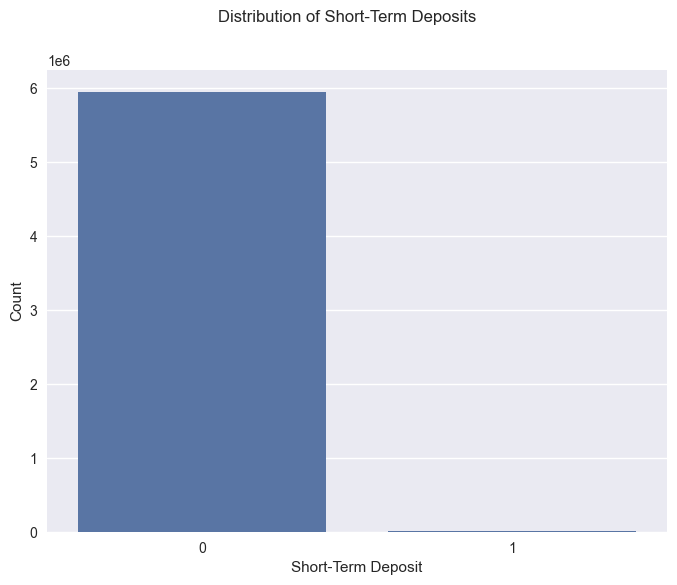

Proportion of customers with short-term deposits:
short_term_deposit
0    99.741838
1     0.258162
Name: proportion, dtype: float64


In [390]:
# Distribution plot
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_all_three, x='short_term_deposit')
plt.suptitle('Distribution of Short-Term Deposits')
plt.xlabel('Short-Term Deposit')
plt.ylabel('Count')
plt.show()

# Proportion of customers with short-term deposits
short_term_deposit_counts = merged_all_three['short_term_deposit'].value_counts(normalize=True) * 100
print("Proportion of customers with short-term deposits:")
print(short_term_deposit_counts)


We can see that only 0.25% of the customers have this service.Let's analyze this over time.

In [391]:

# Group by 'entry_date' and calculate the sum of short-term deposits for each date
short_term_deposit_sum_over_time = merged_all_three.groupby(level='pk_partition')['short_term_deposit'].sum()

# Create a DataFrame from the grouped data
monthly_aggregated = pd.DataFrame({'Total_Short_Term_Deposit': short_term_deposit_sum_over_time})

# Display the DataFrame
display(monthly_aggregated)


,Total_Short_Term_Deposit
pk_partition,
2018-01-28,883
2018-02-28,1343
2018-03-28,1664
2018-04-28,1740
2018-05-28,1455
2018-06-28,1244
2018-07-28,1282
2018-08-28,1335
2018-09-28,1386


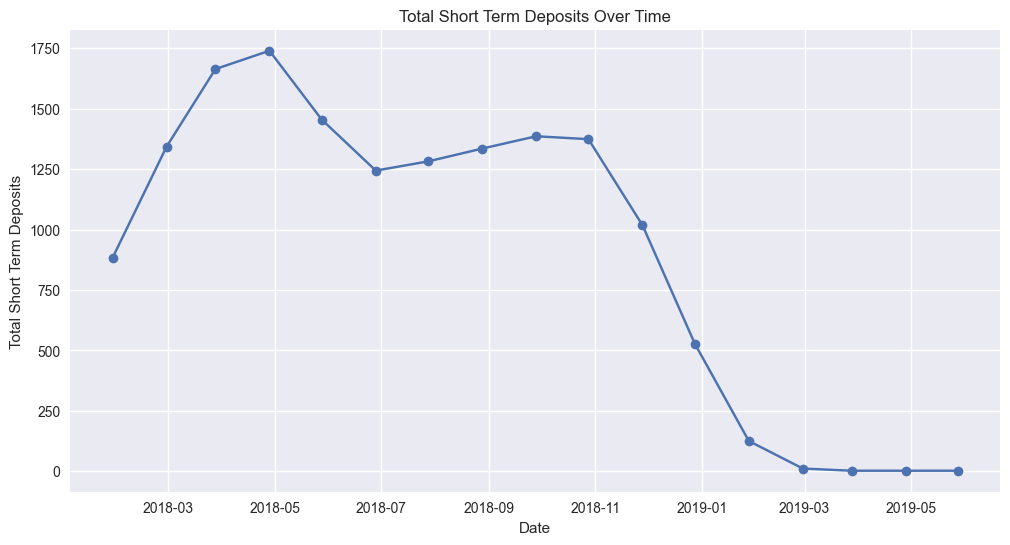

In [392]:
# Plot the Total_Short_Term_Deposit over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_aggregated.index,monthly_aggregated['Total_Short_Term_Deposit'], marker='o', linestyle='-')
plt.title('Total Short Term Deposits Over Time')
plt.xlabel('Date')
plt.ylabel('Total Short Term Deposits')
plt.grid(True)
plt.show()

It is so messy, let's resample it 

An interesting pattern unfolds from January 2018 to May 2018, where there is a significant surge in the number of subscribers, soaring from 883 to 1740. However, this trend abruptly shifts in the subsequent months, with the number of subscribers decreasing from May 2018 to July 2018, from 1740 to 1244. Following this, there is a slight increase in subscribers up to October 2018, from 1244 to 1374. Subsequently, a steep decline is observed from November 2018 to June 2019.

Further investigation is necessary to comprehend the dynamics behind these fluctuations. It's imperative to explore other features related to deposits to uncover potential reasons for these trends.

Based on this analysis, it appears that the company and investors may have hurriedly launched new products without ensuring that the platform had sufficient capacity and foundation to support them. Additionally, the diversification of the product portfolio may have led to a loss of focus, diluting the effectiveness of marketing efforts.



As I consider the role of deceased customers and their potential influence on the validity of my subsequent analysis, I prioritize examining this subset of customers. Initially, I intend to encode their status from "S" (Si) and "N" (No) to numerical values of 0 and 1, respectively. Following this, I plan to apply the same methodology utilized for short-term deposits and incorporate this information into my date-based aggregated table.

### Deceased

In [393]:
# look at the general characteristics
merged_all_three['deceased'].info()


<class 'pandas.core.series.Series'>
DatetimeIndex: 5962924 entries, 2018-01-28 to 2019-05-28
Series name: deceased
Non-Null Count    Dtype 
--------------    ----- 
5962924 non-null  object
dtypes: object(1)
memory usage: 91.0+ MB


In [394]:
merged_all_three['deceased'].unique()

array(['N', 'S'], dtype=object)

In [395]:

# Replace 'S' with 1 and 'N' with 0 in the 'deceased' column
merged_all_three['deceased'] = merged_all_three['deceased'].replace({'S': 1, 'N': 0})

In [396]:
merged_all_three['deceased'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 5962924 entries, 2018-01-28 to 2019-05-28
Series name: deceased
Non-Null Count    Dtype
--------------    -----
5962924 non-null  int64
dtypes: int64(1)
memory usage: 91.0 MB


In [397]:
merged_all_three['deceased'].describe()

count    5.962924e+06
mean     1.802807e-04
std      1.342565e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: deceased, dtype: float64

We can see the types changes to int.

In [398]:
merged_all_three['deceased'].unique()

array([0, 1], dtype=int64)

In [399]:
monthly_aggregated
# Group by 'pk_partition' and calculate the sum of short-term deposits for each date
monthly_aggregated['deceased'] = merged_all_three.groupby(level='pk_partition')['deceased'].sum()
# Display the DataFrame
display(monthly_aggregated)

,Total_Short_Term_Deposit,deceased
pk_partition,,
2018-01-28,883,47
2018-02-28,1343,47
2018-03-28,1664,47
2018-04-28,1740,46
2018-05-28,1455,47
2018-06-28,1244,45
2018-07-28,1282,55
2018-08-28,1335,57
2018-09-28,1386,64


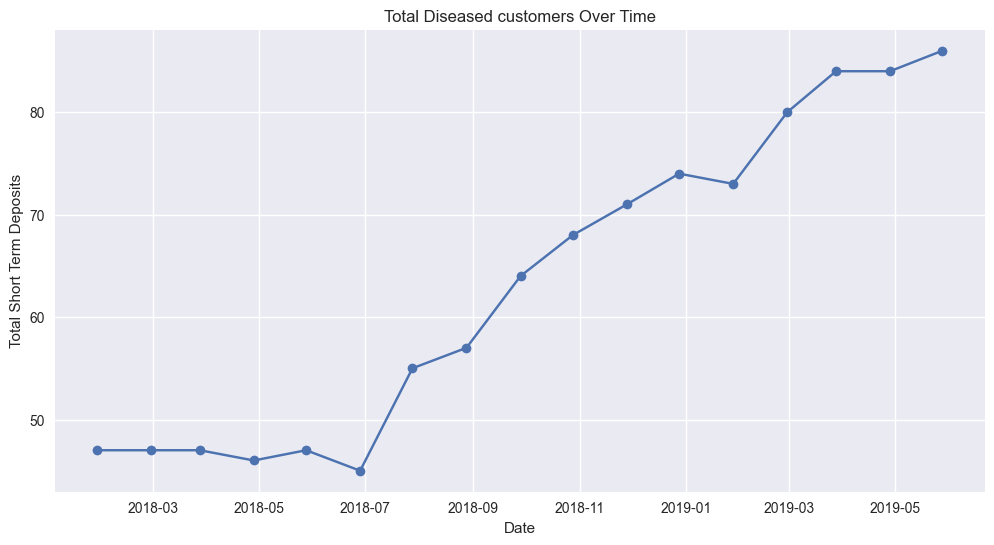

In [400]:
# Plot the Total_Short_Term_Deposit over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_aggregated.index,monthly_aggregated['deceased'], marker='o', linestyle='-')
plt.title('Total Diseased customers Over Time')
plt.xlabel('Date')
plt.ylabel('Total Short Term Deposits')
plt.grid(True)
plt.show()

We can observe that total number of deseased subscribers increased from july 2018 with 45 to June 2019 with 86. This seems to be accumulative which is meaningless. We should check whether the deseased person appears in the next batch(it seems it appears but let's check)

In [401]:
merged_all_three[merged_all_three['deceased']==1]

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-01-28,1007836,0,0,0,0,0,1,0,0,0.0,...,2015-03-07,KFA,1.0,02 - PARTICULARES,ES,28.0,H,84,1,81310.38
2018-01-28,1012035,0,0,0,0,0,0,0,1,0.0,...,2016-02-01,KFC,0.0,02 - PARTICULARES,ES,18.0,V,34,1,62868.66
2018-01-28,1015200,0,0,0,0,0,0,0,0,0.0,...,2015-05-09,KFC,1.0,02 - PARTICULARES,ES,28.0,V,72,1,61823.52
2018-01-28,1026360,0,0,0,0,0,1,0,0,0.0,...,2015-07-19,KFC,1.0,02 - PARTICULARES,ES,46.0,V,98,1,64335.21
2018-01-28,1028045,0,0,0,0,0,0,0,0,0.0,...,2015-07-23,KHE,0.0,03 - UNIVERSITARIO,ES,8.0,V,25,1,164161.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-28,281352,0,0,0,0,0,0,0,0,0.0,...,2015-02-20,KFC,0.0,02 - PARTICULARES,ES,8.0,H,93,1,376117.71
2019-05-28,396977,0,0,0,0,0,0,0,0,0.0,...,2015-12-03,KAT,1.0,03 - UNIVERSITARIO,ES,9.0,H,53,1,80128.14
2019-05-28,676170,0,0,0,0,0,0,0,0,0.0,...,2016-03-06,KAT,0.0,02 - PARTICULARES,ES,18.0,V,66,1,133034.88


In [402]:

rows_with_pk_id_1054415 = merged_all_three[merged_all_three['pk_cid'] == '1054415']

# Print the resulting DataFrame
rows_with_pk_id_1054415


,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-01-28,1054415,0,0,0,0,0,0,0,0,0.0,...,2015-08-28,KFC,0.0,02 - PARTICULARES,ES,46.0,V,60,1,96549.36
2018-02-28,1054415,0,0,0,0,0,0,0,0,0.0,...,2015-08-28,KFC,0.0,02 - PARTICULARES,ES,46.0,V,60,1,96549.36
2018-03-28,1054415,0,0,0,0,0,0,0,0,0.0,...,2015-08-28,KFC,0.0,02 - PARTICULARES,ES,46.0,V,60,1,96549.36
2018-04-28,1054415,0,0,0,0,0,0,0,0,0.0,...,2015-08-28,KFC,0.0,02 - PARTICULARES,ES,46.0,V,60,1,96549.36
2018-05-28,1054415,0,0,0,0,0,0,0,0,0.0,...,2015-08-28,KFC,0.0,02 - PARTICULARES,ES,46.0,V,60,1,96549.36
2018-06-28,1054415,0,0,0,0,0,0,0,0,0.0,...,2015-08-28,KFC,0.0,02 - PARTICULARES,ES,46.0,V,60,1,96549.36
2018-07-28,1054415,0,0,0,0,0,0,0,0,0.0,...,2015-08-28,KFC,0.0,02 - PARTICULARES,ES,46.0,V,60,1,96549.36
2018-08-28,1054415,0,0,0,0,0,0,0,0,0.0,...,2015-08-28,KFC,0.0,02 - PARTICULARES,ES,46.0,V,60,1,96549.36
2018-09-28,1054415,0,0,0,0,0,0,0,0,0.0,...,2015-08-28,KFC,0.0,02 - PARTICULARES,ES,46.0,V,60,1,96549.36


we can see in all batches we have the deceased person appears. We should remove a subscriber if she is dead in the next batches. So let's code that

1. Deceased cleaned and logical done
2. again analyze
3. sketch the charts
4. subscribed /unsubscribed
5. Entry_date
6. active user

In [403]:
merged_all_three[merged_all_three['pk_cid'] == '1054415']

# Print the resulting DataFrame
#rows_with_pk_id_1054415

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-01-28,1054415,0,0,0,0,0,0,0,0,0.0,...,2015-08-28,KFC,0.0,02 - PARTICULARES,ES,46.0,V,60,1,96549.36
2018-02-28,1054415,0,0,0,0,0,0,0,0,0.0,...,2015-08-28,KFC,0.0,02 - PARTICULARES,ES,46.0,V,60,1,96549.36
2018-03-28,1054415,0,0,0,0,0,0,0,0,0.0,...,2015-08-28,KFC,0.0,02 - PARTICULARES,ES,46.0,V,60,1,96549.36
2018-04-28,1054415,0,0,0,0,0,0,0,0,0.0,...,2015-08-28,KFC,0.0,02 - PARTICULARES,ES,46.0,V,60,1,96549.36
2018-05-28,1054415,0,0,0,0,0,0,0,0,0.0,...,2015-08-28,KFC,0.0,02 - PARTICULARES,ES,46.0,V,60,1,96549.36
2018-06-28,1054415,0,0,0,0,0,0,0,0,0.0,...,2015-08-28,KFC,0.0,02 - PARTICULARES,ES,46.0,V,60,1,96549.36
2018-07-28,1054415,0,0,0,0,0,0,0,0,0.0,...,2015-08-28,KFC,0.0,02 - PARTICULARES,ES,46.0,V,60,1,96549.36
2018-08-28,1054415,0,0,0,0,0,0,0,0,0.0,...,2015-08-28,KFC,0.0,02 - PARTICULARES,ES,46.0,V,60,1,96549.36
2018-09-28,1054415,0,0,0,0,0,0,0,0,0.0,...,2015-08-28,KFC,0.0,02 - PARTICULARES,ES,46.0,V,60,1,96549.36


In [404]:
display(merged_all_three)

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-01-28,1000028,0,0,0,0,0,0,0,0,0.0,...,2017-01-03,KHC,1.0,02 - PARTICULARES,ES,28.0,H,43,0,133378.89
2018-01-28,1000096,0,0,0,0,0,0,0,0,0.0,...,2015-01-03,KFA,1.0,02 - PARTICULARES,ES,28.0,H,9,0,137882.43
2018-01-28,1000113,0,0,0,0,0,0,0,0,0.0,...,2015-04-23,KAT,0.0,02 - PARTICULARES,ES,14.0,V,53,0,136705.50
2018-01-28,1000157,0,0,0,0,0,0,0,0,0.0,...,2016-03-20,KFC,1.0,02 - PARTICULARES,ES,46.0,V,44,0,NaN
2018-01-28,1000217,0,0,0,0,1,0,0,0,0.0,...,2016-08-19,KAT,1.0,02 - PARTICULARES,ES,28.0,H,43,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-28,998859,0,0,0,0,0,0,0,1,1.0,...,2015-05-05,KFC,1.0,02 - PARTICULARES,ES,28.0,V,44,0,126242.40
2019-05-28,999706,0,0,0,0,0,0,0,0,0.0,...,2018-12-11,KFC,0.0,02 - PARTICULARES,ES,28.0,H,14,0,NaN
2019-05-28,999825,0,0,0,0,0,0,0,0,0.0,...,2017-01-01,KFC,1.0,02 - PARTICULARES,ES,48.0,V,40,0,NaN


In [405]:
merged_all_three.reset_index(inplace=True)


In [406]:
merged_all_three.sort_values(by='pk_partition', inplace=True)
merged_all_three

,pk_partition,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
0,2018-01-28,1000028,0,0,0,0,0,0,0,0,...,2017-01-03,KHC,1.0,02 - PARTICULARES,ES,28.0,H,43,0,133378.89
159655,2018-01-28,1251467,0,0,0,0,1,0,0,0,...,2017-04-01,KFC,1.0,03 - UNIVERSITARIO,ES,28.0,V,27,0,317248.26
159656,2018-01-28,1251470,0,0,0,0,0,0,0,0,...,2017-04-02,KFA,1.0,02 - PARTICULARES,ES,28.0,H,44,0,64574.34
159657,2018-01-28,1251471,0,0,0,0,0,0,0,0,...,2017-04-02,KAT,1.0,02 - PARTICULARES,ES,41.0,H,36,0,62759.43
159658,2018-01-28,1251472,0,0,0,0,0,0,0,0,...,2017-08-22,KAT,0.0,02 - PARTICULARES,ES,41.0,H,58,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667587,2019-05-28,1190996,0,0,0,0,0,0,0,0,...,2016-10-07,KHE,0.0,03 - UNIVERSITARIO,ES,41.0,H,22,0,112989.03
5667586,2019-05-28,1190995,0,0,0,0,0,0,0,0,...,2016-10-07,KHE,1.0,03 - UNIVERSITARIO,ES,28.0,H,22,0,NaN
5667585,2019-05-28,1190994,0,0,0,0,0,0,0,0,...,2016-10-07,KHE,1.0,03 - UNIVERSITARIO,ES,46.0,V,24,0,58820.10
5667596,2019-05-28,1191008,0,0,0,0,0,0,0,0,...,2016-10-07,KHE,0.0,03 - UNIVERSITARIO,ES,6.0,V,23,0,28152.54


In [407]:
merged_all_three[merged_all_three['deceased']==1]

,pk_partition,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
160371,2018-01-28,1253001,0,0,0,0,0,0,0,0,...,2017-04-09,KAT,1.0,02 - PARTICULARES,ES,28.0,H,53,1,116450.01
163705,2018-01-28,1260202,0,0,0,0,0,0,0,0,...,2017-05-27,KFC,1.0,02 - PARTICULARES,ES,28.0,V,41,1,NaN
162890,2018-01-28,1258486,0,0,0,0,0,1,0,0,...,2017-05-16,KAT,1.0,01 - TOP,ES,50.0,V,101,1,70870.41
151240,2018-01-28,1233346,0,0,0,0,0,0,0,0,...,2016-12-20,KAT,0.0,02 - PARTICULARES,ES,28.0,V,52,1,73210.65
155387,2018-01-28,1242218,0,0,0,0,0,0,0,0,...,2017-02-06,KAT,1.0,02 - PARTICULARES,ES,19.0,H,83,1,166968.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5721033,2019-05-28,1258486,0,0,0,0,0,1,0,0,...,2017-05-16,KAT,1.0,01 - TOP,ES,50.0,V,102,1,70870.41
5653783,2019-05-28,1175266,0,0,0,0,0,0,0,0,...,2016-09-12,KFC,1.0,02 - PARTICULARES,ES,8.0,H,46,1,100476.03
5634337,2019-05-28,1151479,0,0,0,0,0,0,0,0,...,2016-07-30,KAT,1.0,02 - PARTICULARES,ES,45.0,V,81,1,32223.39
5661983,2019-05-28,1184647,0,0,0,0,0,0,0,0,...,2016-09-27,KHE,1.0,03 - UNIVERSITARIO,ES,10.0,H,26,1,27473.40


In [408]:
# Identify the first occurrence of deceased being 1 for each pk_cid
first_deceased_occurrence = merged_all_three.groupby('pk_cid')['deceased'].transform('idxmax')

# Set deceased_remove_flag to True for rows where deceased is 1 and it's not the first occurrence for each pk_cid
merged_all_three['deceased_remove_flag'] = (merged_all_three['deceased'] == 1) & (merged_all_three.index > first_deceased_occurrence)

# Filter out the rows where deceased_remove_flag is True
merged_all_three = merged_all_three[~merged_all_three['deceased_remove_flag']]

# Drop the 'deceased_remove_flag' column
merged_all_three.drop('deceased_remove_flag', axis=1, inplace=True)


In [409]:
merged_all_three

,pk_partition,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
0,2018-01-28,1000028,0,0,0,0,0,0,0,0,...,2017-01-03,KHC,1.0,02 - PARTICULARES,ES,28.0,H,43,0,133378.89
159655,2018-01-28,1251467,0,0,0,0,1,0,0,0,...,2017-04-01,KFC,1.0,03 - UNIVERSITARIO,ES,28.0,V,27,0,317248.26
159656,2018-01-28,1251470,0,0,0,0,0,0,0,0,...,2017-04-02,KFA,1.0,02 - PARTICULARES,ES,28.0,H,44,0,64574.34
159657,2018-01-28,1251471,0,0,0,0,0,0,0,0,...,2017-04-02,KAT,1.0,02 - PARTICULARES,ES,41.0,H,36,0,62759.43
159658,2018-01-28,1251472,0,0,0,0,0,0,0,0,...,2017-08-22,KAT,0.0,02 - PARTICULARES,ES,41.0,H,58,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667587,2019-05-28,1190996,0,0,0,0,0,0,0,0,...,2016-10-07,KHE,0.0,03 - UNIVERSITARIO,ES,41.0,H,22,0,112989.03
5667586,2019-05-28,1190995,0,0,0,0,0,0,0,0,...,2016-10-07,KHE,1.0,03 - UNIVERSITARIO,ES,28.0,H,22,0,NaN
5667585,2019-05-28,1190994,0,0,0,0,0,0,0,0,...,2016-10-07,KHE,1.0,03 - UNIVERSITARIO,ES,46.0,V,24,0,58820.10
5667596,2019-05-28,1191008,0,0,0,0,0,0,0,0,...,2016-10-07,KHE,0.0,03 - UNIVERSITARIO,ES,6.0,V,23,0,28152.54


In [410]:
merged_all_three[merged_all_three['pk_cid'] == '1054415']

,pk_partition,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
32784,2018-01-28,1054415,0,0,0,0,0,0,0,0,...,2015-08-28,KFC,0.0,02 - PARTICULARES,ES,46.0,V,60,1,96549.36


In [411]:
merged_all_three.shape

(5961978, 27)

In [412]:
# let's reset pk_partition as index
merged_all_three.set_index('pk_partition', inplace=True)

In [413]:
merged_all_three[merged_all_three['deceased'] == 1].duplicated().sum()

0

In [414]:
merged_all_three

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-01-28,1000028,0,0,0,0,0,0,0,0,0.0,...,2017-01-03,KHC,1.0,02 - PARTICULARES,ES,28.0,H,43,0,133378.89
2018-01-28,1251467,0,0,0,0,1,0,0,0,1.0,...,2017-04-01,KFC,1.0,03 - UNIVERSITARIO,ES,28.0,V,27,0,317248.26
2018-01-28,1251470,0,0,0,0,0,0,0,0,0.0,...,2017-04-02,KFA,1.0,02 - PARTICULARES,ES,28.0,H,44,0,64574.34
2018-01-28,1251471,0,0,0,0,0,0,0,0,0.0,...,2017-04-02,KAT,1.0,02 - PARTICULARES,ES,41.0,H,36,0,62759.43
2018-01-28,1251472,0,0,0,0,0,0,0,0,0.0,...,2017-08-22,KAT,0.0,02 - PARTICULARES,ES,41.0,H,58,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-28,1190996,0,0,0,0,0,0,0,0,0.0,...,2016-10-07,KHE,0.0,03 - UNIVERSITARIO,ES,41.0,H,22,0,112989.03
2019-05-28,1190995,0,0,0,0,0,0,0,0,0.0,...,2016-10-07,KHE,1.0,03 - UNIVERSITARIO,ES,28.0,H,22,0,NaN
2019-05-28,1190994,0,0,0,0,0,0,0,0,0.0,...,2016-10-07,KHE,1.0,03 - UNIVERSITARIO,ES,46.0,V,24,0,58820.10


We removed the repititive deceased customers rows. Now let visualize and analyze again:

In [415]:
monthly_aggregated
# Group by 'pk_partition' and calculate the sum of short-term deposits for each date
monthly_aggregated['deceased'] = merged_all_three.groupby(level='pk_partition')['deceased'].sum()
# Display the DataFrame
display(monthly_aggregated)

,Total_Short_Term_Deposit,deceased
pk_partition,,
2018-01-28,883,47
2018-02-28,1343,0
2018-03-28,1664,0
2018-04-28,1740,0
2018-05-28,1455,1
2018-06-28,1244,0
2018-07-28,1282,7
2018-08-28,1335,5
2018-09-28,1386,10


Now the numbers look more logical and real. Let's check the distribution and trend.

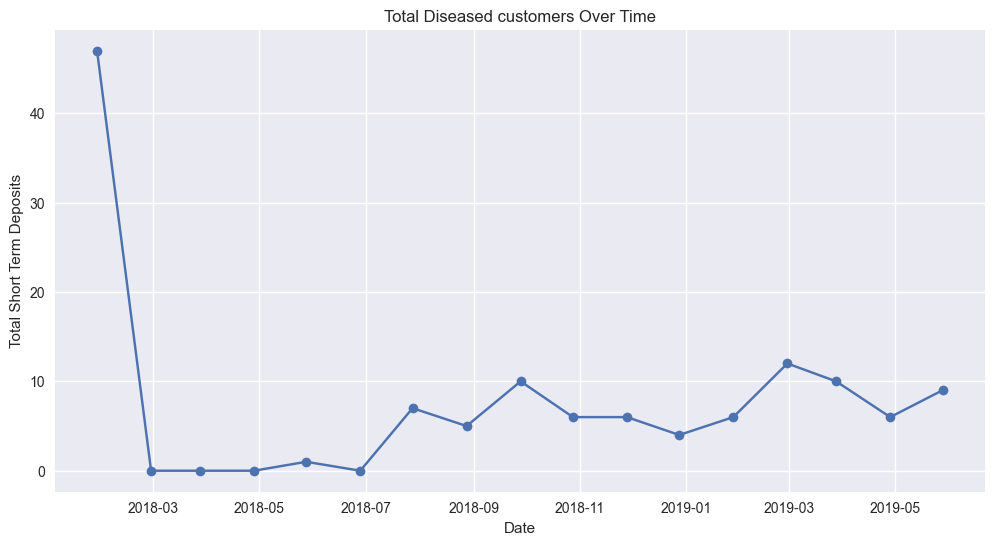

In [416]:
# Plot the Total_Short_Term_Deposit over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_aggregated.index,monthly_aggregated['deceased'], marker='o', linestyle='-')
plt.title('Total Diseased customers Over Time')
plt.xlabel('Date')
plt.ylabel('Total Short Term Deposits')
plt.grid(True)
plt.show()

Before February 2018, we had 47 deceased individuals in our dataset, it is logical as it is cummulative of the last years till 2018-03. This number then decreased to 0 and remained so for three consecutive months: February, March, and April. Following this, we observed fluctuations in the number of deceased individuals, with alternating increases and decreases occurring every other month. Notable peaks occurred in September 2018, with 10 deaths, and then in February 2019 and March 2019, each with 12 and 10 deaths, respectively.

Now, let's examine the distribution of deceased versus alive subscribers. However, it's crucial to consider that as the number of subscribers and their age increases, the likelihood of deaths may also increase. Therefore, we must analyze these factors alongside the deceased status.

Note: Our immediate focus will be on subscribers, followed by commercial sections and then products , to gain a comprehensive understanding of the subscriber dynamics and continue building the storyline we should travel the customer journey and funnel.

In [417]:
# Create a cross table of deceased and alive subscribers
cross_table = pd.crosstab(index=merged_all_three['deceased'], columns='count')

# Calculate the percentage of deceased and alive subscribers
cross_table['percentage'] = cross_table['count'] / cross_table['count'].sum() * 100

# Display the cross table
print(cross_table)

col_0       count  percentage
deceased                     
0         5961849   99.997836
1             129    0.002164


We can see that only 0.0021% are deceased it is so low that we can ignore. For now let's keep them.

**Total Subscribers**

**Active Subscribers**

**New Subscriber**

**Unsubscribed**

### Total Subscribers



In [418]:
# Filter the dataframe to include only non-deceased subscribers
non_deceased_subscribers = merged_all_three[merged_all_three['deceased'] == 0]

# Group by the index (pk_partition) and count the number of unique pk_cid values
total_subscribers = non_deceased_subscribers.groupby('pk_partition')['pk_cid'].nunique()

# Rename the series to 'total_subscribers'
total_subscribers.rename('total_subscribers', inplace=True)
monthly_aggregated['Total_Subscribers']=total_subscribers

In [419]:
monthly_aggregated

,Total_Short_Term_Deposit,deceased,Total_Subscribers
pk_partition,,,
2018-01-28,883,47,239446
2018-02-28,1343,0,242474
2018-03-28,1664,0,245211
2018-04-28,1740,0,247417
2018-05-28,1455,1,249879
2018-06-28,1244,0,252059
2018-07-28,1282,7,339284
2018-08-28,1335,5,352865
2018-09-28,1386,10,375259


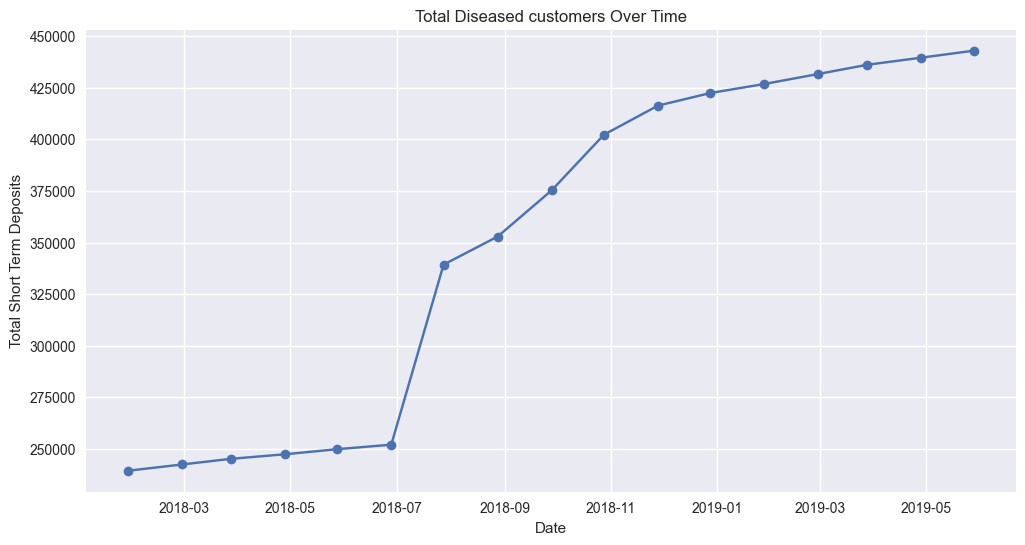

In [420]:
# Plot the Total_subscribers over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_aggregated.index,monthly_aggregated['Total_Subscribers'], marker='o', linestyle='-')
plt.title('Total Diseased customers Over Time')
plt.xlabel('Date')
plt.ylabel('Total Short Term Deposits')
plt.grid(True)
plt.show()

We can see that total subscribers increases tremendously from 239446 to 442909 with greate increase in July 2018 from 252059 to 339284.But we need to investigate on active subscribers as they are who are the most important ones and compare it with inactive customers.

### **Active Subscribers**

Now let's see the active subscribers and how the trend of active subscribers is over time.
Let's check out the whole dateframe

In [421]:

# Pass the converted DataFrame to the skimpy function
sk.skim(merged_all_three)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 5961978 │ │ int32       │ 15    │                                                         │
│ │ Number of columns │ 26      │ │ string      │ 5     │                                                         │
│ └───────────────────┴─────────┘ │ float64     │ 5     │                                                         │
│                                 │ datetime64  │ 1     │                                                         │
│                                 └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name       ┃ NA      ┃ NA %  ┃ mean    ┃ sd     ┃ p0   ┃ p25   ┃ p50   ┃ p75    ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ short_term_deposi │       0 │     0 │  0.0026 │  0.051 │    0 │     0 │     0 │      0 │        1 │   ▇    │  │
│ │ t                 │         │       │         │        │      │       │       │        │          │        │  │
│ │ loans             │       0 │     0 │ 7.8e-05 │ 0.0089 │    0 │     0 │     0 │      0 │        1 │   ▇    │  │
│ │ mortgage          │       0 │     0 │ 5.4e-05 │ 0.0074 │    0 │     0 │     0 │      0 │        1 │   ▇    │  │
│ │ funds             │       0 │     0 │  0.0034 │  0.058 │    0 │     0 │     0 │      0 │        1 │   ▇    │  │
│ │ securities        │       0 │     0 │  0.0037 │  0.061 │    0 │     0 │     0 │      0 │        1 │   ▇    │  │
│ │ long_term_deposit │       0 │     0 │   0.017 │   0.13 │    0 │     0 │     0 │      0 │        1 │   ▇    │  │
│ │ em_account_pp     │       0 │     0 │       0 │      0 │    0 │     0 │     0 │      0 │        0 │     ▇  │  │
│ │ credit_card       │       0 │     0 │   0.012 │   0.11 │    0 │     0 │     0 │      0 │        1 │   ▇    │  │
│ │ payroll           │      61 │     0 │   0.035 │   0.18 │    0 │     0 │     0 │      0 │        1 │   ▇    │  │
│ │ pension_plan      │      61 │     0 │   0.037 │   0.19 │    0 │     0 │     0 │      0 │        1 │   ▇    │  │
│ │ payroll_account   │       0 │     0 │   0.055 │   0.23 │    0 │     0 │     0 │      0 │        1 │   ▇    │  │
│ │ emc_account       │       0 │     0 │   0.055 │   0.23 │    0 │     0 │     0 │      0 │        1 │   ▇    │  │
│ │ debit_card        │       0 │     0 │   0.094 │   0.29 │    0 │     0 │     0 │      0 │        1 │ ▇    ▁ │  │
│ │ em_account_p      │       0 │     0 │ 5.7e-06 │ 0.0024 │    0 │     0 │     0 │      0 │        1 │   ▇    │  │
│ │ em_acount         │       0 │     0 │    0.73 │   0.44 │    0 │     0 │     1 │      1 │        1 │ ▃    ▇ │  │
│ │ active_customer   │       0 │     0 │     0.4 │   0.49 │    0 │     0 │     0 │      1 │        1 │ ▇    ▅ │  │
│ │ region_code       │    2260 │  0.04 │      26 │     14 │    1 │    13 │    28 │     36 │       52 │ ▅▃▂▇▃▃ │  │
│ │ age               │       0 │     0 │      30 │     12 │    2 │    22 │    25 │     34 │      100 │   ▇▂   │  │
│ │ deceased          │       0 │     0 │ 2.2e-05 │ 0.0047 │    0 │     0 │     0 │      0 │        1 │   ▇    │  │
│ │ salary            │ 1511903 │ 25.36 │  120000 │ 2000

In [422]:
merged_all_three['active_customer']

pk_partition
2018-01-28    1.0
2018-01-28    1.0
2018-01-28    1.0
2018-01-28    1.0
2018-01-28    0.0
             ... 
2019-05-28    0.0
2019-05-28    1.0
2019-05-28    1.0
2019-05-28    0.0
2019-05-28    1.0
Name: active_customer, Length: 5961978, dtype: float64

In [423]:
merged_all_three['active_customer'].unique()

array([1., 0.])

In [424]:
# Convert 'active_customer' column to boolean
merged_all_three['active_customer'] = merged_all_three['active_customer'].astype(bool)

In [425]:
merged_all_three['active_customer'].describe()

count     5961978
unique          2
top         False
freq      3557248
Name: active_customer, dtype: object

In [426]:
# Calculate active users per partition (index) aggregated on count
active_users_per_partition = merged_all_three.groupby('pk_partition')['active_customer'].sum()

# Add the calculated active users as a new column to monthly_aggregated dataframe
monthly_aggregated['Active_Customers'] = active_users_per_partition


In [427]:
monthly_aggregated

,Total_Short_Term_Deposit,deceased,Total_Subscribers,Active_Customers
pk_partition,,,,
2018-01-28,883,47,239446,108211
2018-02-28,1343,0,242474,111048
2018-03-28,1664,0,245211,113769
2018-04-28,1740,0,247417,116281
2018-05-28,1455,1,249879,119029
2018-06-28,1244,0,252059,121524
2018-07-28,1282,7,339284,129250
2018-08-28,1335,5,352865,136319
2018-09-28,1386,10,375259,144753


First let count the active vs not active customers:

In [428]:

# Calculate the sum of active users in the last batch
sum_active_users_last_batch = monthly_aggregated.loc['2019-05-28', 'Active_Customers']

# Get the total subscribers from monthly aggregated DataFrame
total_subscribers_last_batch = monthly_aggregated.loc['2019-05-28', 'Total_Subscribers']

# Calculate the sum of not active users in the last batch
sum_not_active_users_last_batch = total_subscribers_last_batch - sum_active_users_last_batch

print("Sum of Active Users (Last Batch):", sum_active_users_last_batch)
print("Sum of Not Active Users (Last Batch):", sum_not_active_users_last_batch)
percentage_active = sum_active_users_last_batch/ total_subscribers_last_batch *100
print("Proportion of active users (Last Batch):", percentage_active)

Sum of Active Users (Last Batch): 171521
Sum of Not Active Users (Last Batch): 271388
Proportion of active users (Last Batch): 38.72601369581562


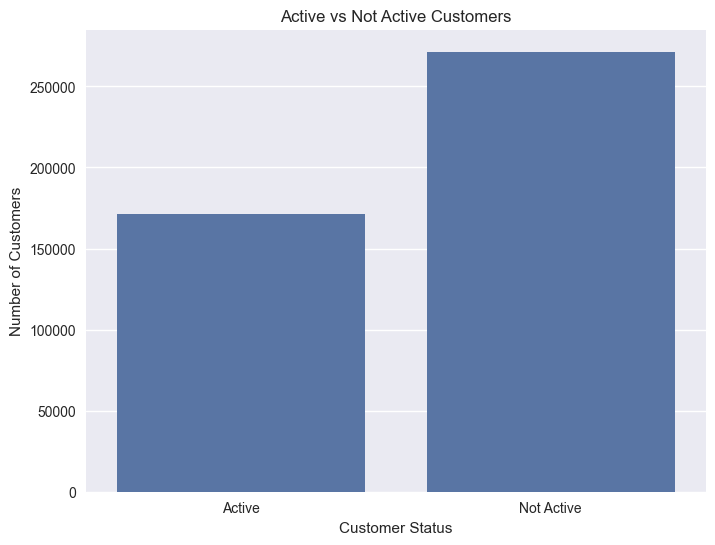

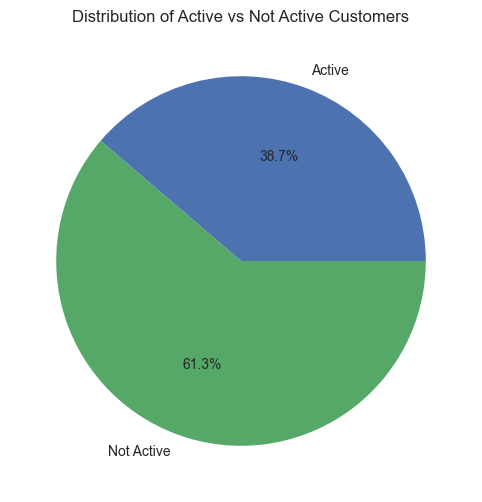

In [429]:
# Define the data for the bar plot
data = {
    'Customer Status': ['Active', 'Not Active'],
    'Number of Customers': [sum_active_users_last_batch,sum_not_active_users_last_batch ]
}
df = pd.DataFrame(data)

# Plot the bar chart using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Customer Status', y='Number of Customers')
plt.title('Active vs Not Active Customers')
plt.xlabel('Customer Status')
plt.ylabel('Number of Customers')
plt.show()
# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(df['Number of Customers'], labels=df['Customer Status'], autopct='%1.1f%%')
plt.title('Distribution of Active vs Not Active Customers')
plt.show()


We can see that 38.7% of the subscribers are active and 61.3% are not active. We should focus on the potential active customers that are not active if we want to get the best result out of the current customer pool to make them more engaged. Let's see how many new customers subscribed each month and how many unsubscribed.

### New Subscribers

In order to extract the new customers we should check in each batch for subscribers with unque ids with entry date in that partition month. Let's do that

In [430]:
# Convert 'entry_date' to datetime format with only date component
merged_all_three['entry_date'] = pd.to_datetime(merged_all_three['entry_date']).dt.date

In [431]:
merged_all_three['entry_date']

pk_partition
2018-01-28    2017-01-03
2018-01-28    2017-04-01
2018-01-28    2017-04-02
2018-01-28    2017-04-02
2018-01-28    2017-08-22
                 ...    
2019-05-28    2016-10-07
2019-05-28    2016-10-07
2019-05-28    2016-10-07
2019-05-28    2016-10-07
2019-05-28    2017-03-27
Name: entry_date, Length: 5961978, dtype: object

In [432]:
#batch_start_dates

In [433]:
# batch_end_dates

In [434]:

# Determine the start and end dates for each partition batch
batch_start_dates = [date.date() for date in merged_all_three.index.unique()]

# Use the previous month's start date as the first start date
previous_month_start_date = batch_start_dates[0] - pd.offsets.MonthBegin(1) - pd.offsets.Day(4) 
previous_month_start_date = previous_month_start_date
batch_start_dates.insert(0, previous_month_start_date)

# Calculate the end dates as the day before the start date of the next batch
batch_end_dates = [start_date - pd.offsets.Day(1) for start_date in batch_start_dates[1:]] + [merged_all_three.index.max()]
batch_end_dates = [date.date() for date in merged_all_three.index.unique()]


In [435]:
# Sort DataFrame by 'pk_cid' within each partition (index)
merged_all_three.sort_values(by=['pk_cid'], inplace=True)
merged_all_three.sort_index(inplace=True)
# Display the sorted DataFrame
merged_all_three

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-01-28,1000028,0,0,0,0,0,0,0,0,0.0,...,2017-01-03,KHC,True,02 - PARTICULARES,ES,28.0,H,43,0,133378.89
2018-01-28,1337215,0,0,0,0,0,0,0,0,0.0,...,2017-10-20,KHE,False,03 - UNIVERSITARIO,ES,10.0,V,21,0,65069.70
2018-01-28,1020957,0,0,0,0,0,0,0,0,0.0,...,2015-06-26,KFC,True,02 - PARTICULARES,ES,28.0,V,42,0,69949.71
2018-01-28,1192777,0,0,0,0,0,0,0,0,0.0,...,2016-10-09,KHE,False,03 - UNIVERSITARIO,ES,33.0,V,23,0,NaN
2018-01-28,1099995,0,0,0,0,0,0,0,0,0.0,...,2015-11-13,KHE,False,03 - UNIVERSITARIO,ES,28.0,V,27,0,144991.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-28,1151972,0,0,0,0,0,0,0,0,0.0,...,2016-07-31,KHE,True,03 - UNIVERSITARIO,ES,8.0,V,22,0,150901.11
2019-05-28,1475476,0,0,0,0,0,0,0,0,0.0,...,2018-10-10,KHQ,False,03 - UNIVERSITARIO,ES,28.0,V,20,0,NaN
2019-05-28,1475475,0,0,0,0,0,0,0,0,0.0,...,2018-10-10,KHQ,True,03 - UNIVERSITARIO,ES,5.0,H,21,0,NaN


In [436]:
# Add new_subscriber column
merged_all_three['new_subscriber'] = 0

In [437]:
merged_all_three.dtypes

pk_cid                 object
short_term_deposit      int64
loans                   int64
mortgage                int64
funds                   int64
securities              int64
long_term_deposit       int64
em_account_pp           int64
credit_card             int64
payroll               float64
pension_plan          float64
payroll_account         int64
emc_account             int64
debit_card              int64
em_account_p            int64
em_acount               int64
entry_date             object
entry_channel          object
active_customer          bool
segment                object
country_id             object
region_code           float64
gender                 object
age                     int64
deceased                int64
salary                float64
new_subscriber          int64
dtype: object

In [438]:
merged_all_three.index.dtype


dtype('<M8[ns]')

In [439]:
merged_all_three['entry_date'].values

array([datetime.date(2017, 1, 3), datetime.date(2017, 10, 20),
       datetime.date(2015, 6, 26), ..., datetime.date(2018, 10, 10),
       datetime.date(2016, 7, 31), datetime.date(2017, 3, 27)],
      dtype=object)

In [440]:
merged_all_three['entry_date'].T

pk_partition
2018-01-28    2017-01-03
2018-01-28    2017-10-20
2018-01-28    2015-06-26
2018-01-28    2016-10-09
2018-01-28    2015-11-13
                 ...    
2019-05-28    2016-07-31
2019-05-28    2018-10-10
2019-05-28    2018-10-10
2019-05-28    2016-07-31
2019-05-28    2017-03-27
Name: entry_date, Length: 5961978, dtype: object

In [441]:
# Convert index to datetime 
merged_all_three.index = pd.to_datetime(merged_all_three.index)
merged_all_three.index.dtype


dtype('<M8[ns]')

In [442]:
merged_all_three['entry_date']=pd.to_datetime(merged_all_three['entry_date'])

merged_all_three['entry_date'].dtype


dtype('<M8[ns]')

In [443]:
merged_all_three.columns

Index(['pk_cid', 'short_term_deposit', 'loans', 'mortgage', 'funds',
       'securities', 'long_term_deposit', 'em_account_pp', 'credit_card',
       'payroll', 'pension_plan', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_acount', 'entry_date',
       'entry_channel', 'active_customer', 'segment', 'country_id',
       'region_code', 'gender', 'age', 'deceased', 'salary', 'new_subscriber'],
      dtype='object')

In [444]:
# Sort by index and then by pk_cid within each index group
merged_all_three.sort_values(by=['pk_partition', 'pk_cid'],inplace=True)
merged_all_three[merged_all_three['pk_cid'] == '1006949']

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary,new_subscriber
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-01-28,1006949,0,0,0,0,0,0,0,0,0.0,...,KHC,True,02 - PARTICULARES,ES,20.0,V,42,0,NaN,0
2018-02-28,1006949,0,0,0,0,0,0,0,0,1.0,...,KHC,True,02 - PARTICULARES,ES,20.0,V,42,0,NaN,0
2018-03-28,1006949,0,0,0,0,0,0,0,0,1.0,...,KHC,True,02 - PARTICULARES,ES,20.0,V,42,0,NaN,0
2018-04-28,1006949,0,0,0,0,0,0,0,0,1.0,...,KHC,True,02 - PARTICULARES,ES,20.0,V,42,0,NaN,0
2018-05-28,1006949,0,0,0,0,0,0,0,0,1.0,...,KHC,True,02 - PARTICULARES,ES,20.0,V,42,0,NaN,0
2018-06-28,1006949,0,0,0,0,0,0,0,0,1.0,...,KHC,True,02 - PARTICULARES,ES,20.0,V,42,0,NaN,0
2018-07-28,1006949,0,0,0,0,0,0,0,0,1.0,...,KHC,True,02 - PARTICULARES,ES,20.0,V,42,0,NaN,0
2018-08-28,1006949,0,0,0,0,0,0,0,0,1.0,...,KHC,True,02 - PARTICULARES,ES,20.0,V,42,0,NaN,0
2018-09-28,1006949,0,0,0,0,0,0,0,0,1.0,...,KHC,True,02 - PARTICULARES,ES,20.0,V,42,0,NaN,0


In [445]:

merged_all_three['prev_partition'] = merged_all_three.index.to_period('M').to_timestamp('M') - pd.DateOffset(months=1)
merged_all_three['prev_partition'] = merged_all_three['prev_partition'].dt.to_period('M').dt.to_timestamp() + pd.DateOffset(days=28)
# Set the day of the month to 29 for all 'prev_partition' dates except for February
'''mask_feb = merged_all_three['prev_partition'].dt.month != 2
merged_all_three.loc[mask_feb, 'prev_partition'] += pd.DateOffset(days=29 - merged_all_three.loc[mask_feb, 'prev_partition'].dt.day)
merged_all_three['new_subscriber'] = 0 '''

# Update prev_partition for '2018-02-28' and '2019-02-28'

feb_2018_mask = (merged_all_three['prev_partition'].dt.month == 2) & (merged_all_three['prev_partition'].dt.year == 2018)
feb_2019_mask = (merged_all_three['prev_partition'].dt.month == 2) & (merged_all_three['prev_partition'].dt.year == 2019)
merged_all_three.loc[feb_2018_mask, 'prev_partition'] = pd.to_datetime('2018-03-01')
merged_all_three.loc[feb_2019_mask, 'prev_partition'] = pd.to_datetime('2019-03-01')
jan_2018_mask = (merged_all_three.index.month == 1) & (merged_all_three.index.year == 2018)
merged_all_three.loc[jan_2018_mask, 'prev_partition'] = pd.to_datetime('2017-12-29')

In [446]:
merged_all_three['prev_partition']

pk_partition
2018-01-28   2017-12-29
2018-01-28   2017-12-29
2018-01-28   2017-12-29
2018-01-28   2017-12-29
2018-01-28   2017-12-29
                ...    
2019-05-28   2019-04-29
2019-05-28   2019-04-29
2019-05-28   2019-04-29
2019-05-28   2019-04-29
2019-05-28   2019-04-29
Name: prev_partition, Length: 5961978, dtype: datetime64[ns]

In [447]:
# Create a mask for rows where entry_date is between prev_partition and index
mask_range = (merged_all_three['prev_partition'] <= merged_all_three['entry_date']) & (merged_all_three['entry_date'] <= merged_all_three.index)
# Set 'new_subscriber' to 1 for rows where the condition is met, else set it to 0
merged_all_three.loc[mask_range, 'new_subscriber'] = 1
merged_all_three.loc[~mask_range, 'new_subscriber'] = 0


In [448]:
merged_all_three[merged_all_three['new_subscriber'] ==1].T

pk_partition,2018-01-28,2018-01-28,2018-01-28,2018-01-28,2018-01-28,2018-01-28,2018-01-28,2018-01-28,2018-01-28,2018-01-28,...,2019-05-28,2019-05-28,2019-05-28,2019-05-28,2019-05-28,2019-05-28,2019-05-28,2019-05-28,2019-05-28,2019-05-28
pk_cid,1007711,1012191,1019691,1022482,1040924,1104096,1122100,1124195,1150659,1180392,...,882865,897155,901163,904582,908668,911985,91532,917783,968958,995279
short_term_deposit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
loans,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mortgage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
funds,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
securities,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
long_term_deposit,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
em_account_pp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
credit_card,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
payroll,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [449]:
# Test 1: Check if new_subscriber is 1 for valid dates
mask = (merged_all_three['prev_partition'] <= merged_all_three['entry_date']) & (merged_all_three['entry_date'] <= merged_all_three.index)
merged_all_three[mask]['entry_date']

pk_partition
2018-01-28   2018-01-26
2018-01-28   2018-01-12
2018-01-28   2018-01-06
2018-01-28   2018-01-26
2018-01-28   2018-01-06
                ...    
2019-05-28   2019-05-08
2019-05-28   2019-05-20
2019-05-28   2019-05-24
2019-05-28   2019-05-04
2019-05-28   2019-05-02
Name: entry_date, Length: 146228, dtype: datetime64[ns]

In [450]:
merged_all_three[merged_all_three['pk_cid'] == '1007711'].T

pk_partition,2018-01-28,2018-02-28,2018-03-28,2018-04-28,2018-05-28,2018-06-28,2018-07-28,2018-08-28,2018-09-28,2018-10-28,2018-11-28,2018-12-28,2019-01-28,2019-02-28,2019-03-28,2019-04-28,2019-05-28
pk_cid,1007711,1007711,1007711,1007711,1007711,1007711,1007711,1007711,1007711,1007711,1007711,1007711,1007711,1007711,1007711,1007711,1007711
short_term_deposit,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
loans,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mortgage,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
funds,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
securities,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
long_term_deposit,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
em_account_pp,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
credit_card,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
payroll,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [451]:
merged_all_three['new_subscriber'].unique()

array([0, 1], dtype=int64)

In [452]:
# Calculate active users per partition (index) aggregated on count
new_subscribers_per_partition = merged_all_three.groupby('pk_partition')['new_subscriber'].sum()

# Add the calculated active users as a new column to monthly_aggregated dataframe
monthly_aggregated['New Subscriber'] = new_subscribers_per_partition

In [453]:
monthly_aggregated

,Total_Short_Term_Deposit,deceased,Total_Subscribers,Active_Customers,New Subscriber
pk_partition,,,,,
2018-01-28,883,47,239446,108211,2590
2018-02-28,1343,0,242474,111048,2720
2018-03-28,1664,0,245211,113769,2143
2018-04-28,1740,0,247417,116281,2090
2018-05-28,1455,1,249879,119029,2214
2018-06-28,1244,0,252059,121524,1925
2018-07-28,1282,7,339284,129250,14091
2018-08-28,1335,5,352865,136319,16973
2018-09-28,1386,10,375259,144753,21416


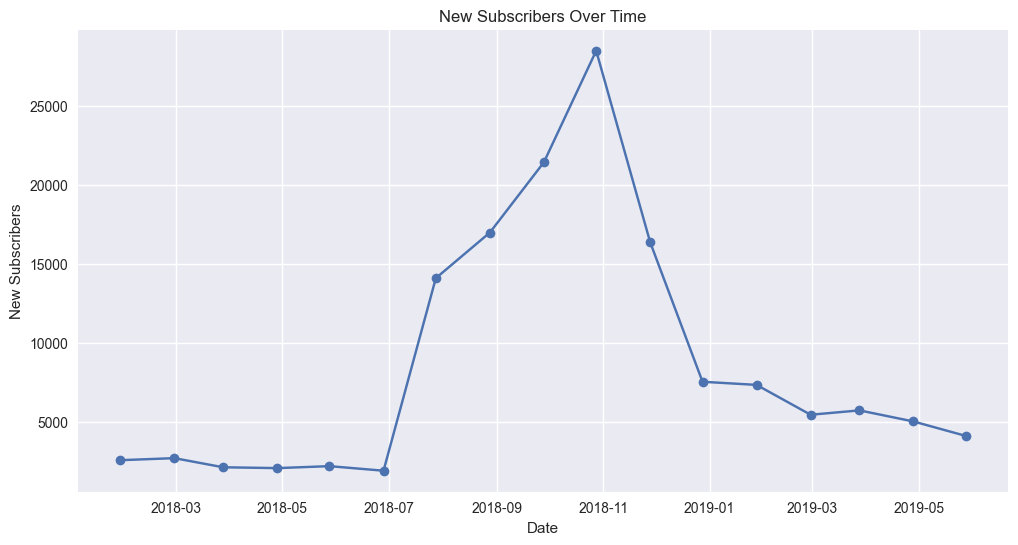

In [454]:
# Plot the new subscribers over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_aggregated.index,monthly_aggregated['New Subscriber'], marker='o', linestyle='-')
plt.title('New Subscribers Over Time')
plt.xlabel('Date')
plt.ylabel('New Subscribers')
plt.grid(True)
plt.show()

The chart indicates that there were 2590 monthly new subscribers in January 2018, maintaining the same pace until July 2018. A significant jump from 1925 to 14095 new subscribers occurred from July 2018 to August. The number continued to rise until the end of October 2018, reaching 28462 new subscribers, before sharply decreasing to 16349 by the end of November and further decreasing until the end of May 2018, with monthly new subscribers totaling 4125. Possible reasons for these trends could include seasonal factors, changes in marketing strategies, adding new products, competition dynamics, economic conditions, word-of-mouth effects, and external influences such as partner and investors requests or technological advancements and competitors market

### Unsubscribed

In [455]:
merged_all_three.columns

Index(['pk_cid', 'short_term_deposit', 'loans', 'mortgage', 'funds',
       'securities', 'long_term_deposit', 'em_account_pp', 'credit_card',
       'payroll', 'pension_plan', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_acount', 'entry_date',
       'entry_channel', 'active_customer', 'segment', 'country_id',
       'region_code', 'gender', 'age', 'deceased', 'salary', 'new_subscriber',
       'prev_partition'],
      dtype='object')

In [456]:
# Sort the DataFrame by pk_cid and pk_partition
merged_all_three.sort_values(by=['pk_cid', 'pk_partition'], inplace=True)

In [457]:
merged_all_three

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,active_customer,segment,country_id,region_code,gender,age,deceased,salary,new_subscriber,prev_partition
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-01-28,1000028,0,0,0,0,0,0,0,0,0.0,...,True,02 - PARTICULARES,ES,28.0,H,43,0,133378.89,0,2017-12-29
2018-02-28,1000028,0,0,0,0,0,0,0,0,0.0,...,True,02 - PARTICULARES,ES,28.0,H,43,0,133378.89,0,2018-01-29
2018-03-28,1000028,0,0,0,0,0,0,0,0,0.0,...,True,02 - PARTICULARES,ES,28.0,H,43,0,133378.89,0,2018-03-01
2018-04-28,1000028,0,0,0,0,0,0,0,0,0.0,...,True,02 - PARTICULARES,ES,28.0,H,43,0,133378.89,0,2018-03-29
2018-05-28,1000028,0,0,0,0,0,0,0,0,0.0,...,True,02 - PARTICULARES,ES,28.0,H,43,0,133378.89,0,2018-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-28,999892,0,0,0,0,0,0,0,0,0.0,...,True,01 - TOP,ES,28.0,H,37,0,335128.68,0,2018-12-29
2019-02-28,999892,0,0,0,0,0,0,0,0,0.0,...,True,01 - TOP,ES,28.0,H,37,0,335128.68,0,2019-01-29
2019-03-28,999892,0,0,0,0,0,0,0,0,0.0,...,True,01 - TOP,ES,28.0,H,38,0,335128.68,0,2019-03-01


In [458]:
merged_all_three[merged_all_three['pk_cid'] == '15891']

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,active_customer,segment,country_id,region_code,gender,age,deceased,salary,new_subscriber,prev_partition
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-07-28,15891,0,0,0,0,0,0,0,0,0.0,...,True,NaN,ES,28.0,H,59,0,NaN,1,2018-06-29
2018-08-28,15891,0,0,0,0,0,0,0,0,0.0,...,False,02 - PARTICULARES,ES,28.0,H,59,0,NaN,0,2018-07-29


In [459]:
unsubscribed_checker= pd.DataFrame(merged_all_three['pk_cid'])
unsubscribed_checker.reset_index(inplace=True)

In [460]:
unsubscribed_checker.columns

Index(['pk_partition', 'pk_cid'], dtype='object')

In [461]:
unsubscribed_checker


,pk_partition,pk_cid
0,2018-01-28,1000028
1,2018-02-28,1000028
2,2018-03-28,1000028
3,2018-04-28,1000028
4,2018-05-28,1000028
...,...,...
5961973,2019-01-28,999892
5961974,2019-02-28,999892
5961975,2019-03-28,999892
5961976,2019-04-28,999892


In [462]:
# Convert 'pk_partition' column to datetime
unsubscribed_checker['pk_partition'] = pd.to_datetime(unsubscribed_checker['pk_partition'])

# Group by 'pk_cid' and find the maximum partition date
max_dates = unsubscribed_checker.groupby('pk_cid')['pk_partition'].max()

# Convert max_dates Series to DataFrame with column name 'last_appearance_date'
last_appearance_date = max_dates.to_frame(name='last_appearance_date')

In [463]:
last_appearance_date

,last_appearance_date
pk_cid,
1000028,2019-05-28
1000096,2019-05-28
1000105,2019-03-28
1000113,2019-05-28
1000130,2019-05-28
...,...
998859,2019-05-28
999706,2019-05-28
999825,2019-05-28


In [464]:
last_appearance_date['unsubscribed']=last_appearance_date['last_appearance_date'] +  pd.DateOffset(months=1)


In [465]:
last_appearance_date.reset_index()

,pk_cid,last_appearance_date,unsubscribed
0,1000028,2019-05-28,2019-06-28
1,1000096,2019-05-28,2019-06-28
2,1000105,2019-03-28,2019-04-28
3,1000113,2019-05-28,2019-06-28
4,1000130,2019-05-28,2019-06-28
...,...,...,...
456368,998859,2019-05-28,2019-06-28
456369,999706,2019-05-28,2019-06-28
456370,999825,2019-05-28,2019-06-28
456371,999835,2019-05-28,2019-06-28


In [466]:
# Count the occurrences of each partition in last_appearance_date['unsubscribed']
unsubscribed_counts = last_appearance_date['unsubscribed'].value_counts()

In [467]:
# Sort unsubscribed_counts_df by index in ascending order
unsubscribed_counts= unsubscribed_counts.sort_index()


In [468]:
# Drop the last row from unsubscribed_counts
unsubscribed_counts = unsubscribed_counts.iloc[:-1]
unsubscribed_counts.drop

<bound method Series.drop of unsubscribed
2018-02-28      47
2018-06-28       1
2018-08-28     961
2018-09-28     920
2018-10-28    1224
2018-11-28    1455
2018-12-28    1301
2019-01-28    2496
2019-02-28    1373
2019-03-28    1272
2019-04-28    1186
2019-05-28    1219
Name: count, dtype: int64>

In [469]:
# Reset the index and rename the columns
unsubscribed_counts = unsubscribed_counts.reset_index().rename(columns={'unsubscribed': 'pk_partition'})

# Set the 'pk_partition' column as the index
unsubscribed_counts.set_index('pk_partition', inplace=True)


In [470]:
unsubscribed_counts.rename(columns={'count': 'unsubscribed'})

,unsubscribed
pk_partition,
2018-02-28,47
2018-06-28,1
2018-08-28,961
2018-09-28,920
2018-10-28,1224
2018-11-28,1455
2018-12-28,1301
2019-01-28,2496
2019-02-28,1373


In [471]:
# Merge unsubscribed_counts_df with monthly_aggregated on their indices
monthly_aggregated= pd.merge(monthly_aggregated, unsubscribed_counts, left_index=True, right_index=True, how='left')


In [472]:
# Rename the column
monthly_aggregated=monthly_aggregated.rename(columns={'count': 'Unsubscribed'})

In [473]:
# Replace NaN values in 'Unsubscribed' column with 0
monthly_aggregated['Unsubscribed'].fillna(0, inplace=True)
# Convert 'Unsubscribed' column from float to int
monthly_aggregated['Unsubscribed'] = monthly_aggregated['Unsubscribed'].astype(int)

In [474]:
monthly_aggregated

,Total_Short_Term_Deposit,deceased,Total_Subscribers,Active_Customers,New Subscriber,Unsubscribed
pk_partition,,,,,,
2018-01-28,883,47,239446,108211,2590,0
2018-02-28,1343,0,242474,111048,2720,47
2018-03-28,1664,0,245211,113769,2143,0
2018-04-28,1740,0,247417,116281,2090,0
2018-05-28,1455,1,249879,119029,2214,0
2018-06-28,1244,0,252059,121524,1925,1
2018-07-28,1282,7,339284,129250,14091,0
2018-08-28,1335,5,352865,136319,16973,961
2018-09-28,1386,10,375259,144753,21416,920


Now we have unsubscribed for each month. Let's plot the line chart vs. time to analyze the trend:

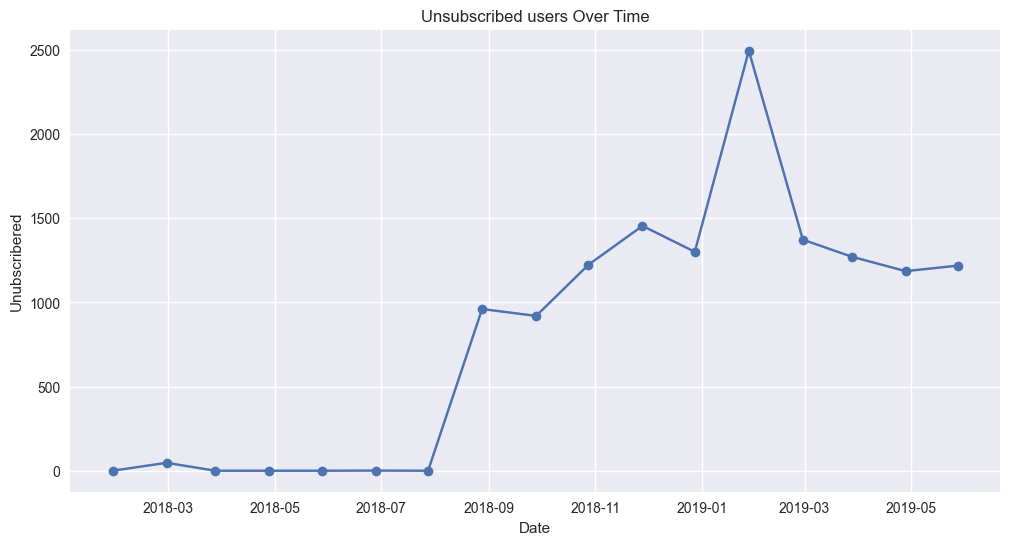

In [475]:
# Plot the new subscribers over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_aggregated.index,monthly_aggregated['Unsubscribed'], marker='o', linestyle='-')
plt.title('Unsubscribed users Over Time')
plt.xlabel('Date')
plt.ylabel('Unubscribered')
plt.grid(True)
plt.show()

We observe that until August, there were no instances of unsubscribed customers. However, there was a notable surge in August, with approximately 1000 unsubscribed customers, and this trend continued to rise steadily until January 2019, reaching a peak of 2496 unsubscribed customers. Following this peak, there was a sudden decline in February 2019, with the number of unsubscribed customers dropping to 1373. This decline persisted, with the count steadily decreasing until May 2019, when the number of unsubscribed customers experienced a slight uptick to 1219. However, it's important to note that these fluctuations in unsubscribed customers may be influenced by changes in the total number of monthly subscribers during the same period, indicating potential correlations between subscriber behavior and subscription model adjustments.

In [476]:
merged_all_three.columns

Index(['pk_cid', 'short_term_deposit', 'loans', 'mortgage', 'funds',
       'securities', 'long_term_deposit', 'em_account_pp', 'credit_card',
       'payroll', 'pension_plan', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_acount', 'entry_date',
       'entry_channel', 'active_customer', 'segment', 'country_id',
       'region_code', 'gender', 'age', 'deceased', 'salary', 'new_subscriber',
       'prev_partition'],
      dtype='object')

In [477]:
monthly_aggregated.columns

Index(['Total_Short_Term_Deposit', 'deceased', 'Total_Subscribers',
       'Active_Customers', 'New Subscriber', 'Unsubscribed'],
      dtype='object')

In [478]:
sociodemographic.columns

Index(['pk_cid', 'pk_partition', 'country_id', 'region_code', 'gender', 'age',
       'deceased', 'salary'],
      dtype='object')

In [479]:
commercial_act.columns

Index(['pk_cid', 'pk_partition', 'entry_date', 'entry_channel',
       'active_customer', 'segment'],
      dtype='object')

In [480]:
products.columns

Index(['pk_cid', 'pk_partition', 'short_term_deposit', 'loans', 'mortgage',
       'funds', 'securities', 'long_term_deposit', 'em_account_pp',
       'credit_card', 'payroll', 'pension_plan', 'payroll_account',
       'emc_account', 'debit_card', 'em_account_p', 'em_acount'],
      dtype='object')

**Mid-term Wrap up**

For now we analyzed the following:

    [ * ] pk_cid

    [ * ] pk_partition

    [ * ] short_term_deposit

    [ * ] active_customer

    [ * ] deceased

Added Features (Feature Engineering)

    [ * ]New Subscriber

    [ * ] unsubscribe
----------
I analyze the remaining columns in the order that the customer journey takes:

1. commercial data

2. demographics and sociogeographic 

3. product
-----
1. first commercial activtiy

[  ] entry_date

[  ] entry_channel

[  ] segment

----
2. next sociodemographic columns

[  ] country_id

[  ] region_code

[  ] gender

[  ] age

[  ] salary

---

3. next product columns

[  ] loans

[  ] mortgage

[  ] funds

[  ] securities

[  ] long_term_deposit

[  ] em_account_pp

[  ] credit_card

[  ] payroll

[  ] pension_plan

[  ] payroll_account

[  ] emc_account

[  ] debit_card

[  ] em_account_p

[  ] pension_plan

[  ] em_acount


Now let's atart analyzing each section:
1. Commercial Activity:

1.1.[  ] entry_date

1.2. [  ] entry_channel

1.3. [  ] segment


#### Entry_Date
we have already make it as as datetime and handled the errors 2019.02.29 and 2018.02.29 which were the invalid dates. I extracted new features from the entry day: Categorize customers based on their tenure: if tenure is more than 3 years consider them as loyal customers, if tenure is between 1 year and 3 years consider them as intermediate customers, if tenure is less than 1 year consider them as new customers.

In [481]:
# Calculate the current date as the last entry date in the dataset
current_date = merged_all_three['entry_date'].max()

# Categorize customers based on entry_date
merged_all_three['customer_type'] = 'Regular Customer'
merged_all_three.loc[(current_date - merged_all_three['entry_date']).dt.days >= 3*365.25, 'customer_type'] = 'Loyal Customer'
merged_all_three.loc[(current_date - merged_all_three['entry_date']).dt.days < 365.25, 'customer_type'] = 'New Customer'

# Display the DataFrame with customer types
display(merged_all_three[['pk_cid', 'entry_date', 'customer_type']])

,pk_cid,entry_date,customer_type
pk_partition,,,
2018-01-28,1000028,2017-01-03,Regular Customer
2018-02-28,1000028,2017-01-03,Regular Customer
2018-03-28,1000028,2017-01-03,Regular Customer
2018-04-28,1000028,2017-01-03,Regular Customer
2018-05-28,1000028,2017-01-03,Regular Customer
...,...,...,...
2019-01-28,999892,2017-03-27,Regular Customer
2019-02-28,999892,2017-03-27,Regular Customer
2019-03-28,999892,2017-03-27,Regular Customer


In [482]:
merged_all_three

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,segment,country_id,region_code,gender,age,deceased,salary,new_subscriber,prev_partition,customer_type
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-01-28,1000028,0,0,0,0,0,0,0,0,0.0,...,02 - PARTICULARES,ES,28.0,H,43,0,133378.89,0,2017-12-29,Regular Customer
2018-02-28,1000028,0,0,0,0,0,0,0,0,0.0,...,02 - PARTICULARES,ES,28.0,H,43,0,133378.89,0,2018-01-29,Regular Customer
2018-03-28,1000028,0,0,0,0,0,0,0,0,0.0,...,02 - PARTICULARES,ES,28.0,H,43,0,133378.89,0,2018-03-01,Regular Customer
2018-04-28,1000028,0,0,0,0,0,0,0,0,0.0,...,02 - PARTICULARES,ES,28.0,H,43,0,133378.89,0,2018-03-29,Regular Customer
2018-05-28,1000028,0,0,0,0,0,0,0,0,0.0,...,02 - PARTICULARES,ES,28.0,H,43,0,133378.89,0,2018-04-29,Regular Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-28,999892,0,0,0,0,0,0,0,0,0.0,...,01 - TOP,ES,28.0,H,37,0,335128.68,0,2018-12-29,Regular Customer
2019-02-28,999892,0,0,0,0,0,0,0,0,0.0,...,01 - TOP,ES,28.0,H,37,0,335128.68,0,2019-01-29,Regular Customer
2019-03-28,999892,0,0,0,0,0,0,0,0,0.0,...,01 - TOP,ES,28.0,H,38,0,335128.68,0,2019-03-01,Regular Customer


In [483]:
# Calculate the frequency table for each customer type
frequency_table = merged_all_three['customer_type'].value_counts()

# Display the frequency table
print(frequency_table)

customer_type
Regular Customer    3320865
Loyal Customer      1641786
New Customer         999327
Name: count, dtype: int64


In [484]:
# Perform binary encoding with three columns
encoded_customer_type = pd.get_dummies(merged_all_three['customer_type'])

# Concatenate the encoded columns with the original DataFrame
merged_all_three = pd.concat([merged_all_three, encoded_customer_type], axis=1)

# Display the DataFrame with binary encoded customer_type
merged_all_three[['pk_cid', 'entry_date', 'customer_type', 'Loyal Customer', 'New Customer', 'Regular Customer']]



,pk_cid,entry_date,customer_type,Loyal Customer,New Customer,Regular Customer
pk_partition,,,,,,
2018-01-28,1000028,2017-01-03,Regular Customer,False,False,True
2018-02-28,1000028,2017-01-03,Regular Customer,False,False,True
2018-03-28,1000028,2017-01-03,Regular Customer,False,False,True
2018-04-28,1000028,2017-01-03,Regular Customer,False,False,True
2018-05-28,1000028,2017-01-03,Regular Customer,False,False,True
...,...,...,...,...,...,...
2019-01-28,999892,2017-03-27,Regular Customer,False,False,True
2019-02-28,999892,2017-03-27,Regular Customer,False,False,True
2019-03-28,999892,2017-03-27,Regular Customer,False,False,True


In [485]:
merged_all_three

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,gender,age,deceased,salary,new_subscriber,prev_partition,customer_type,Loyal Customer,New Customer,Regular Customer
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-01-28,1000028,0,0,0,0,0,0,0,0,0.0,...,H,43,0,133378.89,0,2017-12-29,Regular Customer,False,False,True
2018-02-28,1000028,0,0,0,0,0,0,0,0,0.0,...,H,43,0,133378.89,0,2018-01-29,Regular Customer,False,False,True
2018-03-28,1000028,0,0,0,0,0,0,0,0,0.0,...,H,43,0,133378.89,0,2018-03-01,Regular Customer,False,False,True
2018-04-28,1000028,0,0,0,0,0,0,0,0,0.0,...,H,43,0,133378.89,0,2018-03-29,Regular Customer,False,False,True
2018-05-28,1000028,0,0,0,0,0,0,0,0,0.0,...,H,43,0,133378.89,0,2018-04-29,Regular Customer,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-28,999892,0,0,0,0,0,0,0,0,0.0,...,H,37,0,335128.68,0,2018-12-29,Regular Customer,False,False,True
2019-02-28,999892,0,0,0,0,0,0,0,0,0.0,...,H,37,0,335128.68,0,2019-01-29,Regular Customer,False,False,True
2019-03-28,999892,0,0,0,0,0,0,0,0,0.0,...,H,38,0,335128.68,0,2019-03-01,Regular Customer,False,False,True


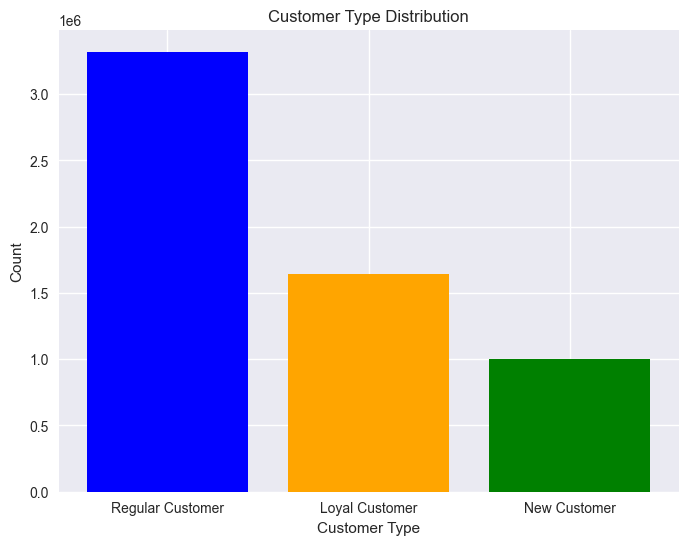

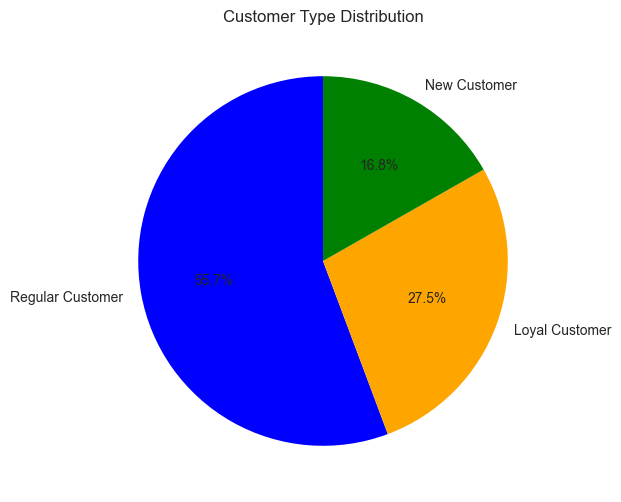

In [486]:

# Calculate the frequency of each customer type
customer_type_counts = merged_all_three['customer_type'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(customer_type_counts.index, customer_type_counts.values, color=['blue', 'orange', 'green'])
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.title('Customer Type Distribution')
plt.show()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(customer_type_counts, labels=customer_type_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'green'])
plt.title('Customer Type Distribution')
plt.show()

"This distribution reflects a logical pattern, with the majority of customers categorized as Regular Customers (55.7%), indicating those subscribed for between 1 and 3 years. This is followed by Loyal Customers, who have been subscribed for more than 3 years, accounting for a significant portion(27.5%). New Customers make up the smallest segment, representing 16.8% of the total."

Customer Type Distribution:

Regular Customer: 3,320,865
Loyal Customer: 1,641,786
New Customer: 999,327

In [487]:
merged_all_three.drop(['customer_type'], axis=1, inplace=True)

In [488]:
merged_all_three

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,region_code,gender,age,deceased,salary,new_subscriber,prev_partition,Loyal Customer,New Customer,Regular Customer
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-01-28,1000028,0,0,0,0,0,0,0,0,0.0,...,28.0,H,43,0,133378.89,0,2017-12-29,False,False,True
2018-02-28,1000028,0,0,0,0,0,0,0,0,0.0,...,28.0,H,43,0,133378.89,0,2018-01-29,False,False,True
2018-03-28,1000028,0,0,0,0,0,0,0,0,0.0,...,28.0,H,43,0,133378.89,0,2018-03-01,False,False,True
2018-04-28,1000028,0,0,0,0,0,0,0,0,0.0,...,28.0,H,43,0,133378.89,0,2018-03-29,False,False,True
2018-05-28,1000028,0,0,0,0,0,0,0,0,0.0,...,28.0,H,43,0,133378.89,0,2018-04-29,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-28,999892,0,0,0,0,0,0,0,0,0.0,...,28.0,H,37,0,335128.68,0,2018-12-29,False,False,True
2019-02-28,999892,0,0,0,0,0,0,0,0,0.0,...,28.0,H,37,0,335128.68,0,2019-01-29,False,False,True
2019-03-28,999892,0,0,0,0,0,0,0,0,0.0,...,28.0,H,38,0,335128.68,0,2019-03-01,False,False,True


In [489]:
monthly_aggregated

,Total_Short_Term_Deposit,deceased,Total_Subscribers,Active_Customers,New Subscriber,Unsubscribed
pk_partition,,,,,,
2018-01-28,883,47,239446,108211,2590,0
2018-02-28,1343,0,242474,111048,2720,47
2018-03-28,1664,0,245211,113769,2143,0
2018-04-28,1740,0,247417,116281,2090,0
2018-05-28,1455,1,249879,119029,2214,0
2018-06-28,1244,0,252059,121524,1925,1
2018-07-28,1282,7,339284,129250,14091,0
2018-08-28,1335,5,352865,136319,16973,961
2018-09-28,1386,10,375259,144753,21416,920


In [490]:
monthly_aggregated
# Calculate active users per partition (index) aggregated on count
Loyal_Customer_per_partition = merged_all_three.groupby('pk_partition')['Loyal Customer'].sum()
New_Customer_per_partition = merged_all_three.groupby('pk_partition')['New Customer'].sum()
Regular_Customer_per_partition = merged_all_three.groupby('pk_partition')['Regular Customer'].sum()
# Add the calculated active users as a new column to monthly_aggregated dataframe
monthly_aggregated['Loyal Customer'] = Loyal_Customer_per_partition
monthly_aggregated['New Customer'] = New_Customer_per_partition
monthly_aggregated['Regular Customer'] =Regular_Customer_per_partition

In [491]:
monthly_aggregated

,Total_Short_Term_Deposit,deceased,Total_Subscribers,Active_Customers,New Subscriber,Unsubscribed,Loyal Customer,New Customer,Regular Customer
pk_partition,,,,,,,,,
2018-01-28,883,47,239446,108211,2590,0,84767,0,154726
2018-02-28,1343,0,242474,111048,2720,47,84708,0,157766
2018-03-28,1664,0,245211,113769,2143,0,84658,0,160553
2018-04-28,1740,0,247417,116281,2090,0,84577,0,162840
2018-05-28,1455,1,249879,119029,2214,0,84554,0,165326
2018-06-28,1244,0,252059,121524,1925,1,84514,1872,165673
2018-07-28,1282,7,339284,129250,14091,0,103583,19950,215758
2018-08-28,1335,5,352865,136319,16973,961,103462,34067,215341
2018-09-28,1386,10,375259,144753,21416,920,103382,56827,215060


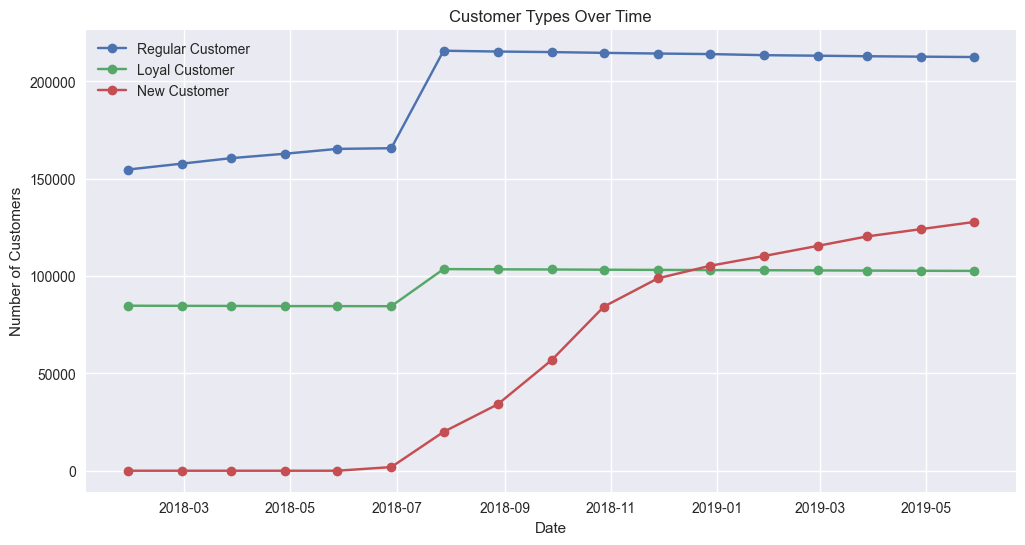

In [492]:
# Plot the three types of subscribers over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_aggregated.index, monthly_aggregated['Regular Customer'], marker='o', linestyle='-', label='Regular Customer')
plt.plot(monthly_aggregated.index, monthly_aggregated['Loyal Customer'], marker='o', linestyle='-', label='Loyal Customer')
plt.plot(monthly_aggregated.index, monthly_aggregated['New Customer'], marker='o', linestyle='-', label='New Customer')
plt.title('Customer Types Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True)
plt.show()


We observe that initially, all customer types start with 0 new customers, which is expected. Regular customers show the highest count, followed by loyal customers. Towards the end of June 2018, there is a noticeable increase in new subscribers, coinciding with an overall increase in the total number of subscribers. However, this increase is seen only in regular and loyal customers, with new customers showing a continual rise. By the end of December 2018, new subscribers surpassed loyal subscribers, reaching 127,751. This trend indicates that while Easymoney was initially focusing on acquiring new subscribers, as stated in the project explanation, Easymoney now decided to focus on retaining current customers. The significant rise in new monthly subscribers began in July 2018.

In [493]:
# Rename the column
monthly_aggregated.rename(columns={'New Subscriber': 'New Monthly Subscribers'}, inplace=True)



In [494]:
monthly_aggregated

,Total_Short_Term_Deposit,deceased,Total_Subscribers,Active_Customers,New Monthly Subscribers,Unsubscribed,Loyal Customer,New Customer,Regular Customer
pk_partition,,,,,,,,,
2018-01-28,883,47,239446,108211,2590,0,84767,0,154726
2018-02-28,1343,0,242474,111048,2720,47,84708,0,157766
2018-03-28,1664,0,245211,113769,2143,0,84658,0,160553
2018-04-28,1740,0,247417,116281,2090,0,84577,0,162840
2018-05-28,1455,1,249879,119029,2214,0,84554,0,165326
2018-06-28,1244,0,252059,121524,1925,1,84514,1872,165673
2018-07-28,1282,7,339284,129250,14091,0,103583,19950,215758
2018-08-28,1335,5,352865,136319,16973,961,103462,34067,215341
2018-09-28,1386,10,375259,144753,21416,920,103382,56827,215060


In [495]:
# Rename the column
merged_all_three.rename(columns={'new_subscriber': 'New Monthly Subscribers'}, inplace=True)

In [496]:
merged_all_three

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,region_code,gender,age,deceased,salary,New Monthly Subscribers,prev_partition,Loyal Customer,New Customer,Regular Customer
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-01-28,1000028,0,0,0,0,0,0,0,0,0.0,...,28.0,H,43,0,133378.89,0,2017-12-29,False,False,True
2018-02-28,1000028,0,0,0,0,0,0,0,0,0.0,...,28.0,H,43,0,133378.89,0,2018-01-29,False,False,True
2018-03-28,1000028,0,0,0,0,0,0,0,0,0.0,...,28.0,H,43,0,133378.89,0,2018-03-01,False,False,True
2018-04-28,1000028,0,0,0,0,0,0,0,0,0.0,...,28.0,H,43,0,133378.89,0,2018-03-29,False,False,True
2018-05-28,1000028,0,0,0,0,0,0,0,0,0.0,...,28.0,H,43,0,133378.89,0,2018-04-29,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-28,999892,0,0,0,0,0,0,0,0,0.0,...,28.0,H,37,0,335128.68,0,2018-12-29,False,False,True
2019-02-28,999892,0,0,0,0,0,0,0,0,0.0,...,28.0,H,37,0,335128.68,0,2019-01-29,False,False,True
2019-03-28,999892,0,0,0,0,0,0,0,0,0.0,...,28.0,H,38,0,335128.68,0,2019-03-01,False,False,True


1. first commercial activtiy

[ * ] entry_date

[  ] entry_channel

[  ] segment

----

### Entry Channel

In [497]:
merged_all_three['entry_channel'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 5961978 entries, 2018-01-28 to 2019-05-28
Series name: entry_channel
Non-Null Count    Dtype 
--------------    ----- 
5828945 non-null  object
dtypes: object(1)
memory usage: 91.0+ MB


In [498]:
merged_all_three['entry_channel'].describe(include='object')

count     5828945
unique         68
top           KHE
freq      3113886
Name: entry_channel, dtype: object

In [499]:
merged_all_three['entry_channel']

pk_partition
2018-01-28    KHC
2018-02-28    KHC
2018-03-28    KHC
2018-04-28    KHC
2018-05-28    KHC
             ... 
2019-01-28    KFA
2019-02-28    KFA
2019-03-28    KFA
2019-04-28    KFA
2019-05-28    KFA
Name: entry_channel, Length: 5961978, dtype: object

Based on data dictionary, it is customer acquision channel and it doesn't have any missing values.

In [500]:
entry_channel_df=merged_all_three['entry_channel'].reset_index()
unique_entry_channels=merged_all_three['entry_channel'].unique()
unique_entry_channel_freq= merged_all_three['entry_channel'].value_counts()
display(entry_channel_df)
display(unique_entry_channels)
display(unique_entry_channel_freq)

,pk_partition,entry_channel
0,2018-01-28,KHC
1,2018-02-28,KHC
2,2018-03-28,KHC
3,2018-04-28,KHC
4,2018-05-28,KHC
...,...,...
5961973,2019-01-28,KFA
5961974,2019-02-28,KFA
5961975,2019-03-28,KFA
5961976,2019-04-28,KFA


array(['KHC', 'KFA', 'KAT', 'KFC', 'RED', 'KHE', 'KHD', nan, 'KAZ', 'KHO',
       'KHK', 'KHM', 'KHN', 'KHL', 'KHQ', 'KDH', 'KBG', '013', 'KAD',
       'KEH', '007', 'KGC', 'KGN', 'KHF', 'KFK', 'KAS', 'KAY', 'KAK',
       'KHP', 'KHS', 'KBE', 'KBO', 'KBW', 'KAB', 'KDS', 'KBU', 'KES',
       'KCB', 'KCL', 'KAG', 'KDR', 'KCK', 'KBZ', 'KDA', 'KDT', 'KCC',
       'KAF', '004', 'KAA', 'KAH', 'KAI', 'KEY', 'KAW', 'KAE', 'KFD',
       'KAM', 'KBY', 'KBH', 'KEJ', 'KCH', 'KCI', 'KAR', 'KAQ', 'KAJ',
       'KFP', 'KFL', 'KFS', 'KFF', 'KGX'], dtype=object)

entry_channel
KHE    3113886
KFC     890169
KHQ     590277
KAT     415821
KHK     230165
        ...   
KEJ          8
KHS          5
KFP          2
KDA          2
KDS          1
Name: count, Length: 68, dtype: int64

In [501]:

# Assuming merged_all_three is your DataFrame
# Count the NaN values in the 'entry_channel' column
na_count = merged_all_three['entry_channel'].isna().sum()

print("Number of NaN values in 'entry_channel':", na_count)

Number of NaN values in 'entry_channel': 133033


In [502]:
entry_channels_nas= merged_all_three[merged_all_three['entry_channel'].isna()].sort_values(by=['pk_cid'])
entry_channels_nas[entry_channels_nas.duplicated(subset=['pk_cid'])].T

pk_partition,2019-03-28,2018-07-28,2018-02-28,2018-03-28,2018-04-28,2018-05-28,2018-07-28,2018-02-28,2018-07-28,2019-04-28,...,2019-04-28,2018-12-28,2018-11-28,2018-10-28,2018-11-28,2019-02-28,2019-04-28,2019-02-28,2019-03-28,2019-01-28
pk_cid,1011899,1014280,1035728,1035728,1035728,1035728,1035728,1040205,1040205,1063931,...,45554,465972,602175,851837,851837,851837,851837,861411,861411,886853
short_term_deposit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
loans,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mortgage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
funds,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
securities,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
long_term_deposit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
em_account_pp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
credit_card,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
payroll,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [503]:
# I would would set these as 'unknown's
merged_all_three['entry_channel'].fillna('Unknown', inplace=True)

In [504]:
display(merged_all_three['entry_channel'].isna().sum())
# Replace 'unknown' with 'Unknown' in 'entry_channel' column
merged_all_three['entry_channel'].replace('unknown', 'Unknown', inplace=True)

0

In [505]:
merged_all_three[merged_all_three['entry_channel'] == 'Unknown'].T

pk_partition,2019-01-28,2019-01-28,2019-03-28,2019-01-28,2018-10-28,2019-03-28,2018-12-28,2019-03-28,2018-12-28,2018-11-28,...,2018-09-28,2019-01-28,2018-11-28,2019-01-28,2018-08-28,2019-01-28,2019-05-28,2018-08-28,2018-11-28,2018-12-28
pk_cid,1000407,1000592,1000763,1001123,1001135,1001219,1001499,1001500,1001813,1001865,...,977694,98355,984126,985517,986296,986919,993490,994005,99710,999706
short_term_deposit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
loans,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mortgage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
funds,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
securities,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
long_term_deposit,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
em_account_pp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
credit_card,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
payroll,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [506]:

# Calculate total number of subscribers
total_subscribers = len(entry_channel_df)

# Calculate percentage of each entry channel
entry_channel_percentage = (unique_entry_channel_freq / total_subscribers) * 100

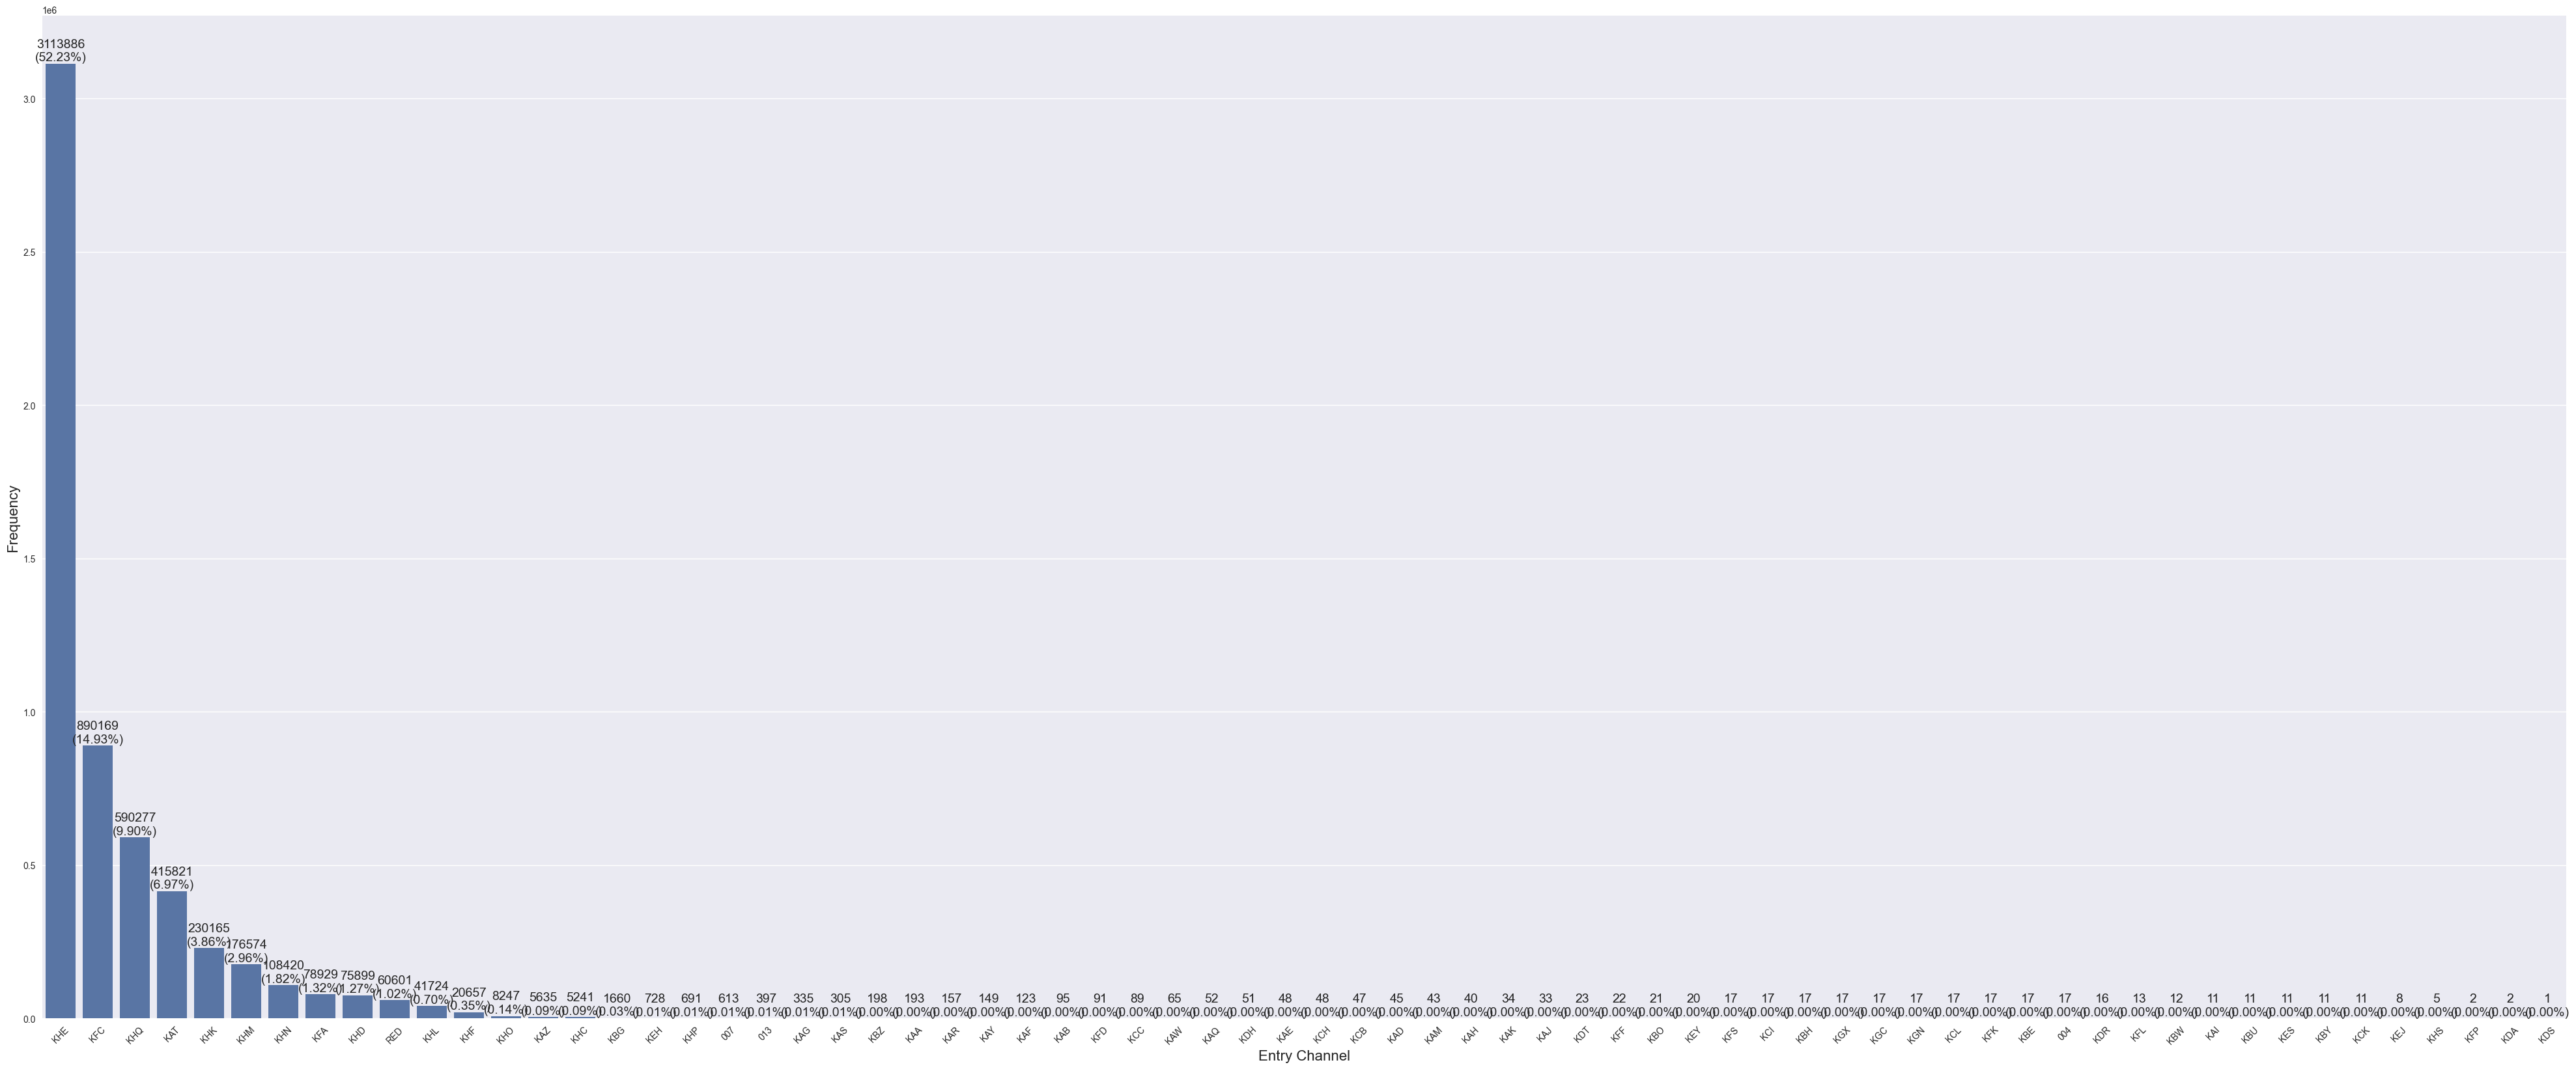

In [507]:
# Plotting them in a barchart
plt.figure(figsize=(50, 20))
ax = sns.countplot(data=entry_channel_df, x='entry_channel', order=unique_entry_channel_freq.index)
plt.xlabel('Entry Channel', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(rotation=45)

# Annotate bars with frequencies and percentages
for i, (freq, percent) in enumerate(zip(unique_entry_channel_freq, entry_channel_percentage)):
    ax.text(i, freq + 1, f"{freq}\n({percent:.2f}%)", ha='center', va='bottom', fontsize=14)

plt.show()


In [508]:
# Calculate frequency and percentage of each entry channel
frequency_table = pd.DataFrame({'Frequency': unique_entry_channel_freq, 'Percentage': (unique_entry_channel_freq / total_subscribers) * 100})
display(frequency_table)
display(frequency_table.index.unique())

,Frequency,Percentage
entry_channel,,
KHE,3113886,52.229076
KFC,890169,14.930766
KHQ,590277,9.900691
KAT,415821,6.974548
KHK,230165,3.860548
...,...,...
KEJ,8,0.000134
KHS,5,0.000084
KFP,2,0.000034


Index(['KHE', 'KFC', 'KHQ', 'KAT', 'KHK', 'KHM', 'KHN', 'KFA', 'KHD', 'RED',
       'KHL', 'KHF', 'KHO', 'KAZ', 'KHC', 'KBG', 'KEH', 'KHP', '007', '013',
       'KAG', 'KAS', 'KBZ', 'KAA', 'KAR', 'KAY', 'KAF', 'KAB', 'KFD', 'KCC',
       'KAW', 'KAQ', 'KDH', 'KAE', 'KCH', 'KCB', 'KAD', 'KAM', 'KAH', 'KAK',
       'KAJ', 'KDT', 'KFF', 'KBO', 'KEY', 'KFS', 'KCI', 'KBH', 'KGX', 'KGC',
       'KGN', 'KCL', 'KFK', 'KBE', '004', 'KDR', 'KFL', 'KBW', 'KAI', 'KBU',
       'KES', 'KBY', 'KCK', 'KEJ', 'KHS', 'KFP', 'KDA', 'KDS'],
      dtype='object', name='entry_channel')

we can see that the first 5 channels hold most of the data around 84% so I am going to group the rest into others. 

In [509]:
# Calculate the total percentage of entry channels with frequencies less than 3%
percentage_threshold = 3
low_frequency_channels = frequency_table[frequency_table['Percentage'] < percentage_threshold].index

# Update the entry channels in merged_all_three to 'Others'
merged_all_three.loc[merged_all_three['entry_channel'].isin(low_frequency_channels), 'entry_channel'] = 'Others'


In [510]:
merged_all_three[merged_all_three['entry_channel']=='Others'].T

pk_partition,2018-01-28,2018-02-28,2018-03-28,2018-04-28,2018-05-28,2018-06-28,2018-07-28,2018-08-28,2018-09-28,2018-10-28,...,2018-08-28,2018-09-28,2018-10-28,2018-11-28,2018-12-28,2019-01-28,2019-02-28,2019-03-28,2019-04-28,2019-05-28
pk_cid,1000028,1000028,1000028,1000028,1000028,1000028,1000028,1000028,1000028,1000028,...,999892,999892,999892,999892,999892,999892,999892,999892,999892,999892
short_term_deposit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
loans,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mortgage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
funds,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
securities,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
long_term_deposit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
em_account_pp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
credit_card,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
payroll,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [511]:
# Recalculate the frequency table based on the updated 'merged_all_three' DataFrame

# Calculate frequency and percentage of each entry channel
frequency_table_updated = pd.DataFrame({'Frequency': unique_entry_channel_freq, 'Percentage': (unique_entry_channel_freq / total_subscribers) * 100})
display(frequency_table)

,Frequency,Percentage
entry_channel,,
KHE,3113886,52.229076
KFC,890169,14.930766
KHQ,590277,9.900691
KAT,415821,6.974548
KHK,230165,3.860548
...,...,...
KEJ,8,0.000134
KHS,5,0.000084
KFP,2,0.000034


In [512]:
entry_channel_df=merged_all_three['entry_channel']
unique_entry_channels=merged_all_three['entry_channel'].unique()
unique_entry_channel_freq= merged_all_three['entry_channel'].value_counts()
display(entry_channel_df)
display(unique_entry_channels)
display(unique_entry_channel_freq)

pk_partition
2018-01-28    Others
2018-02-28    Others
2018-03-28    Others
2018-04-28    Others
2018-05-28    Others
               ...  
2019-01-28    Others
2019-02-28    Others
2019-03-28    Others
2019-04-28    Others
2019-05-28    Others
Name: entry_channel, Length: 5961978, dtype: object

array(['Others', 'KAT', 'KFC', 'KHE', 'Unknown', 'KHK', 'KHQ'],
      dtype=object)

entry_channel
KHE        3113886
KFC         890169
KHQ         590277
Others      588627
KAT         415821
KHK         230165
Unknown     133033
Name: count, dtype: int64

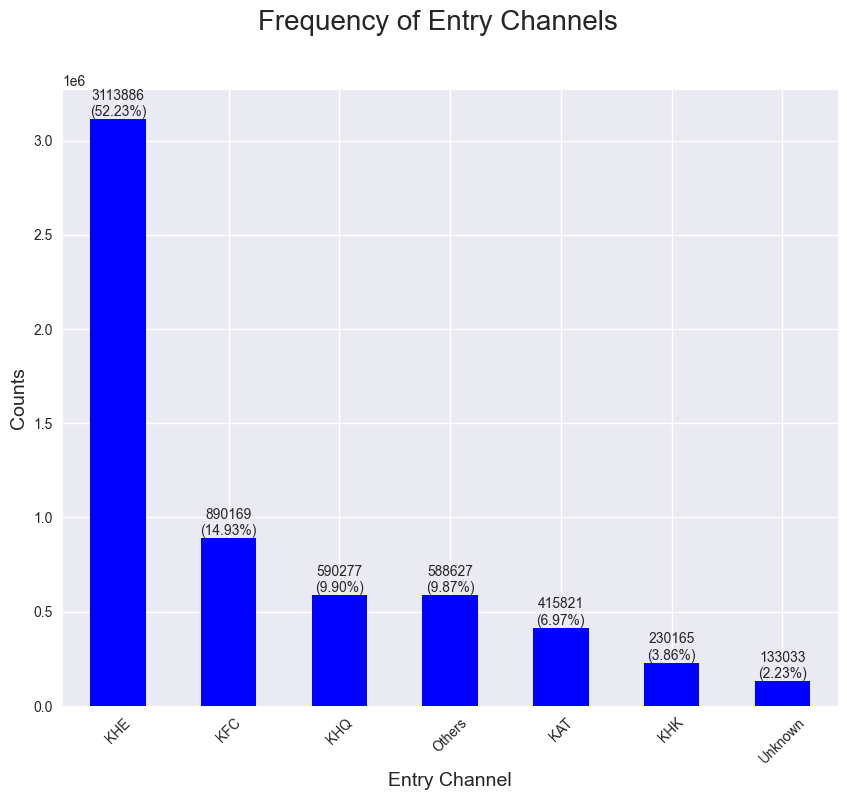

In [513]:


# Calculate the total count
total_count = unique_entry_channel_freq.sum()

# Calculate the percentage for each entry channel
percentage = (unique_entry_channel_freq / total_count) * 100

# Plotting a bar chart
plt.figure(figsize=(10, 8))
ax = unique_entry_channel_freq.plot(kind='bar', color='blue')

# Annotate bars with counts and percentages
for i, count in enumerate(unique_entry_channel_freq):
    percent = percentage.iloc[i]
    ax.text(i, count, f"{count}\n({percent:.2f}%)", ha='center', va='bottom', fontsize=10)

# Setting labels and title
plt.suptitle('Frequency of Entry Channels', fontsize=20)
plt.xlabel('Entry Channel', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=45)
plt.show()

We can observe from the bar chart that the majority of customers were acquired through the KHE channel, accounting for 52% of all entries. This is followed by the KFC channel, which contributed to 15% of the entries. Additionally, the KHQ channel accounted for 10% of the entries, while the remaining entry channels collectively contributed to 10% of the entries, labeled as 'Others' in the chart. The KAT channel acquired 7% of the customers, whereas the KHK channel accounted for 4% of the entries. The percentage of customers acquired through unknown entry channels is relatively low at 2.23%. Overall, the analysis highlights the importance of monitoring and optimizing entry channels to maximize customer acquisition efforts effectively. It's crucial to continuously evaluate channel performance, invest resources where they yield the highest returns, and adapt strategies to capitalize on emerging opportunities.

No let´s encode them and aggregate them in monthly aggregated time series datafram.

In [514]:
merged_all_three['entry_channel'].unique()

array(['Others', 'KAT', 'KFC', 'KHE', 'Unknown', 'KHK', 'KHQ'],
      dtype=object)

In [515]:
# Perform binary encoding with three columns
encoded_entry_channel = pd.get_dummies(merged_all_three['entry_channel'])

# Concatenate the encoded columns with the original DataFrame
merged_all_three = pd.concat([merged_all_three, encoded_entry_channel], axis=1)

# Display the DataFrame with binary encoded customer_type
merged_all_three[['pk_cid', 'entry_date', 'entry_channel', 'KHE', 'KFC', 'KHQ','KAT','KHK','Others','Unknown']]

,pk_cid,entry_date,entry_channel,KHE,KFC,KHQ,KAT,KHK,Others,Unknown
pk_partition,,,,,,,,,,
2018-01-28,1000028,2017-01-03,Others,False,False,False,False,False,True,False
2018-02-28,1000028,2017-01-03,Others,False,False,False,False,False,True,False
2018-03-28,1000028,2017-01-03,Others,False,False,False,False,False,True,False
2018-04-28,1000028,2017-01-03,Others,False,False,False,False,False,True,False
2018-05-28,1000028,2017-01-03,Others,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
2019-01-28,999892,2017-03-27,Others,False,False,False,False,False,True,False
2019-02-28,999892,2017-03-27,Others,False,False,False,False,False,True,False
2019-03-28,999892,2017-03-27,Others,False,False,False,False,False,True,False


In [516]:
merged_all_three.tail(30)

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,Loyal Customer,New Customer,Regular Customer,KAT,KFC,KHE,KHK,KHQ,Others,Unknown
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-05-28,999835,0,0,0,1,0,1,0,0,0.0,...,True,False,False,True,False,False,False,False,False,False
2018-06-28,999835,0,0,0,1,0,1,0,0,0.0,...,True,False,False,True,False,False,False,False,False,False
2018-07-28,999835,0,0,0,1,0,1,0,0,0.0,...,True,False,False,True,False,False,False,False,False,False
2018-08-28,999835,0,0,0,1,0,1,0,0,0.0,...,True,False,False,True,False,False,False,False,False,False
2018-09-28,999835,0,0,0,1,0,1,0,0,0.0,...,True,False,False,True,False,False,False,False,False,False
2018-10-28,999835,0,0,0,1,0,1,0,0,0.0,...,True,False,False,True,False,False,False,False,False,False
2018-11-28,999835,0,0,0,1,0,1,0,0,0.0,...,True,False,False,True,False,False,False,False,False,False
2018-12-28,999835,0,0,0,1,0,1,0,0,0.0,...,True,False,False,True,False,False,False,False,False,False
2019-01-28,999835,0,0,0,1,0,1,0,0,0.0,...,True,False,False,True,False,False,False,False,False,False


In [517]:
# Assuming merged_all_three is your DataFrame containing the data
merged_all_three.drop('entry_channel', axis=1, inplace=True)

In [518]:
merged_all_three.columns

Index(['pk_cid', 'short_term_deposit', 'loans', 'mortgage', 'funds',
       'securities', 'long_term_deposit', 'em_account_pp', 'credit_card',
       'payroll', 'pension_plan', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_acount', 'entry_date',
       'active_customer', 'segment', 'country_id', 'region_code', 'gender',
       'age', 'deceased', 'salary', 'New Monthly Subscribers',
       'prev_partition', 'Loyal Customer', 'New Customer', 'Regular Customer',
       'KAT', 'KFC', 'KHE', 'KHK', 'KHQ', 'Others', 'Unknown'],
      dtype='object')

In [519]:
# Calculate active users per partition (index) aggregated on count
KAT_per_partition= merged_all_three.groupby('pk_partition')['KAT'].sum()
KFC_per_partition= merged_all_three.groupby('pk_partition')['KFC'].sum()
KHE_per_partition= merged_all_three.groupby('pk_partition')['KHE'].sum()
KHK_per_partition= merged_all_three.groupby('pk_partition')['KHK'].sum()
KHQ_per_partition= merged_all_three.groupby('pk_partition')['KHQ'].sum()
Others_per_partition= merged_all_three.groupby('pk_partition')['Others'].sum()
Unknown_per_partition= merged_all_three.groupby('pk_partition')['Unknown'].sum()
# Add the calculated active users as a new column to monthly_aggregated dataframe
monthly_aggregated['KAT'] = KAT_per_partition
monthly_aggregated['KFC'] = KFC_per_partition
monthly_aggregated['KHE'] = KHE_per_partition
monthly_aggregated['KHK'] = KHK_per_partition
monthly_aggregated['KHQ'] = KHQ_per_partition
monthly_aggregated['Others'] = Others_per_partition
monthly_aggregated['Unknown'] = Unknown_per_partition

In [520]:
monthly_aggregated

,Total_Short_Term_Deposit,deceased,Total_Subscribers,Active_Customers,New Monthly Subscribers,Unsubscribed,Loyal Customer,New Customer,Regular Customer,KAT,KFC,KHE,KHK,KHQ,Others,Unknown
pk_partition,,,,,,,,,,,,,,,,
2018-01-28,883,47,239446,108211,2590,0,84767,0,154726,20926,40170,160717,5236,0,12426,18
2018-02-28,1343,0,242474,111048,2720,47,84708,0,157766,20989,40126,160686,7263,0,13395,15
2018-03-28,1664,0,245211,113769,2143,0,84658,0,160553,21052,40114,160563,8865,1,14601,15
2018-04-28,1740,0,247417,116281,2090,0,84577,0,162840,21050,40095,160447,10221,1,15591,12
2018-05-28,1455,1,249879,119029,2214,0,84554,0,165326,21093,40103,160330,11203,1,17139,11
2018-06-28,1244,0,252059,121524,1925,1,84514,1872,165673,21092,40086,160223,11281,1,19368,8
2018-07-28,1282,7,339284,129250,14091,0,103583,19950,215758,26307,59202,196631,16072,1,24298,16780
2018-08-28,1335,5,352865,136319,16973,961,103462,34067,215341,26272,59155,196377,15991,12844,27783,14448
2018-09-28,1386,10,375259,144753,21416,920,103382,56827,215060,26304,59117,196164,15941,23234,31273,23236


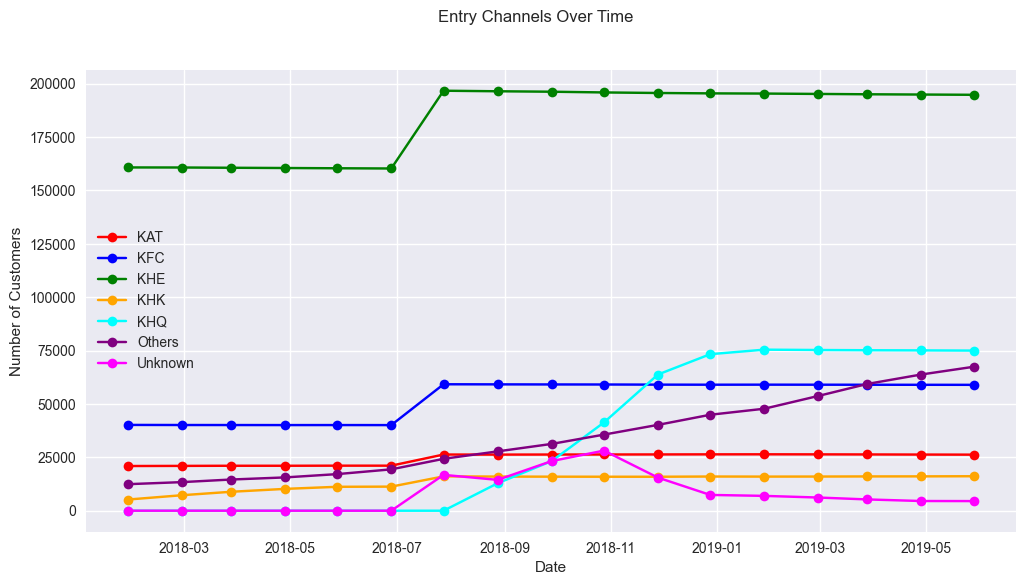

In [521]:
# Plot the three types of subscribers over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_aggregated.index, monthly_aggregated['KAT'] , marker='o', linestyle='-', label='KAT', color='red')
plt.plot(monthly_aggregated.index, monthly_aggregated['KFC'], marker='o', linestyle='-', label='KFC', color='blue')
plt.plot(monthly_aggregated.index, monthly_aggregated['KHE'], marker='o', linestyle='-', label='KHE', color='green')
plt.plot(monthly_aggregated.index, monthly_aggregated['KHK'], marker='o', linestyle='-', label='KHK', color='orange')
plt.plot(monthly_aggregated.index, monthly_aggregated['KHQ'], marker='o', linestyle='-', label='KHQ', color='cyan')
plt.plot(monthly_aggregated.index, monthly_aggregated['Others'], marker='o', linestyle='-', label='Others', color='purple')
plt.plot(monthly_aggregated.index, monthly_aggregated['Unknown'], marker='o', linestyle='-', label='Unknown', color='magenta')
plt.suptitle('Entry Channels Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True)
plt.show()



Based on the analysis of the data represented in the seven charts:

The majority of subscribers entered from the KHE channel, with 160,717 subscribers at the beginning, followed by the KFC channel with 40,170 subscribers, and the KAT channel with 20,926 subscribers. The Others channel had 12,426 subscribers, and the KHK channel had 5,236 subscribers. Unknown channels and Others channel don't have entries until July and August, respectively.

KHE, KFC, KAT, and Unknown channels experienced jumps in the number of subscribers in July and then remained flat from August onwards. Since all subscribers appear in each batch, this suggests that new subscribers are likely coming from other channels.

The number of subscribers from other channels increased steadily until the end of May 2019, from 12,426 to 67,383, surpassing the number of subscribers from the KFC channel from April to the end of May 2019.

The Unknown channel saw an increase from July 2018 to August 2018, with a slight decrease in August and then another increase until November 2018. It surpassed the subscribers from the KHK channel in September 2018 and reached KAT subscribers by November 2018, then decreased to 4,509 subscribers by the end of May 2019.

Subscribers from the KHQ channel increased from August 2018 to January 2019, after which they remained relatively flat from January 2019 onwards.


In [522]:
merged_all_three.columns

Index(['pk_cid', 'short_term_deposit', 'loans', 'mortgage', 'funds',
       'securities', 'long_term_deposit', 'em_account_pp', 'credit_card',
       'payroll', 'pension_plan', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_acount', 'entry_date',
       'active_customer', 'segment', 'country_id', 'region_code', 'gender',
       'age', 'deceased', 'salary', 'New Monthly Subscribers',
       'prev_partition', 'Loyal Customer', 'New Customer', 'Regular Customer',
       'KAT', 'KFC', 'KHE', 'KHK', 'KHQ', 'Others', 'Unknown'],
      dtype='object')

In [523]:
monthly_aggregated.columns

Index(['Total_Short_Term_Deposit', 'deceased', 'Total_Subscribers',
       'Active_Customers', 'New Monthly Subscribers', 'Unsubscribed',
       'Loyal Customer', 'New Customer', 'Regular Customer', 'KAT', 'KFC',
       'KHE', 'KHK', 'KHQ', 'Others', 'Unknown'],
      dtype='object')

In [524]:
# Define a dictionary with the old and new column names
column_name_mapping = {
    'KAT': 'Entry_Channel_KAT',
    'KFC': 'Entry_Channel_KFC',
    'KHE': 'Entry_Channel_KHE',
    'KHK': 'Entry_Channel_KHK',
    'KHQ': 'Entry_Channel_KHQ',
    'Others': 'Entry_Channel_Others',
    'Unknown': 'Entry_Channel_Unknown',

}

# Rename the columns using the dictionary
merged_all_three.rename(columns=column_name_mapping, inplace=True)

In [525]:
monthly_aggregated.rename(columns=column_name_mapping, inplace=True)

In [526]:
monthly_aggregated.columns

Index(['Total_Short_Term_Deposit', 'deceased', 'Total_Subscribers',
       'Active_Customers', 'New Monthly Subscribers', 'Unsubscribed',
       'Loyal Customer', 'New Customer', 'Regular Customer',
       'Entry_Channel_KAT', 'Entry_Channel_KFC', 'Entry_Channel_KHE',
       'Entry_Channel_KHK', 'Entry_Channel_KHQ', 'Entry_Channel_Others',
       'Entry_Channel_Unknown'],
      dtype='object')

In [527]:
merged_all_three.columns

Index(['pk_cid', 'short_term_deposit', 'loans', 'mortgage', 'funds',
       'securities', 'long_term_deposit', 'em_account_pp', 'credit_card',
       'payroll', 'pension_plan', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_acount', 'entry_date',
       'active_customer', 'segment', 'country_id', 'region_code', 'gender',
       'age', 'deceased', 'salary', 'New Monthly Subscribers',
       'prev_partition', 'Loyal Customer', 'New Customer', 'Regular Customer',
       'Entry_Channel_KAT', 'Entry_Channel_KFC', 'Entry_Channel_KHE',
       'Entry_Channel_KHK', 'Entry_Channel_KHQ', 'Entry_Channel_Others',
       'Entry_Channel_Unknown'],
      dtype='object')

----
1. first commercial activtiy

[ * ] entry_date

[ * ] entry_channel

Next is:

[  ] segment

----

#### **Segment**

In [528]:
merged_all_three['segment'].info(verbose=True, memory_usage='deep')

<class 'pandas.core.series.Series'>
DatetimeIndex: 5961978 entries, 2018-01-28 to 2019-05-28
Series name: segment
Non-Null Count    Dtype 
--------------    ----- 
5828034 non-null  object
dtypes: object(1)
memory usage: 463.7 MB


We have null values in segment column. First I am going to see what are the values for this column then I am going to see the distribution and then see if we can replace the missing values or we can postpone it to later in multivariate analysis. Based on data dictionary segment is Customer business segment.

In [529]:
merged_all_three['segment'].unique()

array(['02 - PARTICULARES', '03 - UNIVERSITARIO', nan, '01 - TOP'],
      dtype=object)

For now I think it is most logical to put nan to Unknown segment as we did for other missing values

In [530]:
# Fill NaN values in 'segment' column with 'Unknown'
merged_all_three['segment'].fillna('Unknown', inplace=True)

In [531]:
merged_all_three['segment'].info(verbose=True, memory_usage='deep')

<class 'pandas.core.series.Series'>
DatetimeIndex: 5961978 entries, 2018-01-28 to 2019-05-28
Series name: segment
Non-Null Count    Dtype 
--------------    ----- 
5961978 non-null  object
dtypes: object(1)
memory usage: 467.8 MB


In [532]:
merged_all_three['segment'].unique()

array(['02 - PARTICULARES', '03 - UNIVERSITARIO', 'Unknown', '01 - TOP'],
      dtype=object)

We can see from info (datetime entries and non-null are both 5961978) and the unique segments (no nan) that we don't have any missing value and they are all replaced by Unknown. Let's see  the distribution:

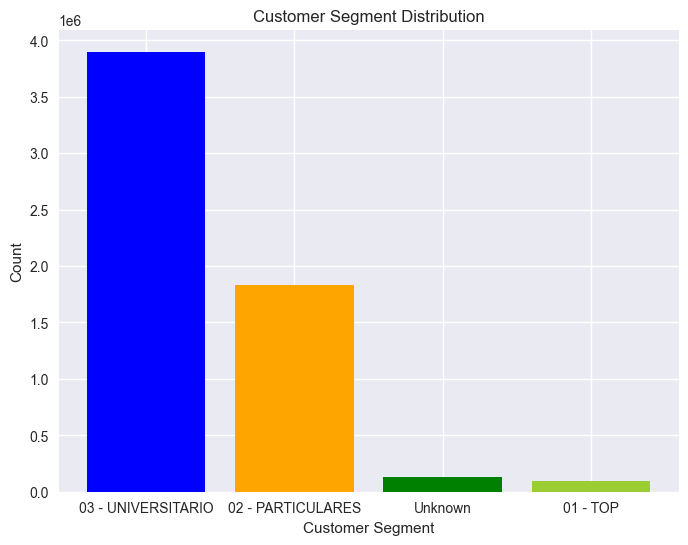

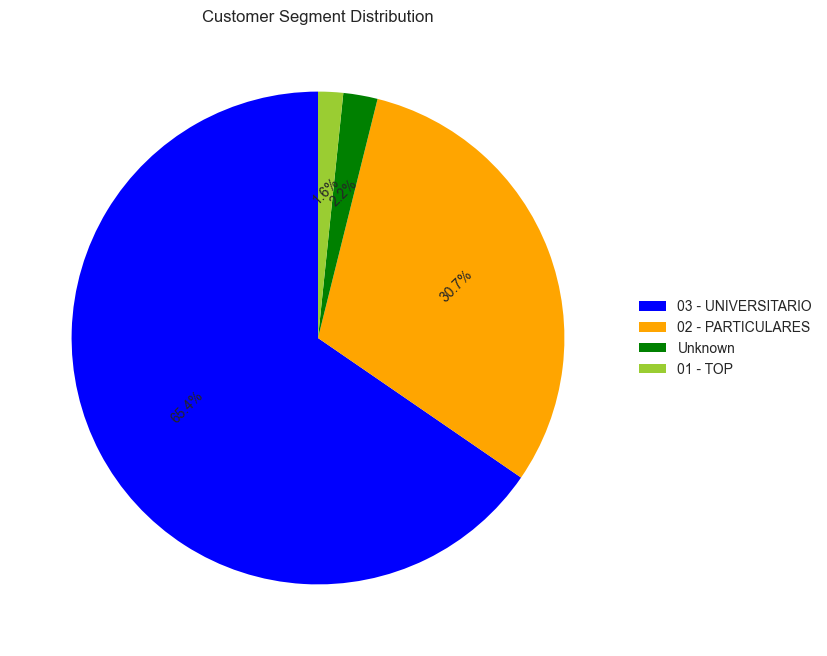

In [533]:
# Calculate the frequency of each customer type
customer_segment_counts = merged_all_three['segment'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(customer_segment_counts.index, customer_segment_counts.values, color=['blue', 'orange', 'green','yellowgreen'])
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.title('Customer Segment Distribution')
plt.show()
# pie chart
labels = customer_segment_counts.index
sizes = customer_segment_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(sizes, labels=None, startangle=90, colors=['blue', 'orange', 'green','yellowgreen'], autopct='%1.1f%%')

# Set custom labels
plt.legend(wedges, labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Incline the percentages by 45 degrees
for autotext in autotexts:
    autotext.set_rotation(45)

plt.title('Customer Segment Distribution')
plt.show()

We observe that the majority of our customer base falls within the Universario segment, denoting a strong presence of university-related activities, services, or affiliations, encompassing university students, professors, and related events. This segment constitutes a substantial portion, comprising 65.4% of our clientele. Following Universario, the Particulares segment, representing private individuals or entities, constitutes 23.1% of our customer base. Notably, the Unknown and Top segments collectively comprise a smaller portion, accounting for 2.2% and 1.6% of subscribers, respectively.

Based on the current segmentation analysis, I would recommend focusing further efforts on understanding and catering to the needs of the Universario and Particulares segments, which collectively represent the vast majority of our customer base. This could involve tailoring marketing campaigns, products, and services to better meet the preferences and requirements of university-affiliated individuals and private clients. Additionally, exploring strategies to better engage and attract customers in the Unknown and Top segments could be beneficial, as they represent potential growth opportunities despite their smaller current share. Conducting targeted research and outreach efforts to gain insights into the needs and preferences of these segments could inform more effective marketing and service delivery strategies.


In [534]:
# Perform binary encoding with three columns
encoded_customer_segments = pd.get_dummies(merged_all_three['segment'])

# Concatenate the encoded columns with the original DataFrame
merged_all_three = pd.concat([merged_all_three, encoded_customer_segments], axis=1)

# Display the DataFrame with binary encoded customer_type
merged_all_three[['pk_cid','02 - PARTICULARES', '03 - UNIVERSITARIO', 'Unknown', '01 - TOP']]

,pk_cid,02 - PARTICULARES,03 - UNIVERSITARIO,Unknown,01 - TOP
pk_partition,,,,,
2018-01-28,1000028,True,False,False,False
2018-02-28,1000028,True,False,False,False
2018-03-28,1000028,True,False,False,False
2018-04-28,1000028,True,False,False,False
2018-05-28,1000028,True,False,False,False
...,...,...,...,...,...
2019-01-28,999892,False,False,False,True
2019-02-28,999892,False,False,False,True
2019-03-28,999892,False,False,False,True


In [535]:
merged_all_three[['segment']].drop(columns=['segment'])

""
pk_partition
2018-01-28
2018-02-28
2018-03-28
2018-04-28
2018-05-28
...
2019-01-28
2019-02-28
2019-03-28


In [536]:
merged_all_three[['pk_cid','02 - PARTICULARES', '03 - UNIVERSITARIO', 'Unknown', '01 - TOP']]

,pk_cid,02 - PARTICULARES,03 - UNIVERSITARIO,Unknown,01 - TOP
pk_partition,,,,,
2018-01-28,1000028,True,False,False,False
2018-02-28,1000028,True,False,False,False
2018-03-28,1000028,True,False,False,False
2018-04-28,1000028,True,False,False,False
2018-05-28,1000028,True,False,False,False
...,...,...,...,...,...
2019-01-28,999892,False,False,False,True
2019-02-28,999892,False,False,False,True
2019-03-28,999892,False,False,False,True


In [537]:

merged_all_three.rename(columns={'Unknown': 'Unknown Segment'}, inplace=True)
monthly_aggregated.rename(columns={'PARTICULARES': '02 - PARTICULARES'}, inplace=True)

In [538]:
# Calculate active users per partition (index) aggregated on count
particulares_per_partition= merged_all_three.groupby('pk_partition')['02 - PARTICULARES'].sum()
universario_per_partition= merged_all_three.groupby('pk_partition')['03 - UNIVERSITARIO'].sum()
unknown_segment_per_partition= merged_all_three.groupby('pk_partition')['Unknown Segment'].sum()
Top_Segment_per_partition= merged_all_three.groupby('pk_partition')['01 - TOP'].sum()

# Add the calculated active users as a new column to monthly_aggregated dataframe
monthly_aggregated['02 - PARTICULARES'] = particulares_per_partition
monthly_aggregated['03 - UNIVERSITARIO'] = universario_per_partition
monthly_aggregated['Unknown Segment'] = unknown_segment_per_partition
monthly_aggregated['01 - TOP'] = Top_Segment_per_partition


In [539]:
monthly_aggregated

,Total_Short_Term_Deposit,deceased,Total_Subscribers,Active_Customers,New Monthly Subscribers,Unsubscribed,Loyal Customer,New Customer,Regular Customer,Entry_Channel_KAT,Entry_Channel_KFC,Entry_Channel_KHE,Entry_Channel_KHK,Entry_Channel_KHQ,Entry_Channel_Others,Entry_Channel_Unknown,02 - PARTICULARES,03 - UNIVERSITARIO,Unknown Segment,01 - TOP
pk_partition,,,,,,,,,,,,,,,,,,,,
2018-01-28,883,47,239446,108211,2590,0,84767,0,154726,20926,40170,160717,5236,0,12426,18,65722,169792,28,3951
2018-02-28,1343,0,242474,111048,2720,47,84708,0,157766,20989,40126,160686,7263,0,13395,15,68176,170061,26,4211
2018-03-28,1664,0,245211,113769,2143,0,84658,0,160553,21052,40114,160563,8865,1,14601,15,70412,170258,23,4518
2018-04-28,1740,0,247417,116281,2090,0,84577,0,162840,21050,40095,160447,10221,1,15591,12,72208,170393,9,4807
2018-05-28,1455,1,249879,119029,2214,0,84554,0,165326,21093,40103,160330,11203,1,17139,11,74202,170548,8,5122
2018-06-28,1244,0,252059,121524,1925,1,84514,1872,165673,21092,40086,160223,11281,1,19368,8,76078,170667,0,5314
2018-07-28,1282,7,339284,129250,14091,0,103583,19950,215758,26307,59202,196631,16072,1,24298,16780,108142,208932,16850,5367
2018-08-28,1335,5,352865,136319,16973,961,103462,34067,215341,26272,59155,196377,15991,12844,27783,14448,112628,220172,14507,5563
2018-09-28,1386,10,375259,144753,21416,920,103382,56827,215060,26304,59117,196164,15941,23234,31273,23236,116506,229673,23338,5752


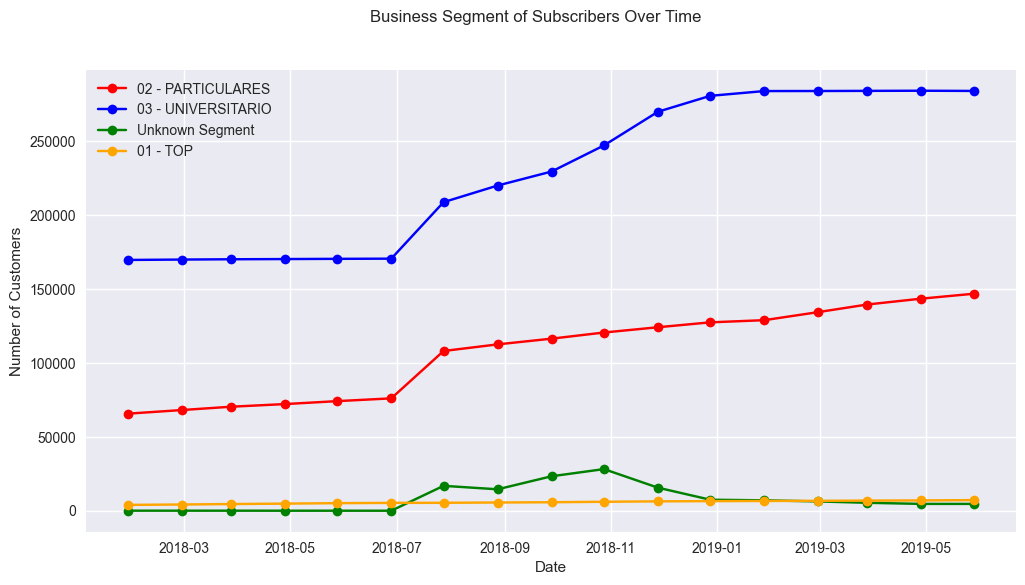

In [540]:
# Plot the three types of subscribers over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_aggregated.index, monthly_aggregated['02 - PARTICULARES'] , marker='o', linestyle='-', label='02 - PARTICULARES', color='red')
plt.plot(monthly_aggregated.index, monthly_aggregated['03 - UNIVERSITARIO'], marker='o', linestyle='-', label='03 - UNIVERSITARIO', color='blue')
plt.plot(monthly_aggregated.index, monthly_aggregated['Unknown Segment'], marker='o', linestyle='-', label='Unknown Segment', color='green')
plt.plot(monthly_aggregated.index, monthly_aggregated['01 - TOP'], marker='o', linestyle='-', label='01 - TOP', color='orange')

plt.suptitle('Business Segment of Subscribers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True)
plt.show()



We observe a consistent pattern across subscriber segments. With the exception of the Top segment, all segments experience a surge in subscribers starting from July 2018. The Top segment maintains a relatively stable subscriber count throughout the observed period. The Unknown Segment initially registers at less than 10 subscribers (with 0 subscribers on June 2018) but witnesses a significant increase in July 2017, surpassing the Top segment until November 2018. However, its subscriber count declines thereafter, falling below that of the Top segment by May 2019. Both Particulares and Universario segments demonstrate an upward trend from July 2018 onwards. Universario segment appears to plateau around 284,200 subscribers, while the Particulares segment continues to grow steadily without reaching a plateau by the end of the timeframe.

**Mid-term Wrap up**

For now we analyzed the following:

    [ * ] pk_cid

    [ * ] pk_partition

    [ * ] short_term_deposit

    [ * ] active_customer

    [ * ] deceased

Added Features (Feature Engineering)

    [ * ]New Subscriber

    [ * ] unsubscribe

1. first commercial activtiy

[ * ] entry_date

[ * ] entry_channel

[ * ] segment

----
Now we are going to focus on sociodemographic columns

2. next sociodemographic columns

[  ] country_id

[  ] region_code

[  ] gender

[  ] age

[  ] salary



#### Country_id

In [541]:
merged_all_three['country_id'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 5961978 entries, 2018-01-28 to 2019-05-28
Series name: country_id
Non-Null Count    Dtype 
--------------    ----- 
5961978 non-null  object
dtypes: object(1)
memory usage: 91.0+ MB


So we don't have any nan values. Let's see the unique values.

In [542]:
merged_all_three['country_id'].unique()

array(['ES', 'FR', 'GT', 'GA', 'CO', 'BR', 'RU', 'MA', 'AR', 'IT', 'CH',
       'NO', 'PL', 'BE', 'DE', 'MX', 'SN', 'MR', 'GB', 'CL', 'IE', 'CA',
       'US', 'AT', 'VE', 'SE', 'DO', 'QA', 'DJ', 'CN', 'LU', 'RO', 'PT',
       'CM', 'ET', 'SA', 'CI', 'HU', 'PE', 'JM', 'DZ'], dtype=object)

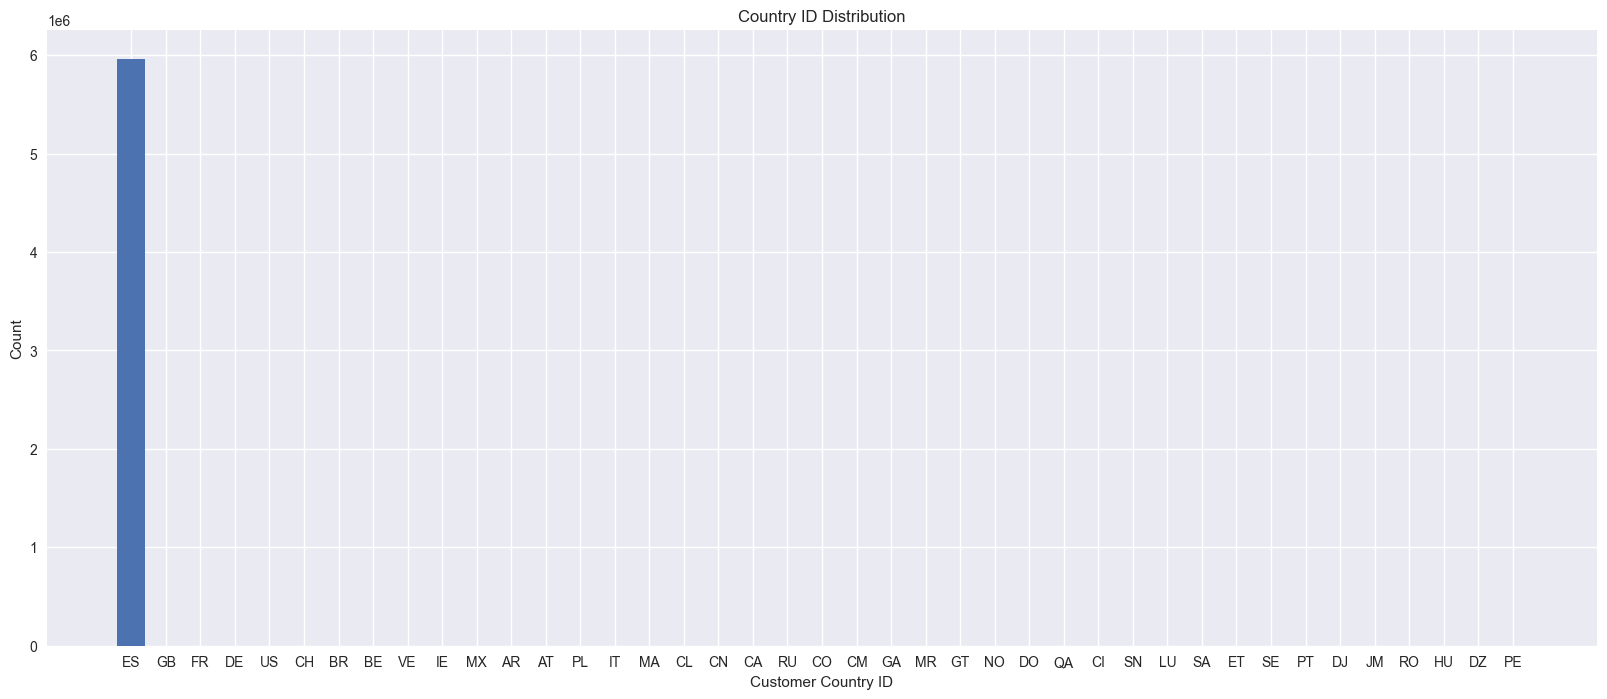

In [543]:

customer_country_id_counts = merged_all_three['country_id'].value_counts()

# Create a bar chart
plt.figure(figsize=(20, 8))
plt.bar(customer_country_id_counts.index, customer_country_id_counts.values)
plt.xlabel('Customer Country ID')
plt.ylabel('Count')
plt.title('Country ID Distribution')
plt.show()


In [544]:
customer_country_id_counts

country_id
ES    5959730
GB        441
FR        225
DE        199
US        195
CH        190
BR         87
BE         81
VE         79
IE         68
MX         58
AR         51
AT         51
PL         49
IT         45
MA         34
CL         30
CN         28
CA         22
RU         17
CO         17
CM         17
GA         17
MR         17
GT         17
NO         17
DO         17
QA         17
CI         17
SN         17
LU         17
SA         17
ET         17
SE         16
PT         11
DJ         11
JM         11
RO          9
HU          8
DZ          7
PE          4
Name: count, dtype: int64

In [545]:
# Convert the dictionary to a pandas DataFrame
country_id_df = pd.DataFrame(customer_country_id_counts.items(), columns=['Country_ID', 'Count'])

# Aggregate all countries except Spain into "Other_countries"
other_countries_count = country_id_df.loc[country_id_df['Country_ID'] != 'ES', 'Count'].sum()

# Add Spain and the aggregated count to the DataFrame
aggregated_country_df = pd.DataFrame({'Country_ID': ['ES', 'Other_countries'], 'Count': [customer_country_id_counts['ES'], other_countries_count]})

# Calculate the percentage for each country
aggregated_country_df['Percentage'] = (aggregated_country_df['Count'] / aggregated_country_df['Count'].sum()) * 100

# Print the aggregated country counts DataFrame
print(aggregated_country_df)

        Country_ID    Count  Percentage
0               ES  5959730   99.962294
1  Other_countries     2248    0.037706


As 99.96% of the subscribers are from spain this column doesnt add much variety to the analysis so I am going to remove it, but first I am going to analyze the region_code then I am going to drop.

In [546]:
# Drop the 'country_id' column from the DataFrame
# merged_all_three.drop('country_id', axis=1, inplace=True)

In [547]:
merged_all_three.columns

Index(['pk_cid', 'short_term_deposit', 'loans', 'mortgage', 'funds',
       'securities', 'long_term_deposit', 'em_account_pp', 'credit_card',
       'payroll', 'pension_plan', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_acount', 'entry_date',
       'active_customer', 'segment', 'country_id', 'region_code', 'gender',
       'age', 'deceased', 'salary', 'New Monthly Subscribers',
       'prev_partition', 'Loyal Customer', 'New Customer', 'Regular Customer',
       'Entry_Channel_KAT', 'Entry_Channel_KFC', 'Entry_Channel_KHE',
       'Entry_Channel_KHK', 'Entry_Channel_KHQ', 'Entry_Channel_Others',
       'Entry_Channel_Unknown', '01 - TOP', '02 - PARTICULARES',
       '03 - UNIVERSITARIO', 'Unknown Segment'],
      dtype='object')

----
Now we are going to focus on sociodemographic columns

2. next sociodemographic columns

[ * ] country_id

[  ] region_code

[  ] gender

[  ] age

[  ] salary

#### Region_code

Data Dictionary Description:Customer's province of residence (for ES)

In [548]:
merged_all_three['region_code'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 5961978 entries, 2018-01-28 to 2019-05-28
Series name: region_code
Non-Null Count    Dtype  
--------------    -----  
5959718 non-null  float64
dtypes: float64(1)
memory usage: 91.0 MB


We have nulls values which should be taken into consideration. let's see the null numbers and variety of region_code

In [549]:
# Count the null values in the 'region_id' column
null_count = merged_all_three['region_code'].isnull().sum()

print("Null count of region_id:", null_count)

Null count of region_id: 2260


In [550]:
# Filter the DataFrame for rows with null region_code
null_region_df = merged_all_three[merged_all_three['region_code'].isnull()]

# Calculate the percentage of rows with Spain as the country
spain_percentage = (null_region_df['country_id'] == 'ES').mean() * 100

print("Percentage of rows with null region_code having Spain as country:", spain_percentage)
print("Number of rows with null region_code:", len(null_region_df))

# Check if having region_code is useful
# You can analyze the data and see if the region_code provides valuable information. 
# For example, if most of the null region_code rows belong to a specific country,
# and you can derive the region information from other columns, you may not need region_code.
# However, if region_code provides important geographical information, it may be useful to keep it.

Percentage of rows with null region_code having Spain as country: 0.5309734513274336
Number of rows with null region_code: 2260


In [551]:
merged_all_three['region_code'].unique()

array([28., 14., 46., 24., 47., 11.,  8., 16., 29., 27., 41., 15., 32.,
       39., 43.,  6., 17.,  2., 50., 30., 34., 48., 23., 37.,  9., 40.,
       18., 44., 36.,  7.,  4., 33., 19.,  3., 35., 21.,  5.,  1., 20.,
       38., 13., 45., 10., nan, 51., 42., 31., 22., 12., 49., 25., 26.,
       52.])

In [552]:
# Replace null values with '00'
merged_all_three['region_code'].fillna('00', inplace=True)



C:\Users\donna\AppData\Local\Temp\ipykernel_12564\914781475.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_all_three['region_code'].fillna('00', inplace=True)


In [553]:
merged_all_three['region_code'].unique()

array([28.0, 14.0, 46.0, 24.0, 47.0, 11.0, 8.0, 16.0, 29.0, 27.0, 41.0,
       15.0, 32.0, 39.0, 43.0, 6.0, 17.0, 2.0, 50.0, 30.0, 34.0, 48.0,
       23.0, 37.0, 9.0, 40.0, 18.0, 44.0, 36.0, 7.0, 4.0, 33.0, 19.0, 3.0,
       35.0, 21.0, 5.0, 1.0, 20.0, 38.0, 13.0, 45.0, 10.0, '00', 51.0,
       42.0, 31.0, 22.0, 12.0, 49.0, 25.0, 26.0, 52.0], dtype=object)

In [554]:
# Convert region_id to integers
merged_all_three['region_code'] = merged_all_three['region_code'].astype(int)

# Convert region_id to strings
merged_all_three['region_code'] = merged_all_three['region_code'].astype(str)
merged_all_three['region_code'].unique()
#customer_country_id_counts = merged_all_three['region_code'].value_counts()

array(['28', '14', '46', '24', '47', '11', '8', '16', '29', '27', '41',
       '15', '32', '39', '43', '6', '17', '2', '50', '30', '34', '48',
       '23', '37', '9', '40', '18', '44', '36', '7', '4', '33', '19', '3',
       '35', '21', '5', '1', '20', '38', '13', '45', '10', '0', '51',
       '42', '31', '22', '12', '49', '25', '26', '52'], dtype=object)

In [555]:
customer_region_code_counts = merged_all_three['region_code'].value_counts()
customer_region_code_counts

region_code
28    1185438
8      600275
46     358091
30     296817
41     290395
15     254872
29     187892
36     175844
3      171349
11     160870
33     134546
50     132967
6      122587
35     121979
47     116923
18     102749
45     102310
37      92525
10      83267
14      75405
2       72071
21      72037
13      70092
39      69579
12      68709
7       62436
32      54639
27      52765
43      51775
17      50749
9       47725
25      46887
16      36094
24      35426
48      35221
26      34790
4       32680
31      31241
49      30965
23      30941
38      28986
34      27545
19      26744
40      21640
5       21300
22      21112
20      18833
1       12985
44      12616
42       8500
51       2896
52       2638
0        2260
Name: count, dtype: int64

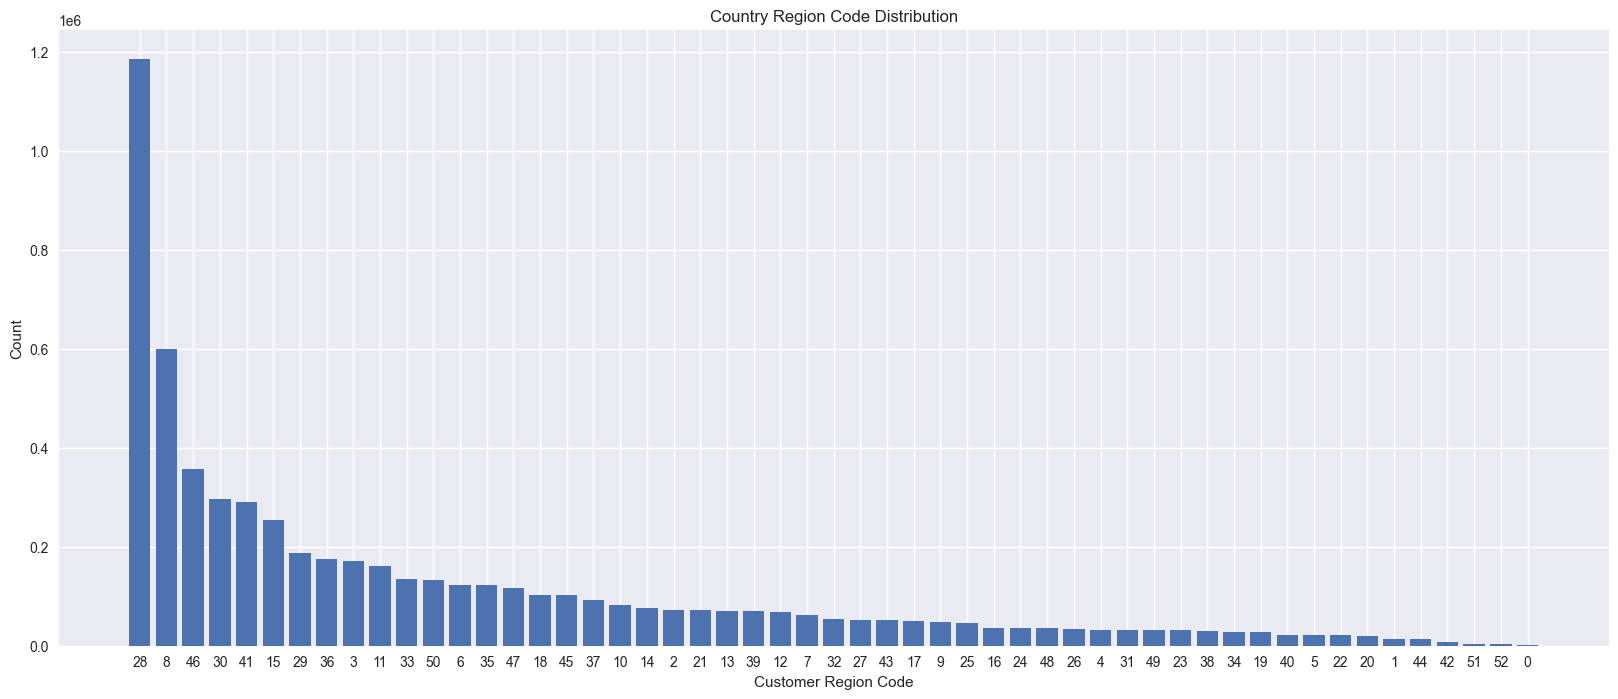

In [556]:

# Create a bar chart
plt.figure(figsize=(20, 8))  # Reduced figure size
plt.bar(customer_region_code_counts.index, customer_region_code_counts.values)
plt.xlabel('Customer Region Code')
plt.ylabel('Count')
plt.title('Country Region Code Distribution')
plt.show()


So we can see most of the subscribers are from spain and from regions 28,8,46,30 and 41. i don't know how exactly region code would help us for the modeling. I would first drop the country id column as I am sure I don't want to keep it: every row with country code is from spain and with 0 is from other countries(mostly). 99% of the customer base are from spain so I defo drop that.

In [557]:
merged_all_three.drop(columns=['country_id'], inplace=True)


In [558]:
region_code_counts = merged_all_three['region_code'].value_counts()
region_code_percentages = (region_code_counts / len(merged_all_three)) * 100
region_code_percentages

region_code
28    19.883300
8     10.068387
46     6.006245
30     4.978499
41     4.870783
15     4.274957
29     3.151504
36     2.949424
3      2.874029
11     2.698266
33     2.256734
50     2.230250
6      2.056146
35     2.045949
47     1.961144
18     1.723405
45     1.716041
37     1.551918
10     1.396634
14     1.264765
2      1.208844
21     1.208273
13     1.175650
39     1.167046
12     1.152453
7      1.047236
32     0.916458
27     0.885025
43     0.868420
17     0.851211
9      0.800489
25     0.786434
16     0.605403
24     0.594199
48     0.590760
26     0.583531
4      0.548140
31     0.524004
49     0.519375
23     0.518972
38     0.486181
34     0.462011
19     0.448576
40     0.362967
5      0.357264
22     0.354111
20     0.315885
1      0.217797
44     0.211608
42     0.142570
51     0.048574
52     0.044247
0      0.037907
Name: count, dtype: float64

I don't know whether region code is useful or not so I am going to keep it. It also include whether people are from spain or not. That's why I droped country_id.


In [559]:
# Step 1: Calculate the total percentage of subscribers for regions with less than 2% share
less_than_1_percent = region_code_percentages[region_code_percentages< 1].sum()

# Step 2: Create a new category "Others" and its corresponding percentage
others_series = pd.Series({'Others': less_than_1_percent})

# Step 3: Replace region codes with less than 1% share with "Others" in your main dataframe
merged_all_three.loc[merged_all_three['region_code'].isin(region_code_percentages[region_code_percentages < 1].index), 'region_code'] = 'Others'


In [560]:
less_than_1_percent

13.08211804874154

In [561]:
# Perform binary encoding with three columns
# Define a function to add 'region_' prefix
def add_region_prefix(value):
    return 'region_' + str(value)

# Apply the function to the column values
merged_all_three['region_code'] = merged_all_three['region_code'].apply(add_region_prefix)

merged_all_three[['region_code']]

,region_code
pk_partition,
2018-01-28,region_28
2018-02-28,region_28
2018-03-28,region_28
2018-04-28,region_28
2018-05-28,region_28
...,...
2019-01-28,region_28
2019-02-28,region_28
2019-03-28,region_28


In [562]:
# Convert region_code to string and encode as binary columns
region_dummies = pd.get_dummies(merged_all_three['region_code'].astype(str))

# Concatenate the encoded columns with the original DataFrame
merged_all_three = pd.concat([merged_all_three, region_dummies], axis=1)

# Fill NaN values with 0
merged_all_three_encoded = merged_all_three.fillna(0)


In [563]:
merged_all_three.columns

Index(['pk_cid', 'short_term_deposit', 'loans', 'mortgage', 'funds',
       'securities', 'long_term_deposit', 'em_account_pp', 'credit_card',
       'payroll', 'pension_plan', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_acount', 'entry_date',
       'active_customer', 'segment', 'region_code', 'gender', 'age',
       'deceased', 'salary', 'New Monthly Subscribers', 'prev_partition',
       'Loyal Customer', 'New Customer', 'Regular Customer',
       'Entry_Channel_KAT', 'Entry_Channel_KFC', 'Entry_Channel_KHE',
       'Entry_Channel_KHK', 'Entry_Channel_KHQ', 'Entry_Channel_Others',
       'Entry_Channel_Unknown', '01 - TOP', '02 - PARTICULARES',
       '03 - UNIVERSITARIO', 'Unknown Segment', 'region_10', 'region_11',
       'region_12', 'region_13', 'region_14', 'region_15', 'region_18',
       'region_2', 'region_21', 'region_28', 'region_29', 'region_3',
       'region_30', 'region_33', 'region_35', 'region_36', 'region_37',
       'region_39', 'regi

In [564]:
merged_all_three[merged_all_three['region_7']==True].T

pk_partition,2018-01-28,2018-02-28,2018-03-28,2018-04-28,2018-05-28,2018-06-28,2018-07-28,2018-08-28,2018-09-28,2018-10-28,...,2018-08-28,2018-09-28,2018-10-28,2018-11-28,2018-12-28,2019-01-28,2019-02-28,2019-03-28,2019-04-28,2019-05-28
pk_cid,1000488,1000488,1000488,1000488,1000488,1000488,1000488,1000488,1000488,1000488,...,989730,989730,989730,989730,989730,989730,989730,989730,989730,989730
short_term_deposit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
loans,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mortgage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
funds,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
region_50,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
region_6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
region_7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
region_8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [565]:
# List of region codes to process
region_codes = ['region_10', 'region_11', 'region_12', 'region_13', 'region_14', 'region_15', 'region_18', 'region_2', 
                'region_21', 'region_28', 'region_29', 'region_3', 'region_30', 'region_33', 'region_35', 'region_36', 
                'region_37', 'region_39', 'region_41', 'region_45', 'region_46', 'region_47', 'region_50', 'region_6', 
                'region_7', 'region_8', 'region_Others']


# Iterate over region codes and calculate sum per partition
for region_code in region_codes:
    region_per_partition = merged_all_three.groupby('pk_partition')[region_code].sum()
    monthly_aggregated[region_code] = region_per_partition


In [566]:
monthly_aggregated.columns

Index(['Total_Short_Term_Deposit', 'deceased', 'Total_Subscribers',
       'Active_Customers', 'New Monthly Subscribers', 'Unsubscribed',
       'Loyal Customer', 'New Customer', 'Regular Customer',
       'Entry_Channel_KAT', 'Entry_Channel_KFC', 'Entry_Channel_KHE',
       'Entry_Channel_KHK', 'Entry_Channel_KHQ', 'Entry_Channel_Others',
       'Entry_Channel_Unknown', '02 - PARTICULARES', '03 - UNIVERSITARIO',
       'Unknown Segment', '01 - TOP', 'region_10', 'region_11', 'region_12',
       'region_13', 'region_14', 'region_15', 'region_18', 'region_2',
       'region_21', 'region_28', 'region_29', 'region_3', 'region_30',
       'region_33', 'region_35', 'region_36', 'region_37', 'region_39',
       'region_41', 'region_45', 'region_46', 'region_47', 'region_50',
       'region_6', 'region_7', 'region_8', 'region_Others'],
      dtype='object')

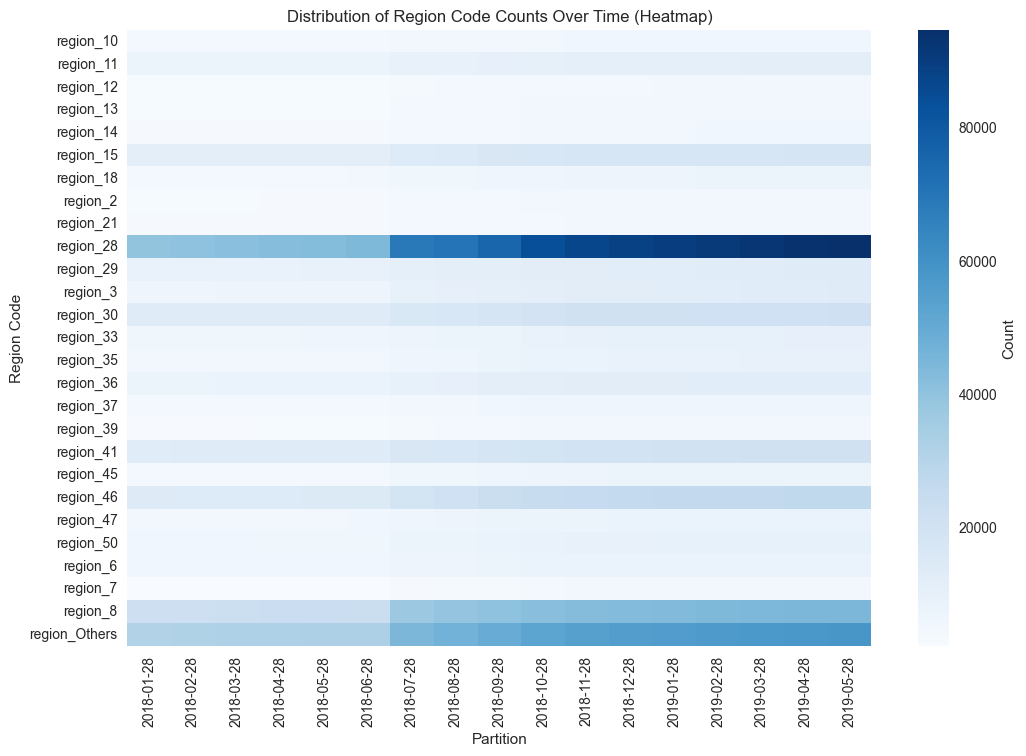

In [567]:
# Extract date from the index
monthly_aggregated.index = monthly_aggregated.index.date


# Set the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(monthly_aggregated[region_codes].T, cmap='Blues', cbar_kws={'label': 'Count'})

# Set the axis labels and title
plt.xlabel('Partition')
plt.ylabel('Region Code')
plt.title('Distribution of Region Code Counts Over Time (Heatmap)')

# Show the plot
plt.show()



 We can see that region_28 is the most common region followed by other regions and then region_8. In July 2018 we all can observe an increase in the number of subscribers in the stated regions and the region 28 becomes dominant region from Sep 2018. Others except July 2018 which we can see the increase in all regions, doesnt vary that much, So I am going to drop them in my timeseries.

In [568]:
# Columns to keep
columns_to_keep = ['region_28', 'region_8', 'region_Others', 'region_41', 'region_46', 'region_30', 'region_15', 'region_11']

# Columns to drop
columns_to_drop = [col for col in monthly_aggregated.columns if col.startswith('region_') and col not in columns_to_keep]

# Drop the columns
monthly_aggregated.drop(columns=columns_to_drop, inplace=True)


In [569]:
monthly_aggregated.columns

Index(['Total_Short_Term_Deposit', 'deceased', 'Total_Subscribers',
       'Active_Customers', 'New Monthly Subscribers', 'Unsubscribed',
       'Loyal Customer', 'New Customer', 'Regular Customer',
       'Entry_Channel_KAT', 'Entry_Channel_KFC', 'Entry_Channel_KHE',
       'Entry_Channel_KHK', 'Entry_Channel_KHQ', 'Entry_Channel_Others',
       'Entry_Channel_Unknown', '02 - PARTICULARES', '03 - UNIVERSITARIO',
       'Unknown Segment', '01 - TOP', 'region_11', 'region_15', 'region_28',
       'region_30', 'region_41', 'region_46', 'region_8', 'region_Others'],
      dtype='object')

I would apply more reduction when doing feature correlation later.


2. next sociodemographic columns

[ * ] country_id

[ * ] region_code

---> [  ] gender

[  ] age

[  ] salary

In [570]:
merged_all_three['gender'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 5961978 entries, 2018-01-28 to 2019-05-28
Series name: gender
Non-Null Count    Dtype 
--------------    ----- 
5961953 non-null  object
dtypes: object(1)
memory usage: 91.0+ MB


In [571]:
null_count = merged_all_three['gender'].isnull().sum()
print("Number of null values in the 'gender' column:", null_count)

Number of null values in the 'gender' column: 25


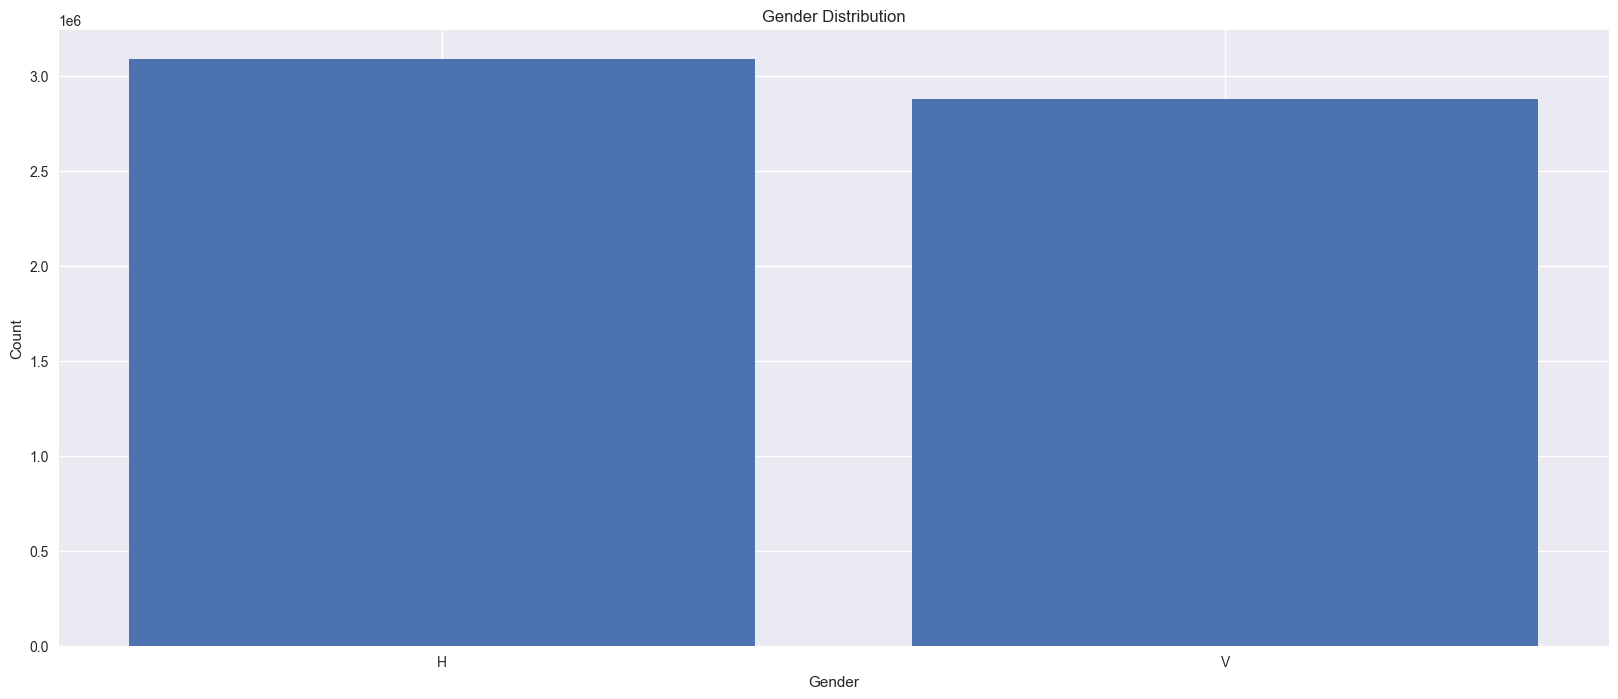

In [572]:
gender_counts = merged_all_three['gender'].value_counts()
# Create a bar chart
plt.figure(figsize=(20, 8))  # Reduced figure size
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

"v": It could represent "Varón," which means male in Spanish.
"h": It could represent "Hembra," which means female in Spanish.
let's make them more understandable.
'v' = Male
'h'=Female

In [573]:
# Rename 'h' to 'female' and 'v' to 'male'
merged_all_three['gender'] = merged_all_three['gender'].replace({'H': 'female', 'V': 'male'})

In [574]:
merged_all_three['gender']

pk_partition
2018-01-28    female
2018-02-28    female
2018-03-28    female
2018-04-28    female
2018-05-28    female
               ...  
2019-01-28    female
2019-02-28    female
2019-03-28    female
2019-04-28    female
2019-05-28    female
Name: gender, Length: 5961978, dtype: object

In [575]:
merged_all_three.columns

Index(['pk_cid', 'short_term_deposit', 'loans', 'mortgage', 'funds',
       'securities', 'long_term_deposit', 'em_account_pp', 'credit_card',
       'payroll', 'pension_plan', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_acount', 'entry_date',
       'active_customer', 'segment', 'region_code', 'gender', 'age',
       'deceased', 'salary', 'New Monthly Subscribers', 'prev_partition',
       'Loyal Customer', 'New Customer', 'Regular Customer',
       'Entry_Channel_KAT', 'Entry_Channel_KFC', 'Entry_Channel_KHE',
       'Entry_Channel_KHK', 'Entry_Channel_KHQ', 'Entry_Channel_Others',
       'Entry_Channel_Unknown', '01 - TOP', '02 - PARTICULARES',
       '03 - UNIVERSITARIO', 'Unknown Segment', 'region_10', 'region_11',
       'region_12', 'region_13', 'region_14', 'region_15', 'region_18',
       'region_2', 'region_21', 'region_28', 'region_29', 'region_3',
       'region_30', 'region_33', 'region_35', 'region_36', 'region_37',
       'region_39', 'regi

In [576]:
merged_all_three.T

pk_partition,2018-01-28,2018-02-28,2018-03-28,2018-04-28,2018-05-28,2018-06-28,2018-07-28,2018-08-28,2018-09-28,2018-10-28,...,2018-08-28,2018-09-28,2018-10-28,2018-11-28,2018-12-28,2019-01-28,2019-02-28,2019-03-28,2019-04-28,2019-05-28
pk_cid,1000028,1000028,1000028,1000028,1000028,1000028,1000028,1000028,1000028,1000028,...,999892,999892,999892,999892,999892,999892,999892,999892,999892,999892
short_term_deposit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
loans,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mortgage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
funds,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
region_50,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
region_6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
region_7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
region_8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


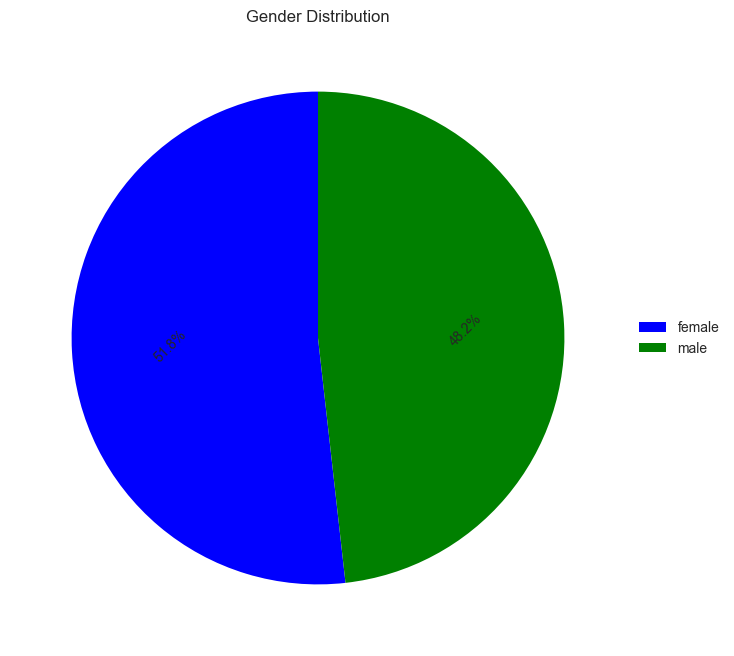

In [577]:
# pie chart
gender_counts = merged_all_three['gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(sizes, labels=None, startangle=90, colors=['blue', 'green'], autopct='%1.1f%%')

# Set custom labels
plt.legend(wedges, labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Incline the percentages by 45 degrees
for autotext in autotexts:
    autotext.set_rotation(45)

plt.title('Gender Distribution')
plt.show()

We can see females are approximately the same with female includes 3.6% of the population. I want to set the missing values with this proportion to female and male

In [578]:
# Calculate the proportion of "female" and "male" values
female_proportion = 0.518
male_proportion = 0.482

# Count the number of NaN values in the "gender" column
nan_count = merged_all_three['gender'].isnull().sum()

# Generate random choices based on the proportions
gender_choices = np.random.choice(['female', 'male'], size=nan_count, p=[female_proportion, male_proportion])

# Replace NaN values with the randomly chosen genders
merged_all_three.loc[merged_all_three['gender'].isnull(), 'gender'] = gender_choices

In [579]:
merged_all_three['gender'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 5961978 entries, 2018-01-28 to 2019-05-28
Series name: gender
Non-Null Count    Dtype 
--------------    ----- 
5961978 non-null  object
dtypes: object(1)
memory usage: 91.0+ MB


In [580]:
merged_all_three['gender'].unique()

array(['female', 'male'], dtype=object)

In [581]:
null_count = merged_all_three['gender'].isnull().sum()
print("Number of null values in the 'gender' column:", null_count)

Number of null values in the 'gender' column: 0


In [582]:
# Decode gender column
gender_dummies = pd.get_dummies(merged_all_three['gender'])
# Drop the male column
gender_dummies = gender_dummies.drop(columns=['male'])
# Concatenate the encoded columns with the original DataFrame
merged_all_three= pd.concat([merged_all_three, gender_dummies], axis=1)
# Drop the original gender column
merged_all_three= merged_all_three.drop(columns=['gender'])

In [583]:
merged_all_three[merged_all_three['female'] == False]

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,...,region_41,region_45,region_46,region_47,region_50,region_6,region_7,region_8,region_Others,female
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-07-28,1000105,0,0,0,0,0,0,0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
2018-08-28,1000105,0,0,0,0,0,0,0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
2018-09-28,1000105,0,0,0,0,0,0,0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
2018-10-28,1000105,0,0,0,0,0,0,0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
2018-11-28,1000105,0,0,0,0,0,0,0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-28,999825,0,0,0,0,0,0,0,0,0.0,...,False,False,False,False,False,False,False,False,True,False
2019-02-28,999825,0,0,0,0,0,0,0,0,0.0,...,False,False,False,False,False,False,False,False,True,False
2019-03-28,999825,0,0,0,0,0,0,0,0,0.0,...,False,False,False,False,False,False,False,False,True,False


In [584]:
# Group by 'pk_partition' and sum the 'female' column
female_per_partition = merged_all_three.groupby('pk_partition')['female'].sum()

# Add the 'female' column to monthly_aggregated based on the 'pk_partition' index
monthly_aggregated['female'] = female_per_partition

In [585]:
monthly_aggregated.columns

Index(['Total_Short_Term_Deposit', 'deceased', 'Total_Subscribers',
       'Active_Customers', 'New Monthly Subscribers', 'Unsubscribed',
       'Loyal Customer', 'New Customer', 'Regular Customer',
       'Entry_Channel_KAT', 'Entry_Channel_KFC', 'Entry_Channel_KHE',
       'Entry_Channel_KHK', 'Entry_Channel_KHQ', 'Entry_Channel_Others',
       'Entry_Channel_Unknown', '02 - PARTICULARES', '03 - UNIVERSITARIO',
       'Unknown Segment', '01 - TOP', 'region_11', 'region_15', 'region_28',
       'region_30', 'region_41', 'region_46', 'region_8', 'region_Others',
       'female'],
      dtype='object')

In [586]:
female_vs_male = pd.DataFrame()
female_vs_male['Female'] = monthly_aggregated['female']
female_vs_male['Male'] = monthly_aggregated['Total_Subscribers'] - monthly_aggregated['female']

In [587]:
female_vs_male

,Female,Male
2018-01-28,125478,113968
2018-02-28,126768,115706
2018-03-28,127921,117290
2018-04-28,128877,118540
2018-05-28,129912,119967
2018-06-28,130839,121220
2018-07-28,174518,164766
2018-08-28,181880,170985
2018-09-28,193878,181381
2018-10-28,208876,193356


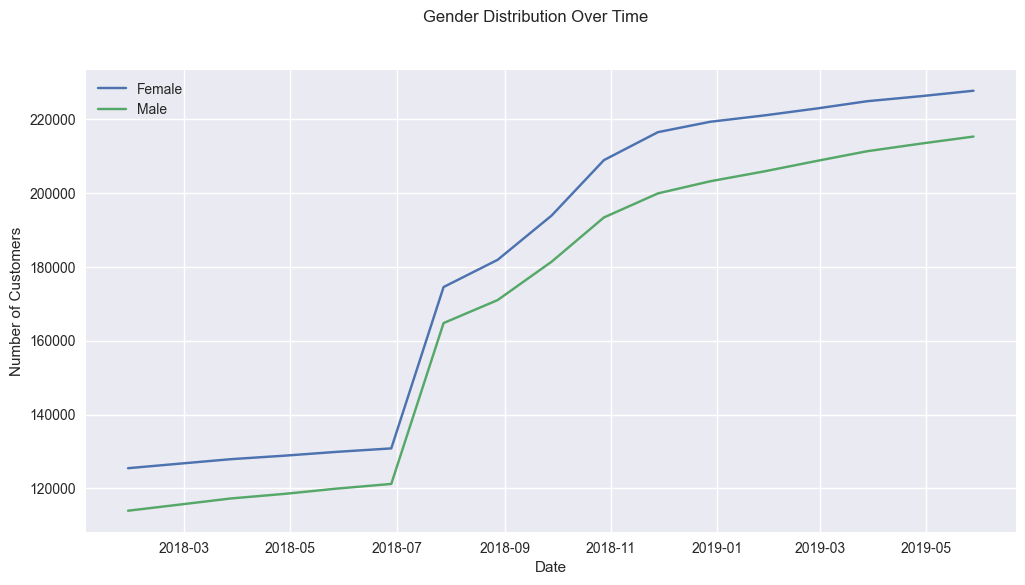

In [588]:
# Plot the three types of subscribers over time
plt.figure(figsize=(12, 6))
plt.plot(female_vs_male.index, female_vs_male['Female'], label='Female')
plt.plot(female_vs_male.index, female_vs_male['Male'], label='Male')
plt.suptitle('Gender Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True)
plt.show()


We can see that both are increasing in proportion and as our number of subscribers are increasing these numbers are increasing too. No new observation here. In all of the previous obsevation we observed a jump increase in number of subscribers in 2018-07 which is dues to new events marketing campaigns and subscriber acquisition plan launch strategy. It can also be a time when the partner joined and brough its own subscribers.


2. next sociodemographic columns

[ * ] country_id

[ * ] region_code

[ * ] gender

----> [  ] age

[  ] salary

#### **Age**

In [589]:
merged_all_three['age'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 5961978 entries, 2018-01-28 to 2019-05-28
Series name: age
Non-Null Count    Dtype
--------------    -----
5961978 non-null  int64
dtypes: int64(1)
memory usage: 91.0 MB


No null values

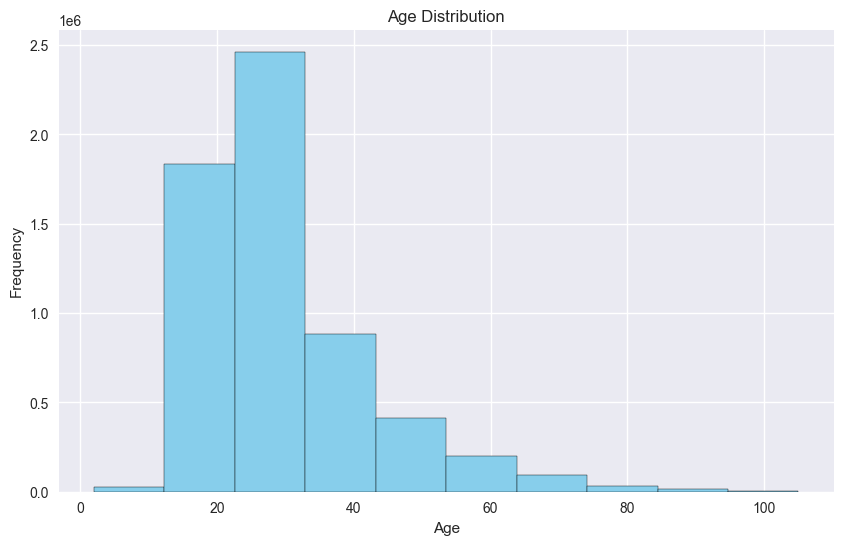

In [590]:
# Plotting the age distribution
plt.figure(figsize=(10, 6))
plt.hist(merged_all_three['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


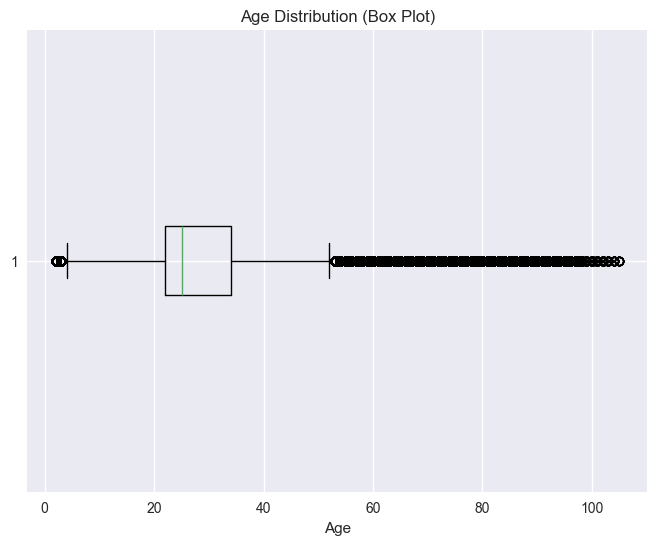

In [591]:
# Plotting the age distribution using a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(merged_all_three['age'], vert=False)
plt.title('Age Distribution (Box Plot)')
plt.xlabel('Age')
plt.grid(True)
plt.show()

In [592]:
merged_all_three['age'].describe()

count    5.961978e+06
mean     2.975416e+01
std      1.196772e+01
min      2.000000e+00
25%      2.200000e+01
50%      2.500000e+01
75%      3.400000e+01
max      1.050000e+02
Name: age, dtype: float64

In [593]:
# Calculate the first quartile (Q1)
Q1 = merged_all_three['age'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = merged_all_three['age'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the upper fence
upper_fence = Q3 + 1.5 * IQR

# Calculate the lower fence
lower_fence = Q1 - 1.5 * IQR

# Display the upper and lower fences
print("Upper Fence:", upper_fence)
print("Lower Fence:", lower_fence)


Upper Fence: 52.0
Lower Fence: 4.0


In [594]:
# Filter the DataFrame to get ages less than 20 and extract unique values
unique_age_range = merged_all_three[merged_all_three['age'] < 20]['age'].unique()
unique_age_range

array([ 9, 10, 13, 14, 17,  6,  7, 19, 15,  5,  8, 12, 16, 11, 18,  4,  3,
        2], dtype=int64)

In [595]:
# Filter the DataFrame to get ages less than 20 and extract unique values
unique_salary_range = merged_all_three[merged_all_three['age'] < 20]['age'].unique()
unique_salary_range

array([ 9, 10, 13, 14, 17,  6,  7, 19, 15,  5,  8, 12, 16, 11, 18,  4,  3,
        2], dtype=int64)

As we can see from the box plot we have a lot of outliers between 0 and 10 (which should be an error in data) and in the range of 52 and 105. I would make these as categorical data to be better able to represent data.

In [596]:
# Group by age and sum the counts of active products
active_products_by_age = merged_all_three.groupby('age')[['short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 
                                                         'em_account_pp', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 
                                                         'emc_account', 'debit_card', 'em_account_p', 'em_acount']].sum()

In [597]:
active_products_by_age

,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
age,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,7
3,0,0,0,0,0,0,0,0,2.0,3.0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0.0,11.0,0,0,0,0,11
5,0,0,0,0,0,0,0,0,0.0,9.0,0,0,0,0,6
6,0,0,0,0,0,0,0,0,0.0,13.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0,0,0,2,0,13,0,0,0.0,3.0,3,13,5,0,39
102,0,0,0,0,0,4,0,0,0.0,0.0,0,5,0,0,30
103,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,11


In order not loose data as I am not sure whether the data for people who are less than 18 is valid or it has errors and to make the analysis simpler , I would categorize the age into bins for Young adults, adult, middle age and seniors.

In [598]:

# Define the age groups
bins = [0, 24, 44, 64, 106]
labels = ['Young Adult', 'Adult', 'Middle-Aged', 'Senior']

# Categorize the age column
merged_all_three['age_group'] = pd.cut(merged_all_three['age'], bins=bins, labels=labels, right=False)





In [599]:
merged_all_three.columns

Index(['pk_cid', 'short_term_deposit', 'loans', 'mortgage', 'funds',
       'securities', 'long_term_deposit', 'em_account_pp', 'credit_card',
       'payroll', 'pension_plan', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_acount', 'entry_date',
       'active_customer', 'segment', 'region_code', 'age', 'deceased',
       'salary', 'New Monthly Subscribers', 'prev_partition', 'Loyal Customer',
       'New Customer', 'Regular Customer', 'Entry_Channel_KAT',
       'Entry_Channel_KFC', 'Entry_Channel_KHE', 'Entry_Channel_KHK',
       'Entry_Channel_KHQ', 'Entry_Channel_Others', 'Entry_Channel_Unknown',
       '01 - TOP', '02 - PARTICULARES', '03 - UNIVERSITARIO',
       'Unknown Segment', 'region_10', 'region_11', 'region_12', 'region_13',
       'region_14', 'region_15', 'region_18', 'region_2', 'region_21',
       'region_28', 'region_29', 'region_3', 'region_30', 'region_33',
       'region_35', 'region_36', 'region_37', 'region_39', 'region_41',
       'r

In [600]:
merged_all_three['age_group'].unique()

['Adult', 'Middle-Aged', 'Young Adult', 'Senior']
Categories (4, object): ['Young Adult' < 'Adult' < 'Middle-Aged' < 'Senior']

In [601]:
display(merged_all_three[['age', 'age_group']].head(50))
display(merged_all_three[['age', 'age_group']].tail(50))

nan_age_groups = merged_all_three[merged_all_three['age_group'].isnull()]
display(nan_age_groups[['age','age_group','deceased']])
display(nan_age_groups.shape[0])

,age,age_group
pk_partition,,
2018-01-28,43,Adult
2018-02-28,43,Adult
2018-03-28,43,Adult
2018-04-28,43,Adult
2018-05-28,43,Adult
2018-06-28,43,Adult
2018-07-28,43,Adult
2018-08-28,43,Adult
2018-09-28,43,Adult


,age,age_group
pk_partition,,
2018-02-28,39,Adult
2018-03-28,39,Adult
2018-04-28,39,Adult
2018-05-28,39,Adult
2018-06-28,39,Adult
2018-07-28,39,Adult
2018-08-28,39,Adult
2018-09-28,39,Adult
2018-10-28,39,Adult


,age,age_group,deceased
pk_partition,,,


0

In [602]:
merged_all_three['age_group'].unique()

['Adult', 'Middle-Aged', 'Young Adult', 'Senior']
Categories (4, object): ['Young Adult' < 'Adult' < 'Middle-Aged' < 'Senior']

In [603]:
# Calculate the minimum and maximum age for each age group
age_group_ranges = merged_all_three.groupby('age_group')['age'].agg(['min', 'max'])

C:\Users\donna\AppData\Local\Temp\ipykernel_12564\808656855.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_ranges = merged_all_three.groupby('age_group')['age'].agg(['min', 'max'])


In [604]:
display(age_group_ranges)

,min,max
age_group,,
Young Adult,2,23
Adult,24,43
Middle-Aged,44,63
Senior,64,105


In [605]:
merged_all_three.drop('age', axis=1, inplace=True)


In [606]:
merged_all_three.columns

Index(['pk_cid', 'short_term_deposit', 'loans', 'mortgage', 'funds',
       'securities', 'long_term_deposit', 'em_account_pp', 'credit_card',
       'payroll', 'pension_plan', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_acount', 'entry_date',
       'active_customer', 'segment', 'region_code', 'deceased', 'salary',
       'New Monthly Subscribers', 'prev_partition', 'Loyal Customer',
       'New Customer', 'Regular Customer', 'Entry_Channel_KAT',
       'Entry_Channel_KFC', 'Entry_Channel_KHE', 'Entry_Channel_KHK',
       'Entry_Channel_KHQ', 'Entry_Channel_Others', 'Entry_Channel_Unknown',
       '01 - TOP', '02 - PARTICULARES', '03 - UNIVERSITARIO',
       'Unknown Segment', 'region_10', 'region_11', 'region_12', 'region_13',
       'region_14', 'region_15', 'region_18', 'region_2', 'region_21',
       'region_28', 'region_29', 'region_3', 'region_30', 'region_33',
       'region_35', 'region_36', 'region_37', 'region_39', 'region_41',
       'region_4

In [607]:
# Convert 'age_group' to string to prepare for encoding
merged_all_three['age_group'] = merged_all_three['age_group'].astype(str)

# Encode 'age_group' column
age_group_encoded = pd.get_dummies(merged_all_three['age_group'], prefix='age_group')

# Concatenate the encoded columns with the original DataFrame
merged_all_three = pd.concat([merged_all_three, age_group_encoded], axis=1)

# Drop the original 'age_group' column
merged_all_three.drop('age_group', axis=1, inplace=True)



In [608]:
merged_all_three.columns

Index(['pk_cid', 'short_term_deposit', 'loans', 'mortgage', 'funds',
       'securities', 'long_term_deposit', 'em_account_pp', 'credit_card',
       'payroll', 'pension_plan', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_acount', 'entry_date',
       'active_customer', 'segment', 'region_code', 'deceased', 'salary',
       'New Monthly Subscribers', 'prev_partition', 'Loyal Customer',
       'New Customer', 'Regular Customer', 'Entry_Channel_KAT',
       'Entry_Channel_KFC', 'Entry_Channel_KHE', 'Entry_Channel_KHK',
       'Entry_Channel_KHQ', 'Entry_Channel_Others', 'Entry_Channel_Unknown',
       '01 - TOP', '02 - PARTICULARES', '03 - UNIVERSITARIO',
       'Unknown Segment', 'region_10', 'region_11', 'region_12', 'region_13',
       'region_14', 'region_15', 'region_18', 'region_2', 'region_21',
       'region_28', 'region_29', 'region_3', 'region_30', 'region_33',
       'region_35', 'region_36', 'region_37', 'region_39', 'region_41',
       'region_4

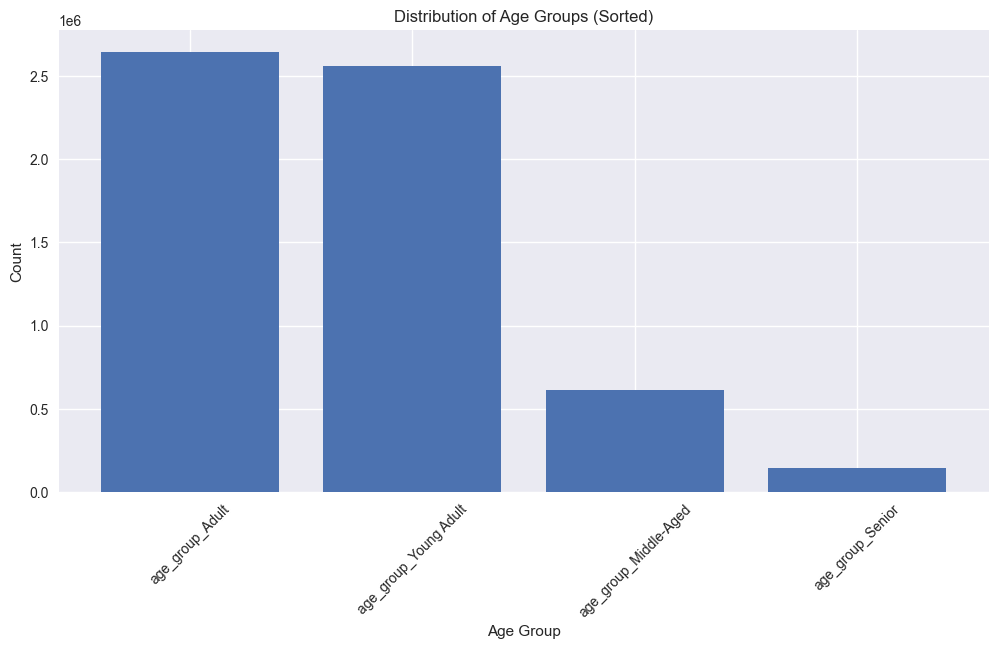

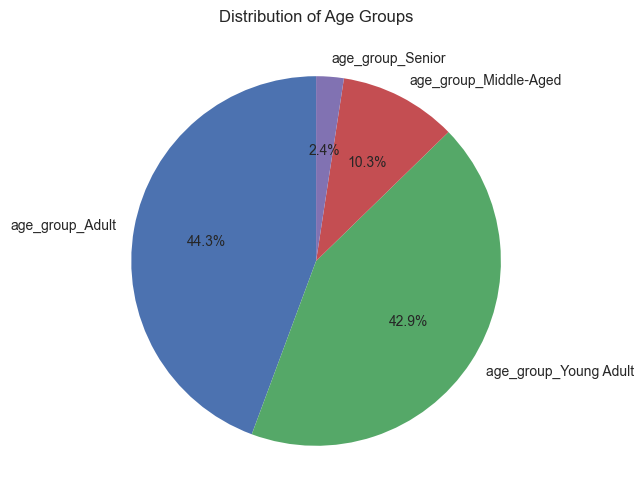

In [609]:

# List of columns to visualize
columns_to_visualize = [ 'age_group_Senior',
       'age_group_Middle-Aged', 'age_group_Adult', 'age_group_Young Adult']

# Calculate total counts for each age group
total_counts = merged_all_three[columns_to_visualize].sum()

# Sort age groups based on total counts
sorted_age_groups = total_counts.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(sorted_age_groups.index, sorted_age_groups.values)

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups (Sorted)')
plt.xticks(rotation=45)
plt.show()
# Plotting
plt.figure(figsize=(12, 6))
plt.pie(sorted_age_groups, labels=sorted_age_groups.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Age Groups')
plt.show()


We can see most of our categories lies under Adult (44.3%)and Young Adult(42.9%). Followed by 10.3% middle aged and 2.4% senior

In [610]:
# Calculate active users per partition (index) aggregated on count
columns_to_visualize = [ 'age_group_Senior',
       'age_group_Middle-Aged', 'age_group_Adult', 'age_group_Young Adult']
age_group_senior_per_partition= merged_all_three.groupby('pk_partition')['age_group_Senior'].sum()
age_group_middle_age_per_partition= merged_all_three.groupby('pk_partition')['age_group_Middle-Aged'].sum()
age_group_adult_per_partition= merged_all_three.groupby('pk_partition')['age_group_Adult'].sum()
age_group_young_adult_per_partition= merged_all_three.groupby('pk_partition')['age_group_Young Adult'].sum()
# Add the calculated active users as a new column to monthly_aggregated dataframe
monthly_aggregated['age_group_Senior'] = age_group_senior_per_partition
monthly_aggregated['age_group_Middle-Aged'] = age_group_middle_age_per_partition
monthly_aggregated['age_group_Adult'] =age_group_adult_per_partition
monthly_aggregated['age_group_Young Adult'] = age_group_young_adult_per_partition

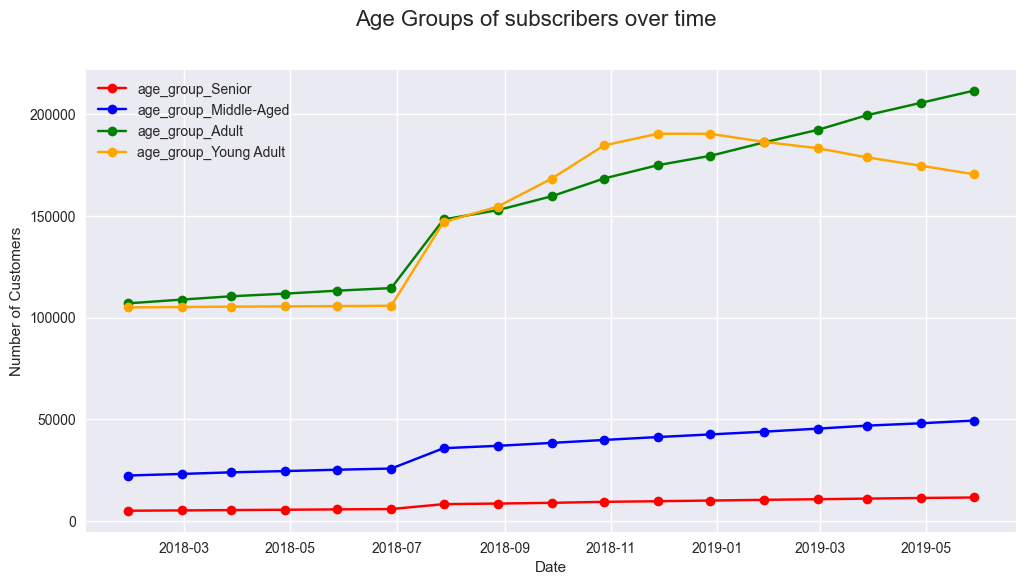

In [611]:
# Plot the three types of subscribers over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_aggregated.index, monthly_aggregated['age_group_Senior'] , marker='o', linestyle='-', label='age_group_Senior', color='red')
plt.plot(monthly_aggregated.index, monthly_aggregated['age_group_Middle-Aged'], marker='o', linestyle='-', label='age_group_Middle-Aged', color='blue')
plt.plot(monthly_aggregated.index, monthly_aggregated['age_group_Adult'], marker='o', linestyle='-', label='age_group_Adult', color='green')
plt.plot(monthly_aggregated.index, monthly_aggregated['age_group_Young Adult'], marker='o', linestyle='-', label='age_group_Young Adult', color='orange')


plt.suptitle('Age Groups of subscribers over time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True)
plt.show()

We observe that the majority of our subscribers fall into the adult and young adult age groups, while seniors and middle-aged individuals represent the smallest segments. Notably, there is a significant increase across all age groups starting from July 2018. From September 2018 to February 2019, the young adult age group surpasses the adult age group, indicating a shift in subscriber demographics during that period. However, we notice a decline in the number of subscribers in the young adult age group from December 2018 onwards. On the other hand, the adult age group continues to exhibit steady growth from July onwards, suggesting a consistent trend of increasing subscribers within this demographic.
In addition to the observations made, it's essential to consider the implications of these trends for marketing and product development strategies. Understanding the changing demographics can help tailor offerings and communication strategies to better resonate with different age groups. Furthermore, analyzing the factors contributing to the decline in certain age groups, such as the young adult segment, could uncover opportunities for retention efforts or product enhancements. Regularly monitoring these trends and iterating on strategies accordingly can optimize subscriber growth and engagement over time

In [612]:
# Save monthly aggregated dataframe to CSV
monthly_aggregated.to_csv('monthly_aggregated_1.csv', index=True)
# Save merged dataframe to CSV
merged_all_three.to_csv('merged_all_three_1.csv', index=True)